In [1]:
import pandas as pd
import numpy as np
import math
import pylab
from pylab import *
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from IPython.display import display
import os

In [2]:
save_folder = './Supplimentary/Supervised/'

# raw score

In [3]:
excel_path = '~/Downloads/All_metrics_15_Sep.xlsx' 
sheet_name =  'all_metrics_revision'
# pd.options.mode.use_inf_as_na = True

In [4]:
cloumns_to_plot = ["NMI cluster/label","ARI cluster/label","ASW label","ASW label/batch","PCR batch","isolated f1 score","isolated silhouette coefficient","graph connectivity","kBET"]#,"iLISI","cLISI"]
method_color_dct = {'scVI' : '#28DDED', 'Harmony': '#ED7A28','Seurat' : '#994363', 
       'BBKNN': '#B626D3', 'Scanorama': '#EDBF28', 
       'INSCT' : '#286CED', 'LIGER' : '#90EE90','fastMNN':  "#FFB6C1", "iMAP" : "#964B00",
       'scDREAMER': '#086E28', 'scANVI': '#c5b0d5',
'scGEN': '#d62829',
'scDREAMER-Sup': '#113f0a'
       }
methods_to_plot = ['scGEN','scANVI','scDREAMER-Sup']

In [5]:
 #directly downloaded from our sheet

In [6]:
import os
def plot_bar(df_, col_name,save_folder = False):#save_name dataset
    
    rc('axes', linewidth = 2)

#     if (dataset == 'Human_Mouse' and col_name == 'kBET'):
#         df_ = df_[df_.index != 'BBKNN']#.reset_index(drop = True)
#     if (dataset =='Human_Mouse' and col_name in ["isolated f1 score","isolated silhouette coefficient"]):
#         return
#     if (col_name == 'PCR batch'): # or col_name == 'ASW label' or col_name == 'ASW label/batch' or  col_name == 'isolated silhouette coefficient'
#         df_ = df_[df_.index != 'BBKNN']#.reset_index(drop = True)
    
    df_ = df_.loc[df_[col_name].notna(),:]

    fig = plt.figure(figsize = (6, 4))
    ax = df_[col_name].plot(kind="bar", color = df_['color'])

   
    rects = ax.patches
    ax.set_xticklabels(df_.index, rotation = 75, fontname='Arial', fontsize = 10)
  
    for rect, label in zip(rects, df_[col_name]):
        height = rect.get_height()
        ax.text(
        rect.get_x() + rect.get_width() / 2, height, round(label, 2), ha="center", va="bottom"
        )
    
    
    mi = df_[col_name].min()
    mx = df_[col_name].max()
    ylim(max(mi - 0.01,0), min(mx*1.05, 1.0))
    
    
    
    plt.ylabel(col_name, fontsize = 15, fontname='Arial', fontweight = 'bold')
    plt.xlabel(None)#, fontsize = 15, fontname='Arial', fontweight = 'bold')
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(14)
        tick.label1.set_fontweight('bold')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(14)
        tick.label1.set_fontweight('bold')
        
    plt.subplot(111).spines['right'].set_visible(False)
    plt.subplot(111).spines['top'].set_visible(False)
   
    plt.tight_layout()
#     plt.gcf().subplots_adjust(bottom = 0.3)
    #plt.gcf().subplots_adjust(top = 3)
    #plt.gcf().subplots_adjust(top=5)
    
    if save_folder:
        if not os.path.exists(save_folder):
            print(save_folder)
            os.makedirs(save_folder)
        plt.savefig(save_folder+'/'+col_name.replace('/','_')+'.png', transparent=True, bbox_inches='tight')

    plt.show()

# dataset = 'Pancreas'

NMI cluster/label  ARI cluster/label  ASW label  \
Method                                                           
scGEN                       0.97               0.98       0.72   
scANVI                      0.93               0.96       0.63   
scDREAMER-Sup               0.99               0.99       0.71   

               ASW label/batch  PCR batch  isolated f1 score  \
Method                                                         
scGEN                     0.77       0.73               0.15   
scANVI                    0.86       0.75               0.10   
scDREAMER-Sup             0.86       0.82               0.10   

               isolated silhouette coefficient  graph connectivity  kBET  \
Method                                                                     
scGEN                                     0.52                0.99  0.59   
scANVI                                    0.70                0.92  0.49   
scDREAMER-Sup                             0.65                1.00  0.67   

                 color  
Method                  
scGEN          #d62829  
scANVI         #c5b0d5  
scDREAMER-Sup  #113f0a

NMI cluster/label Pancreas


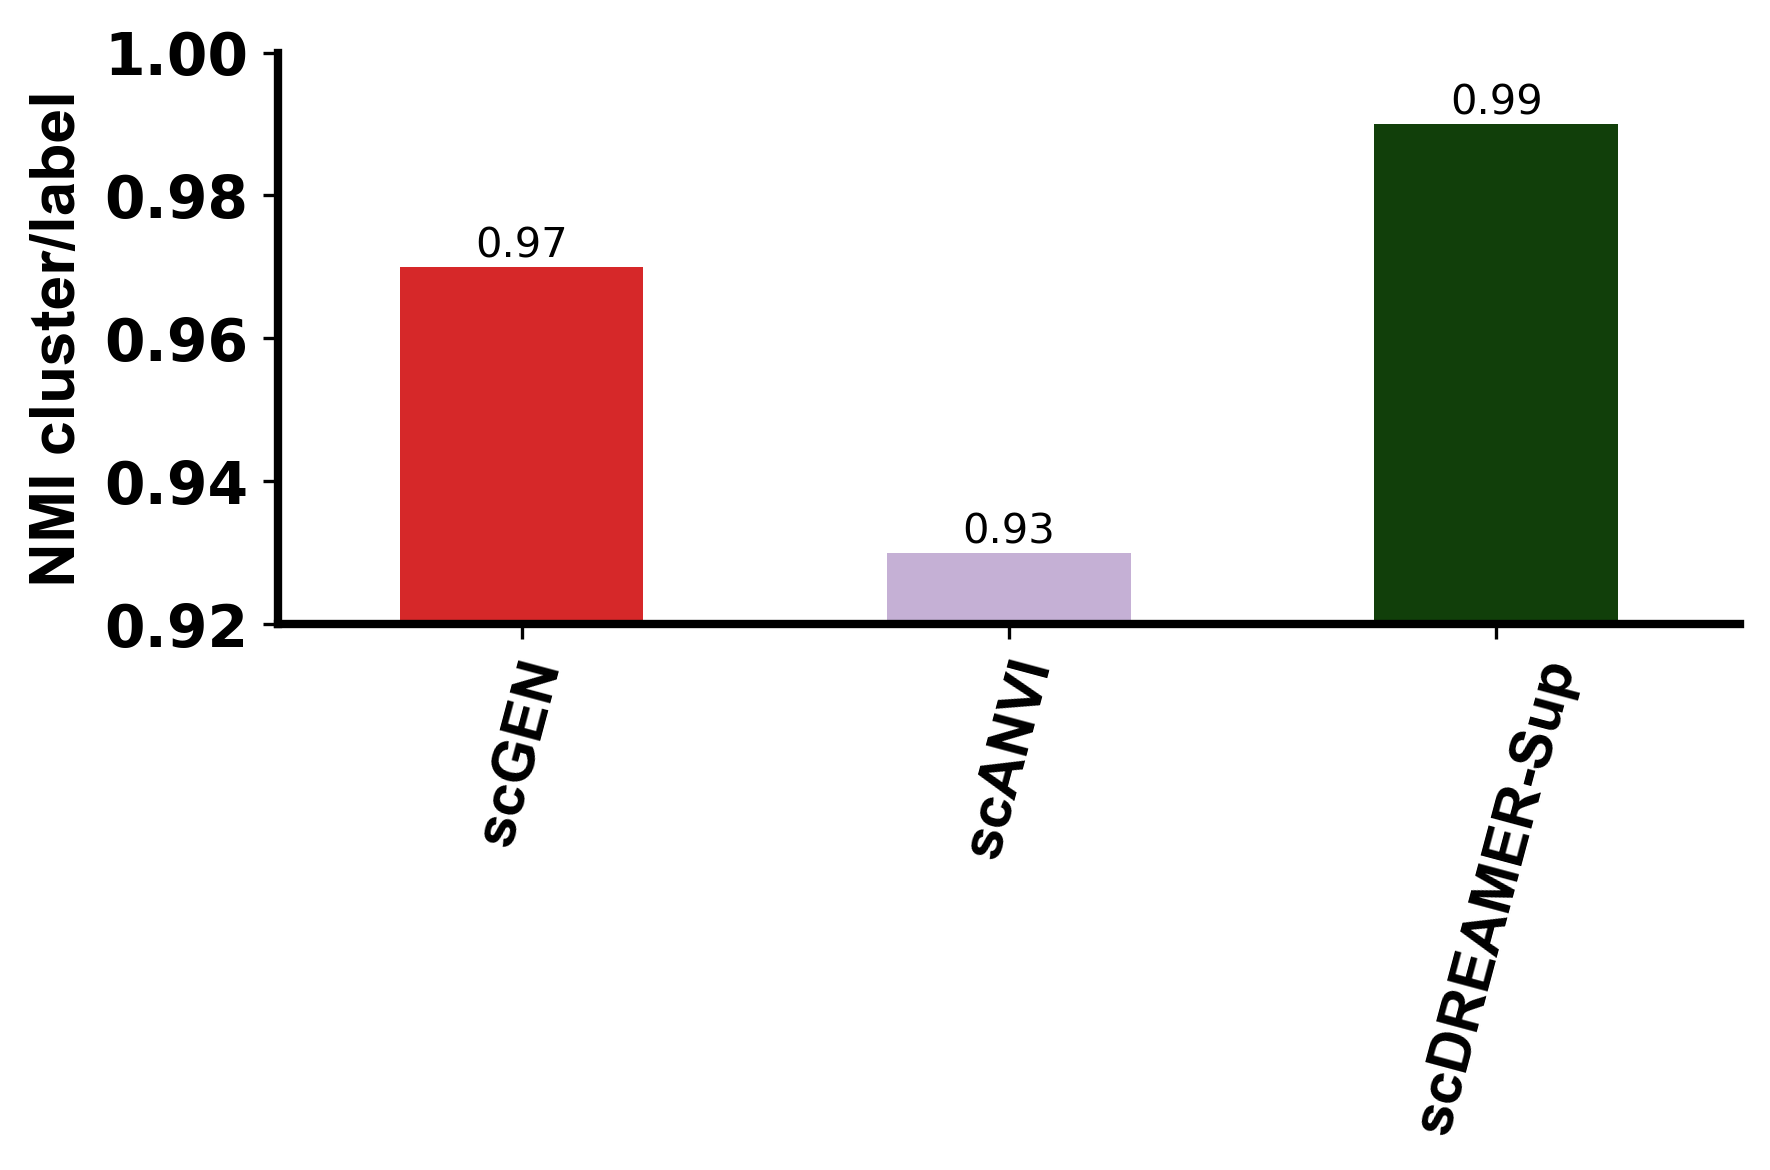

ARI cluster/label Pancreas


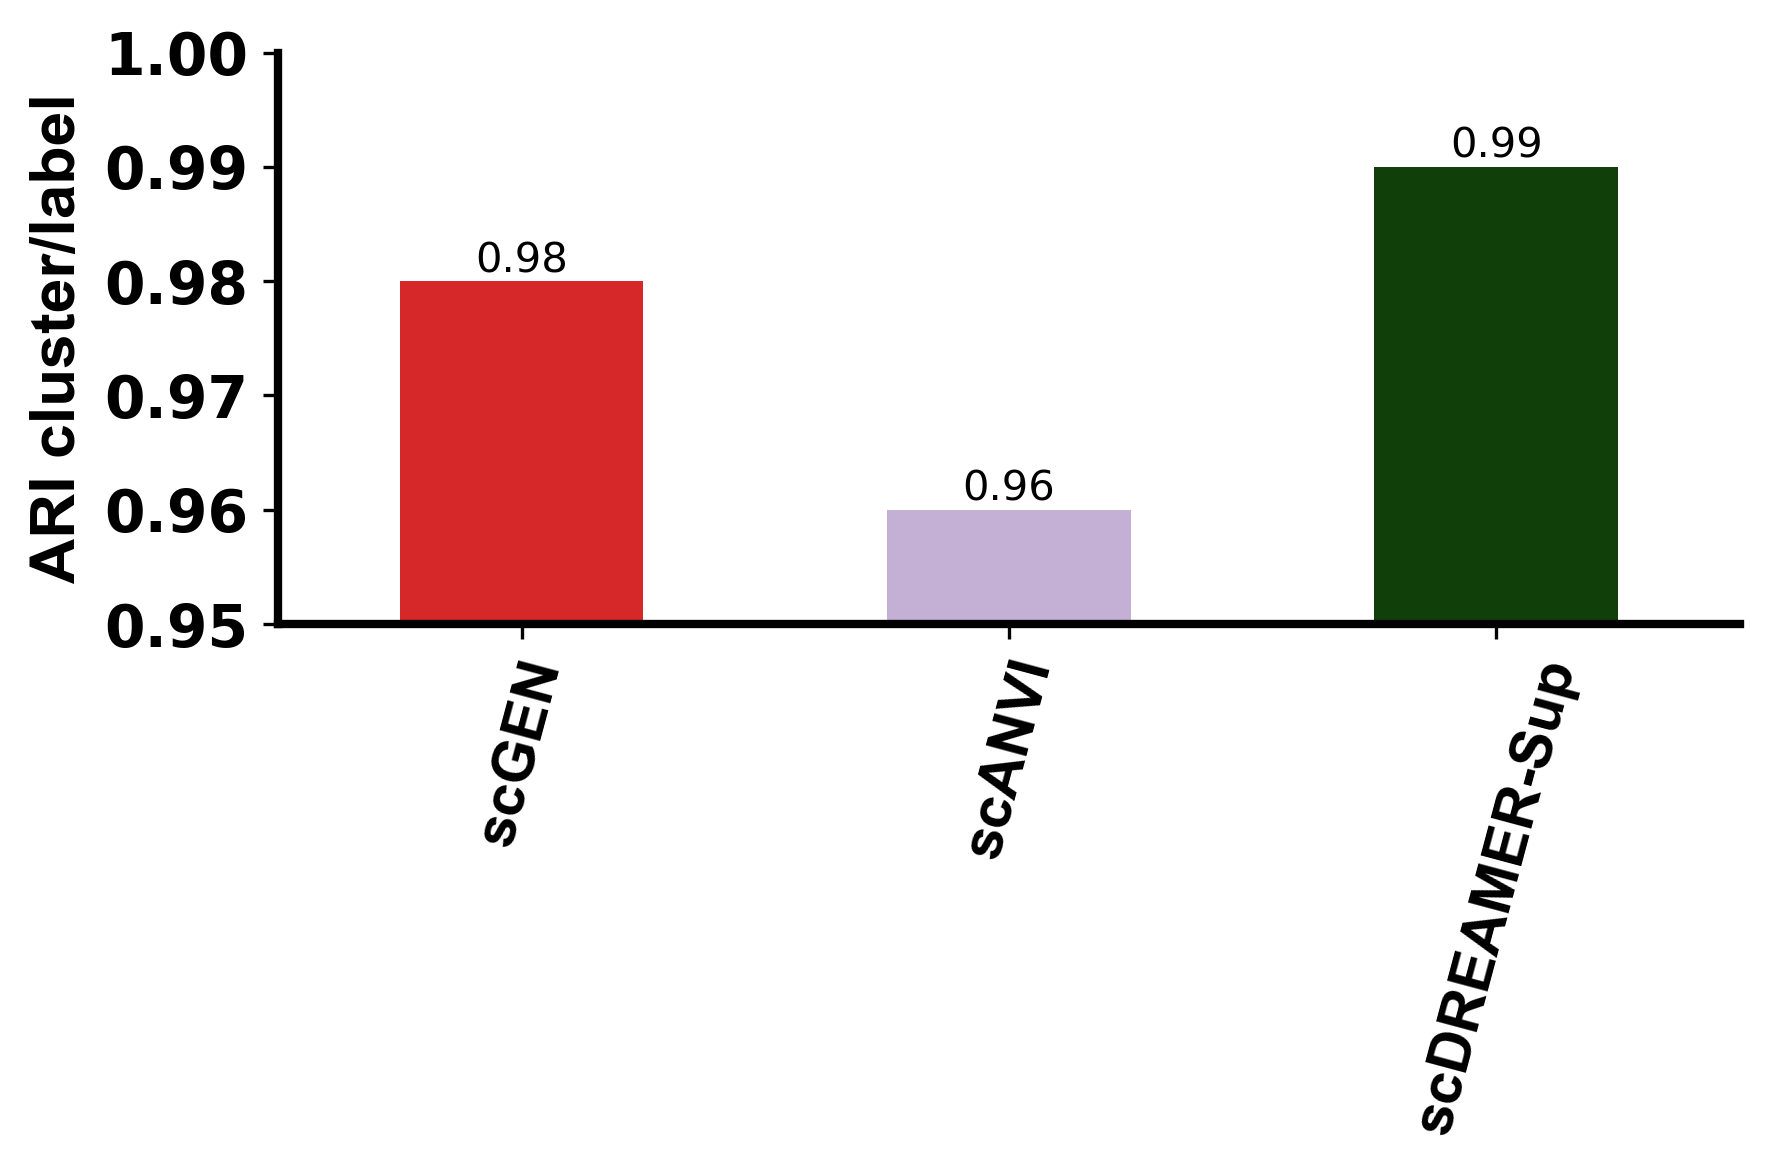

ASW label Pancreas


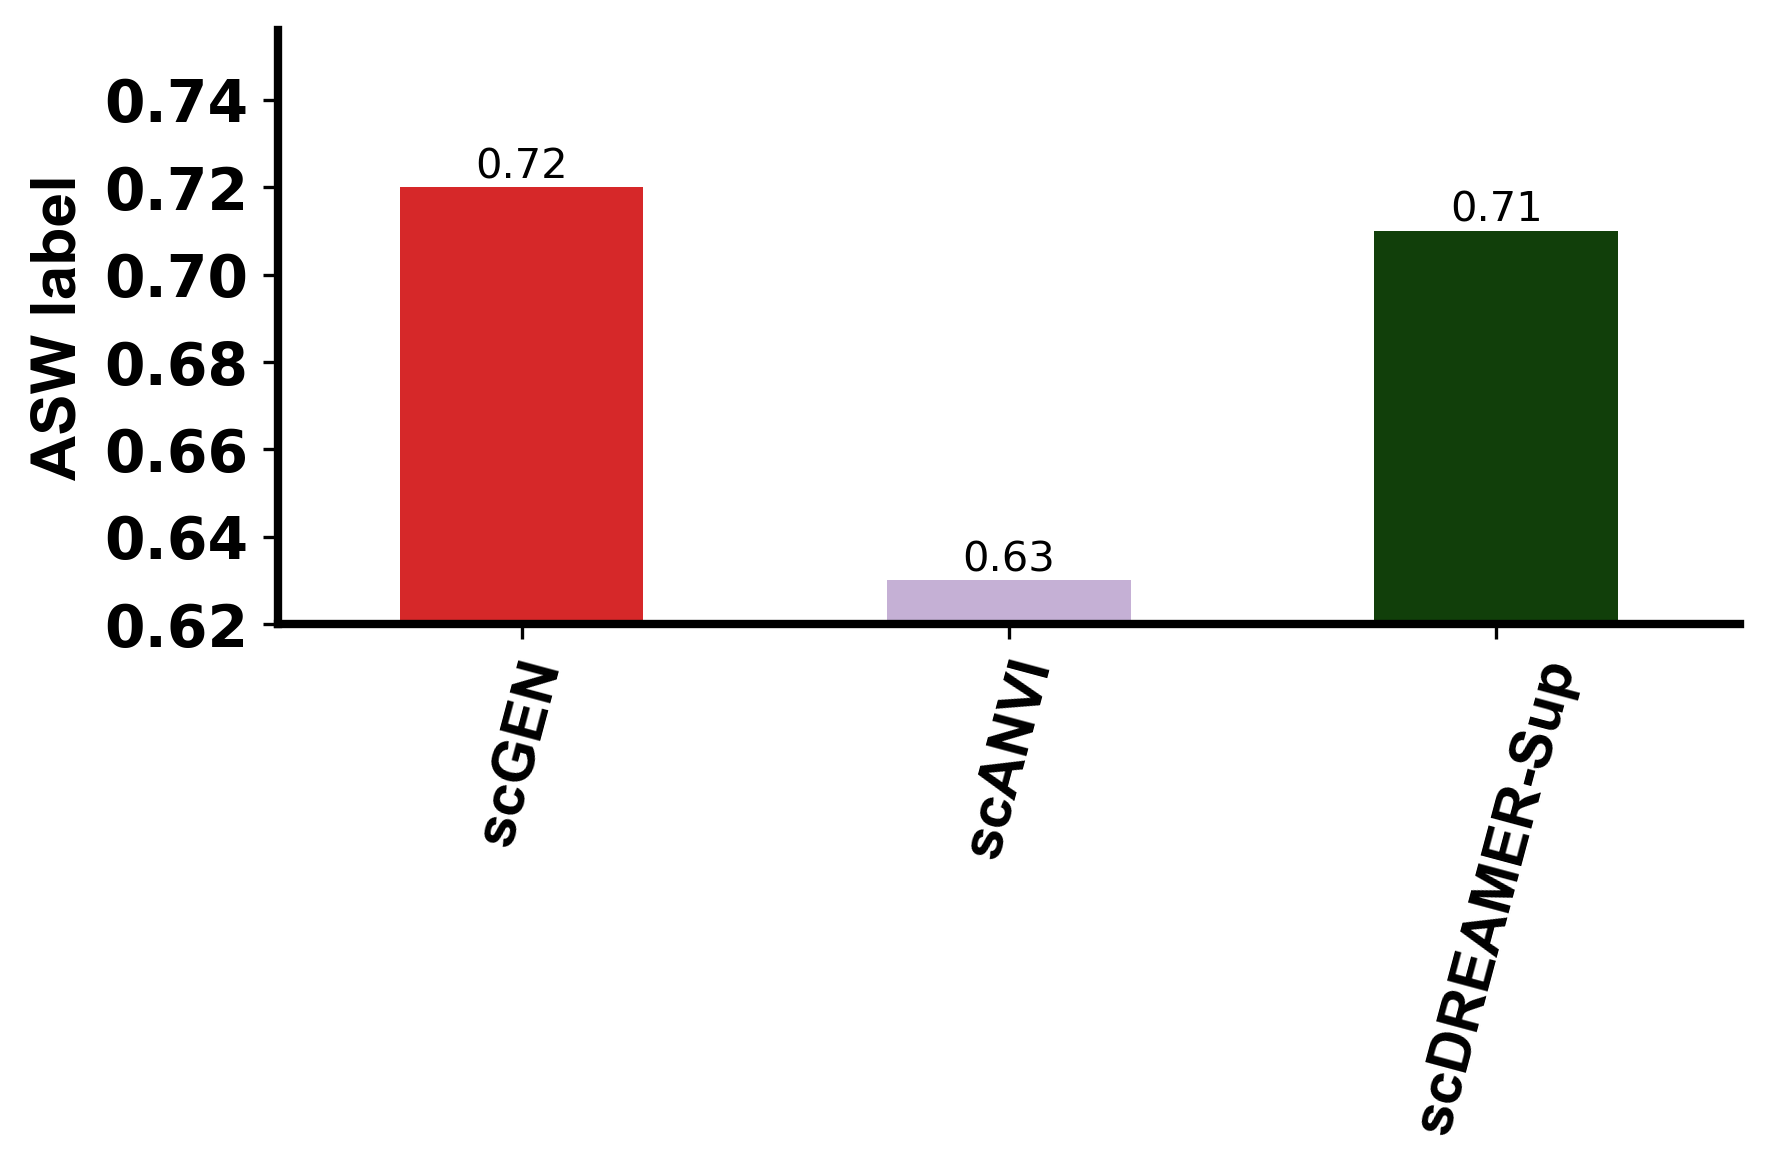

ASW label/batch Pancreas


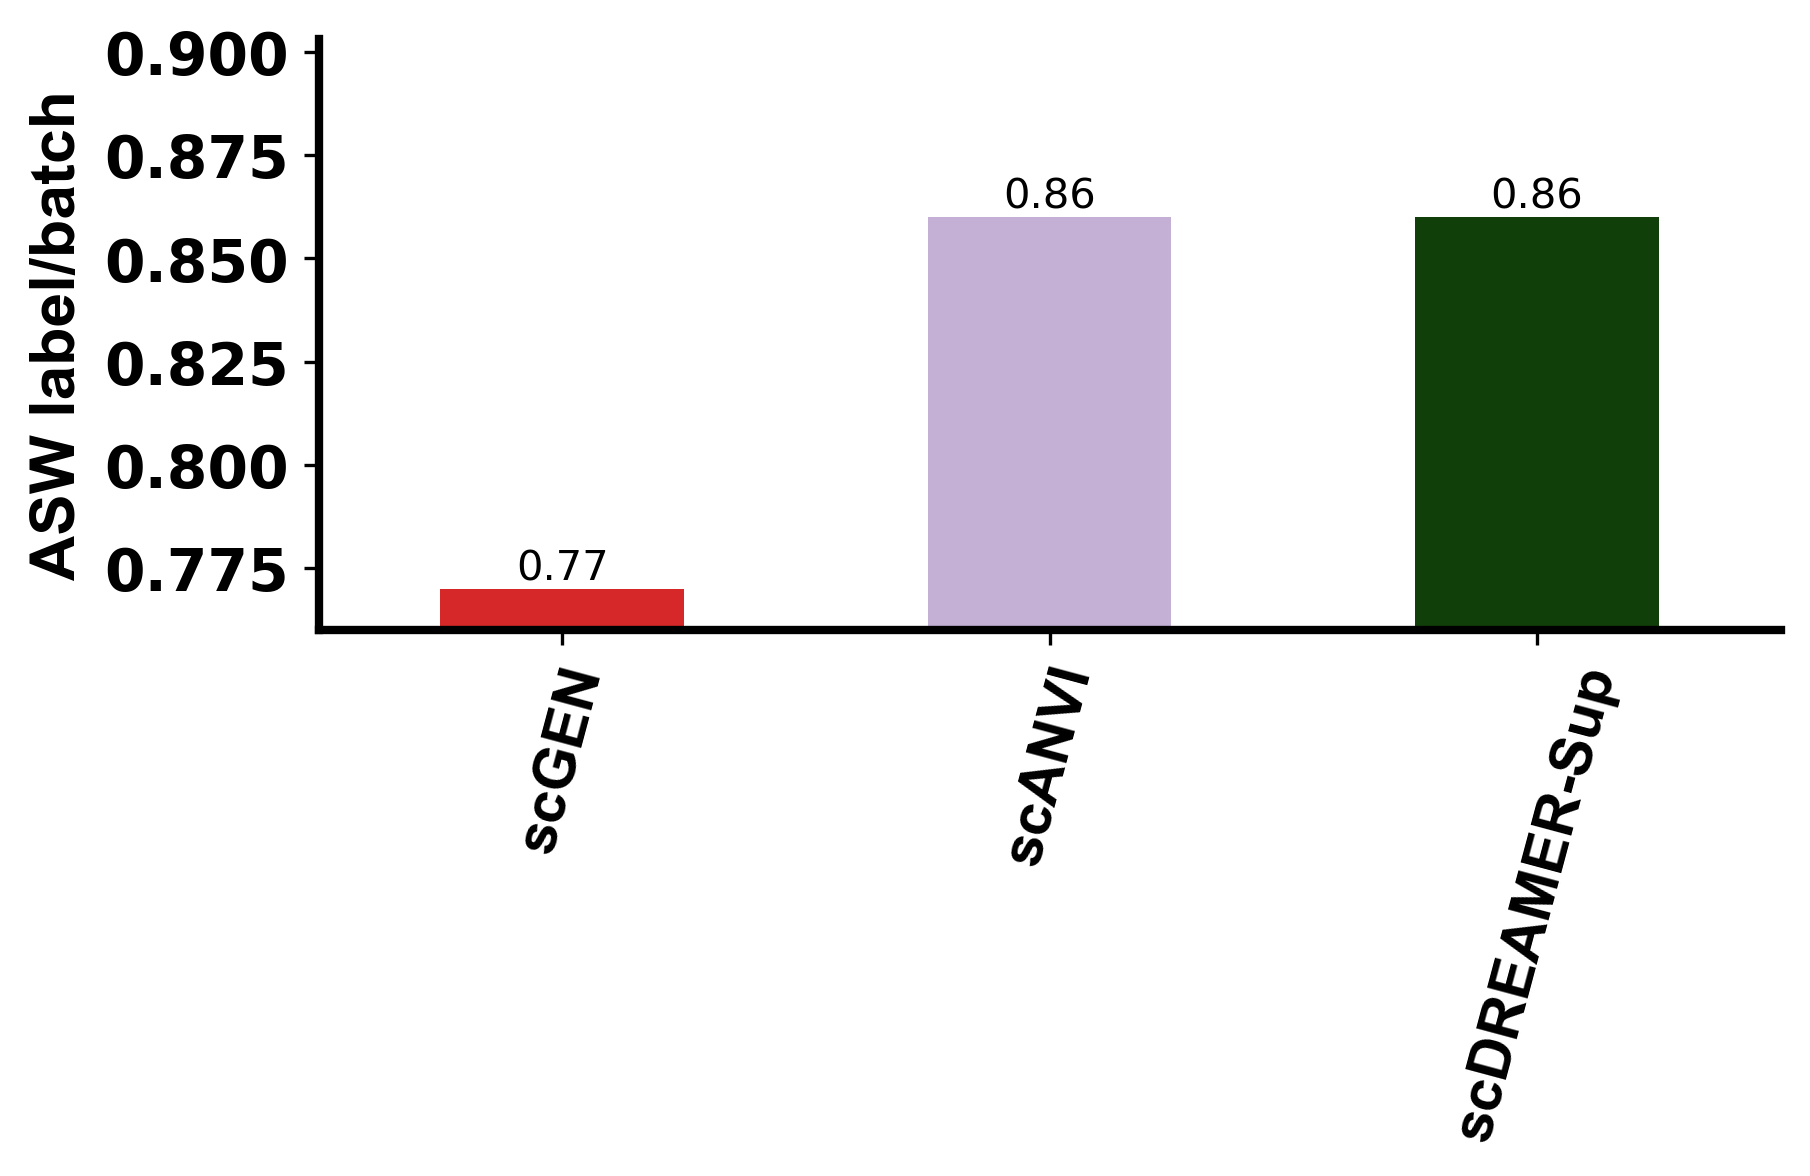

PCR batch Pancreas


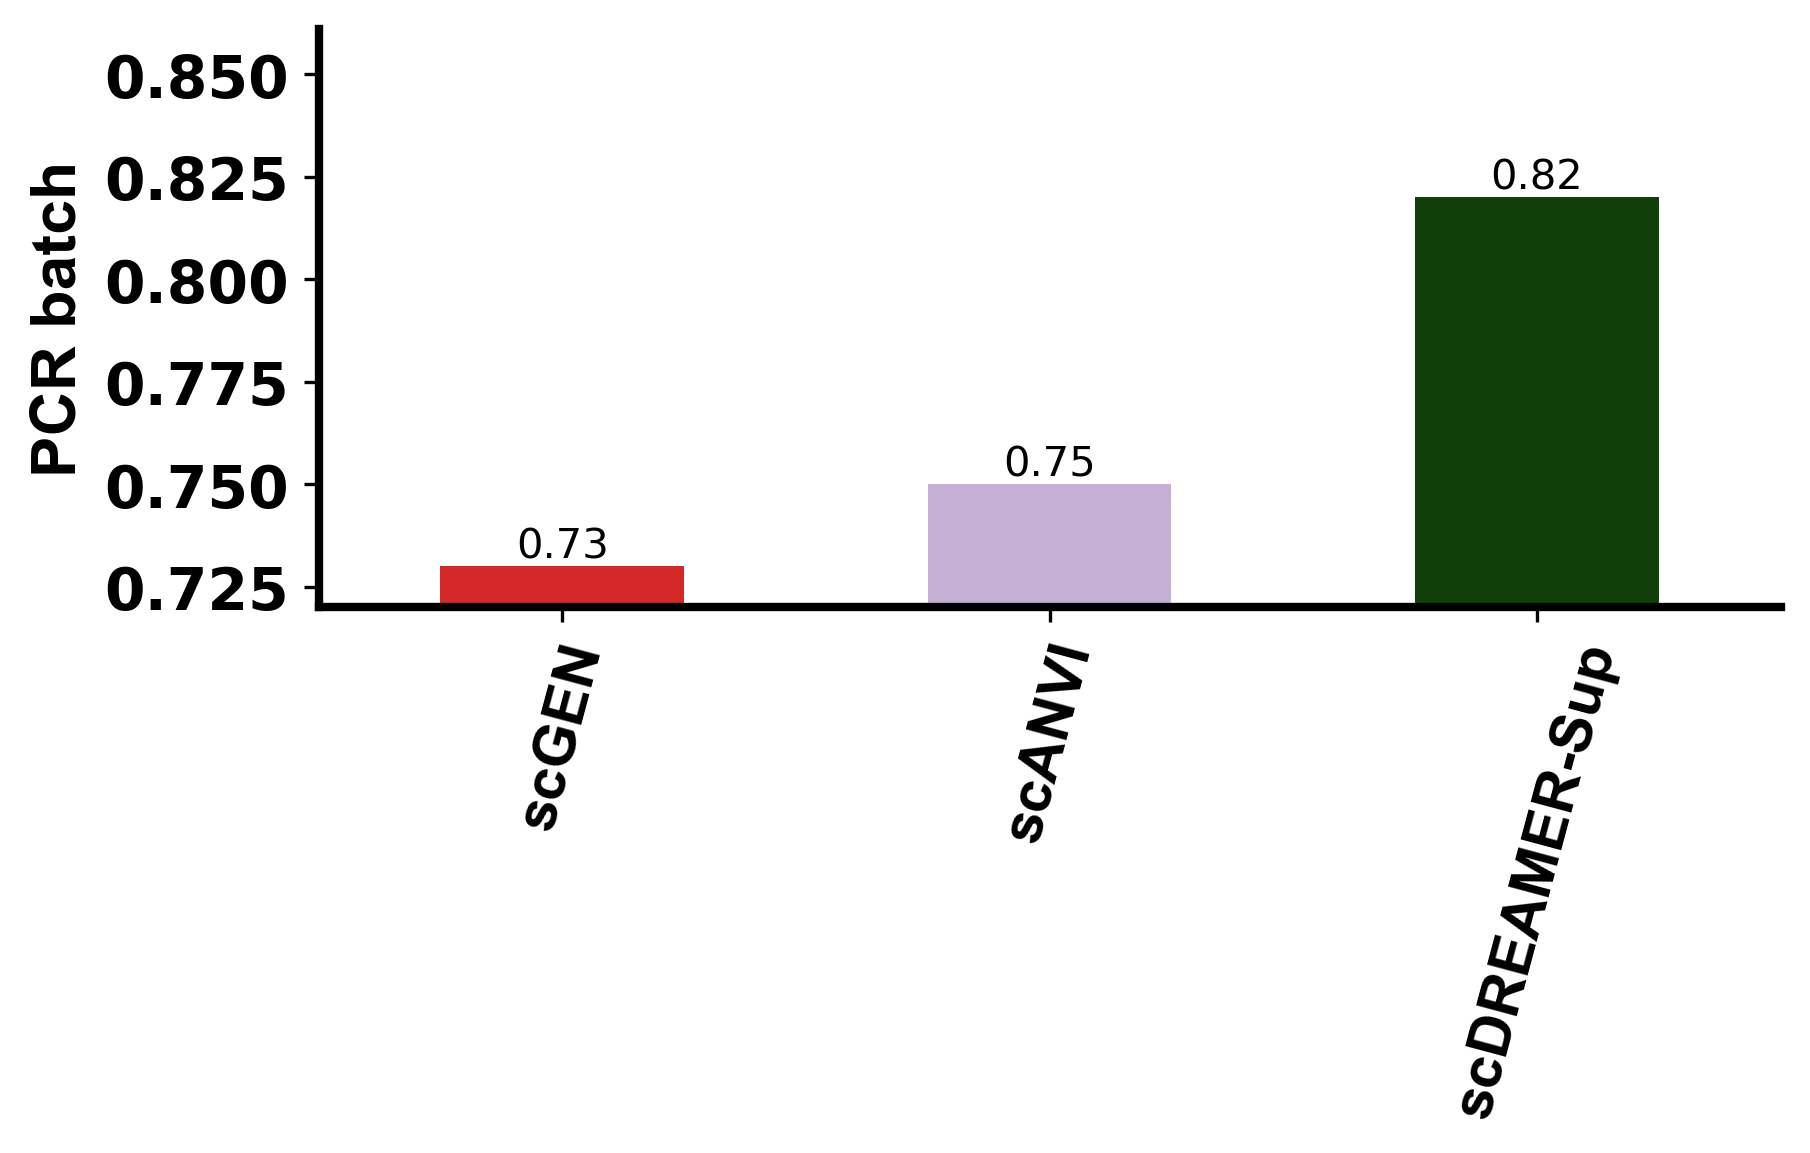

isolated f1 score Pancreas


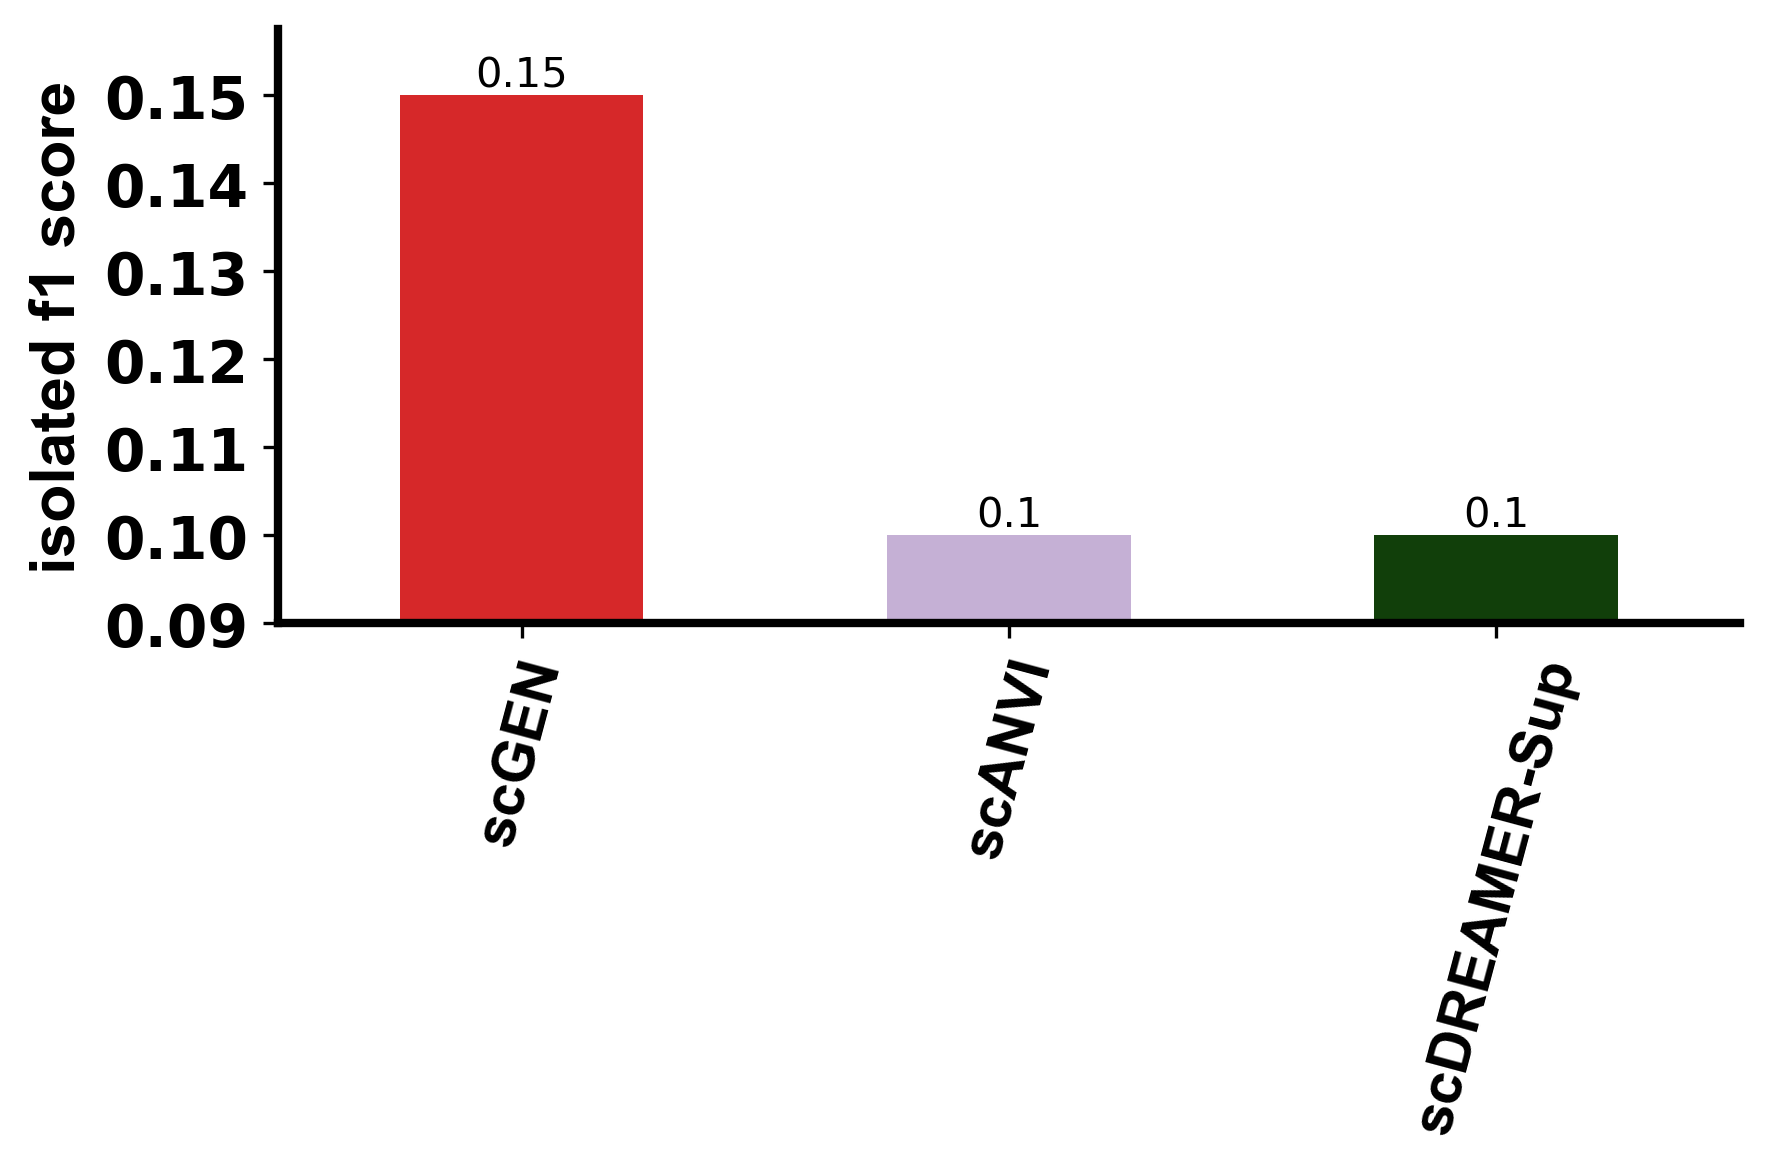

isolated silhouette coefficient Pancreas


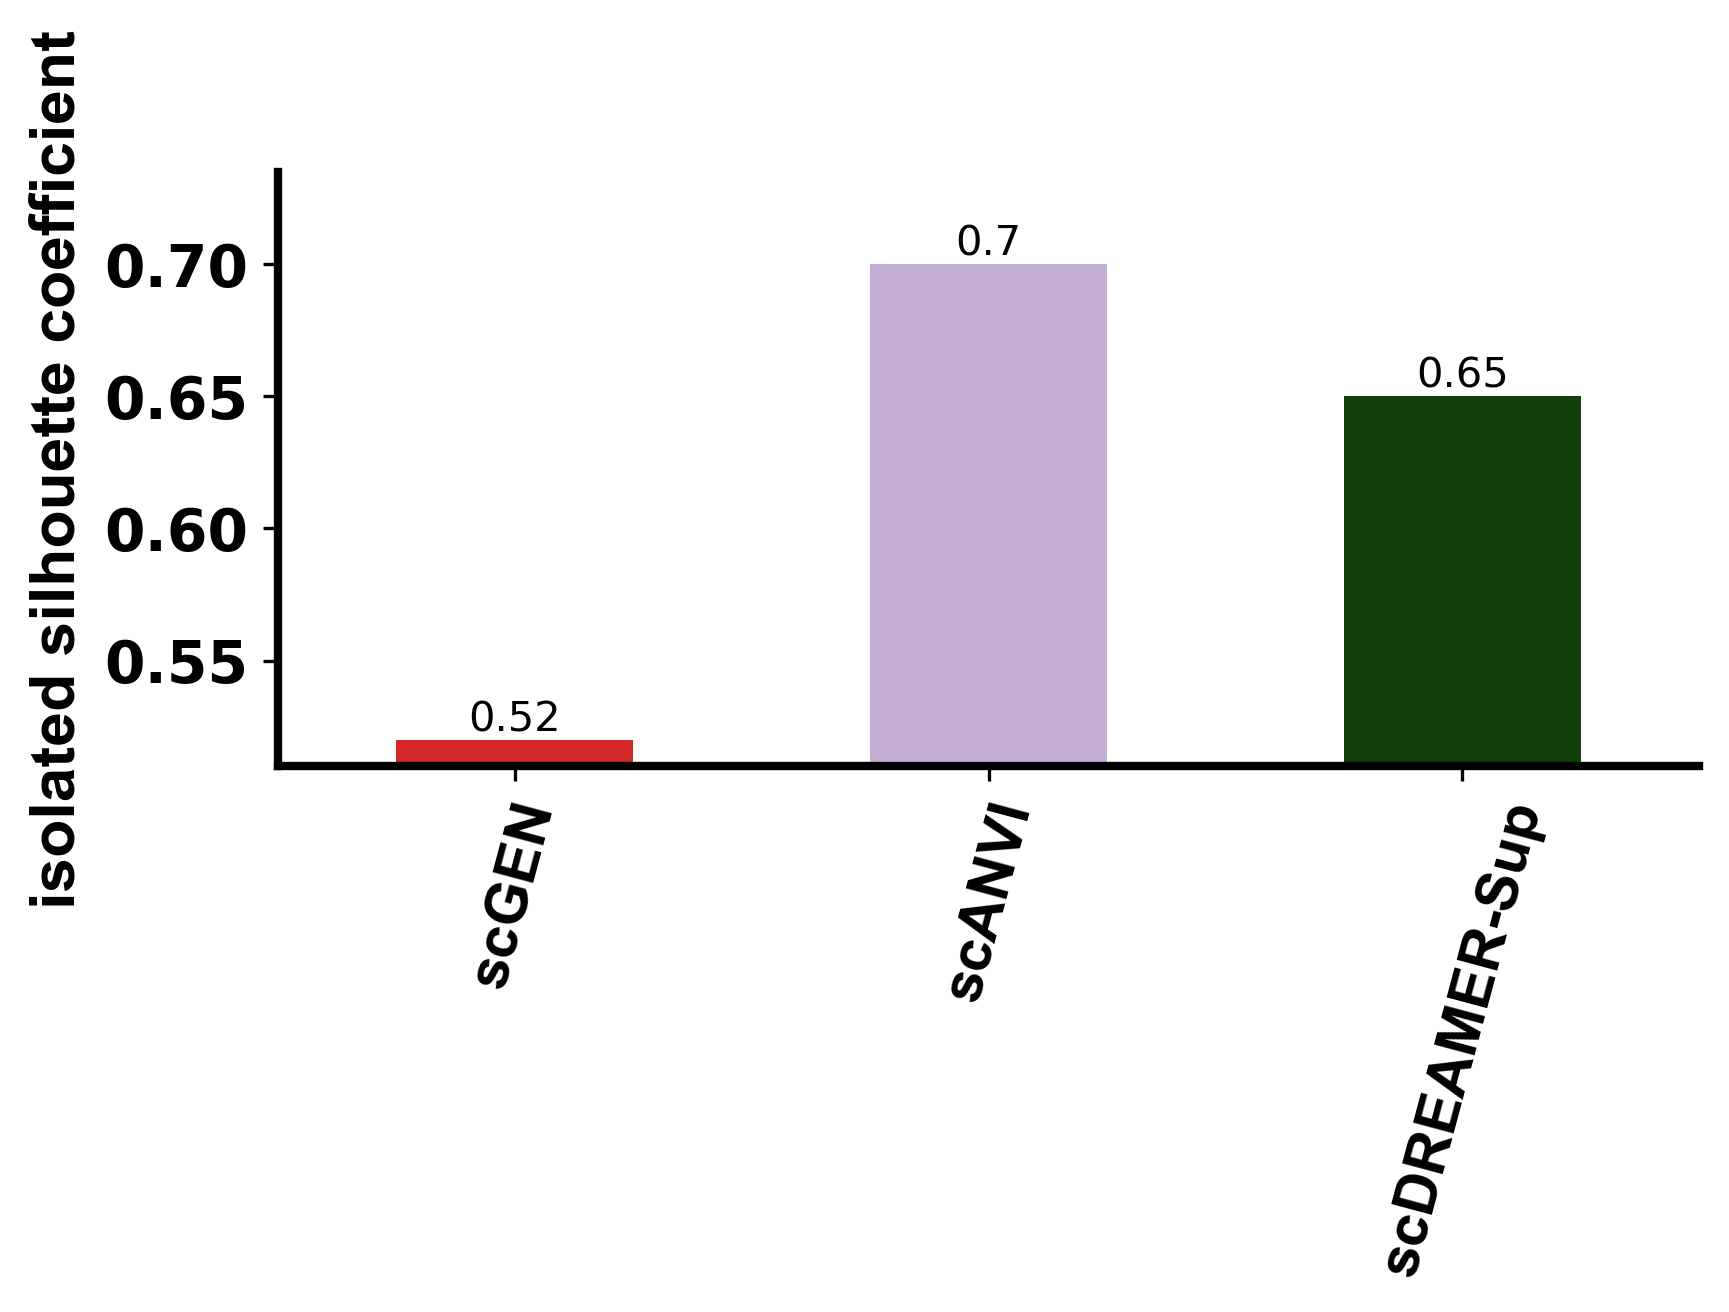

graph connectivity Pancreas


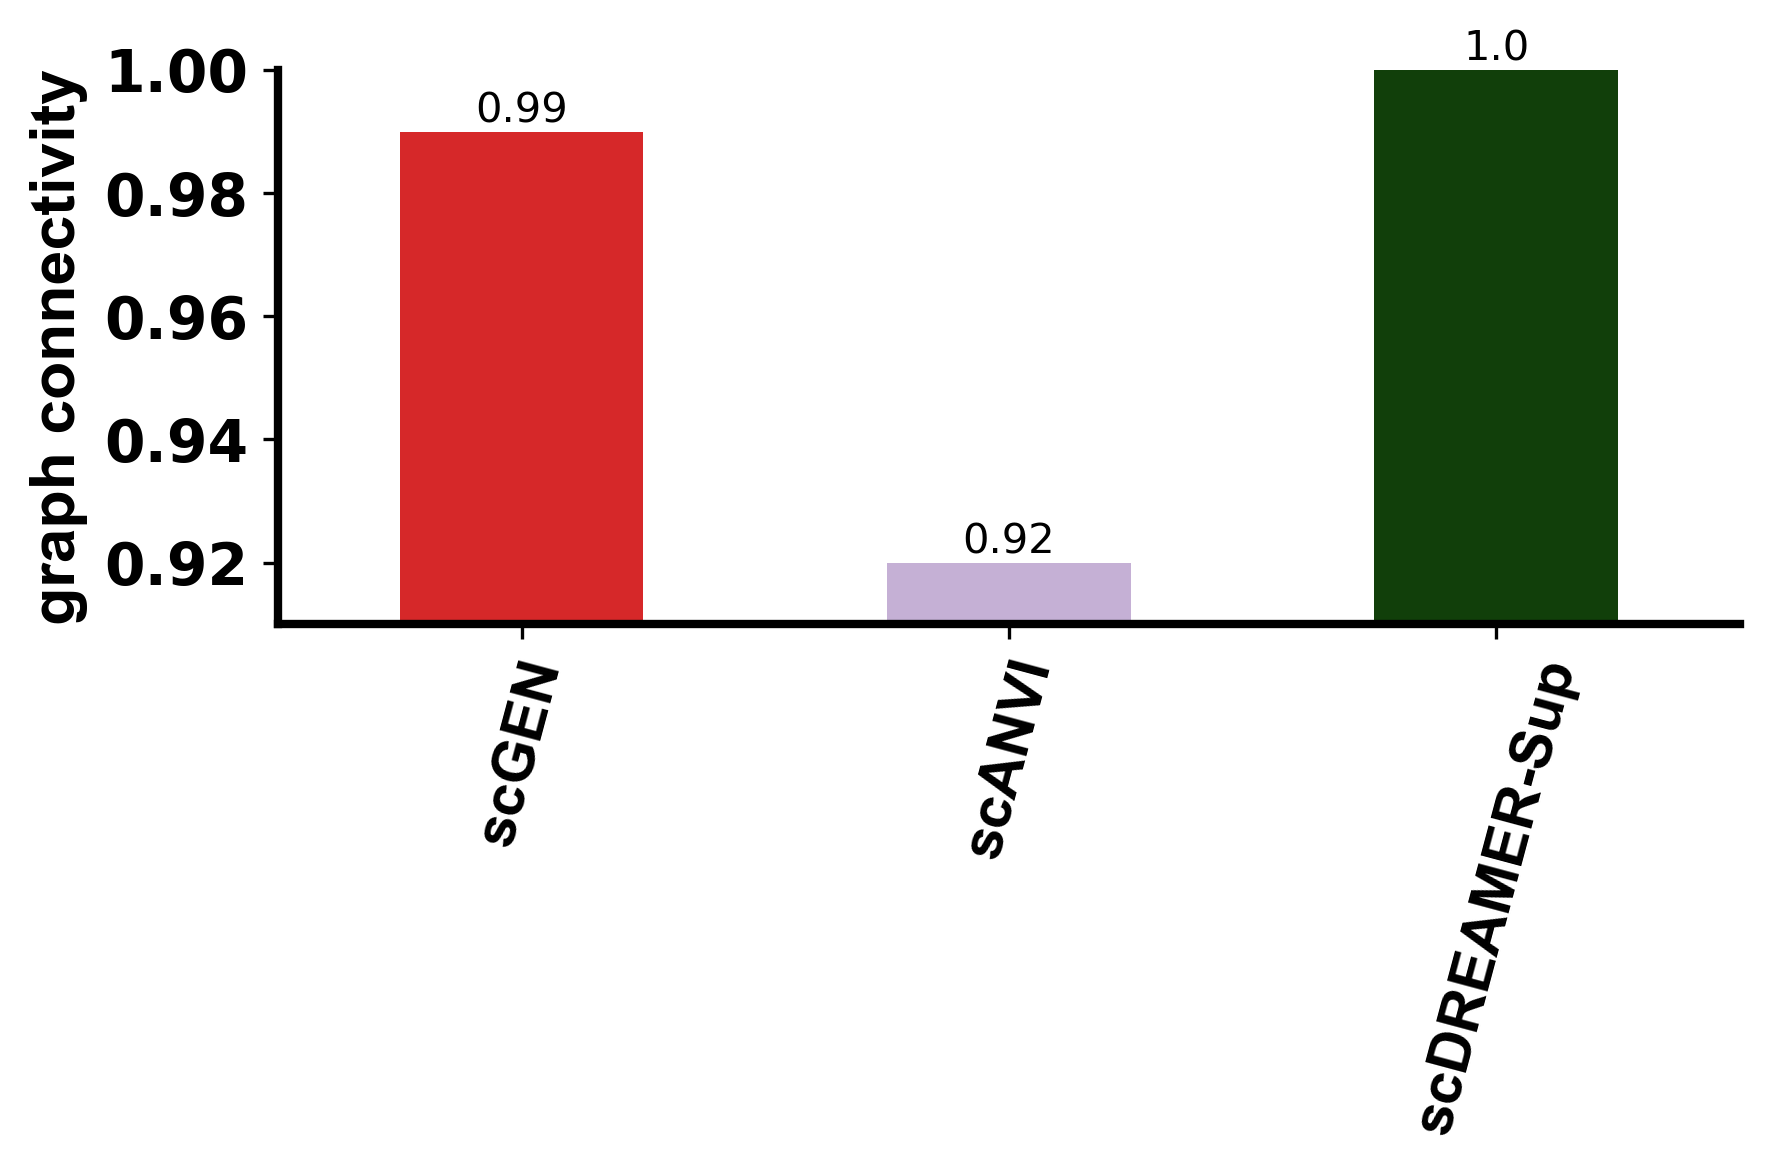

kBET Pancreas


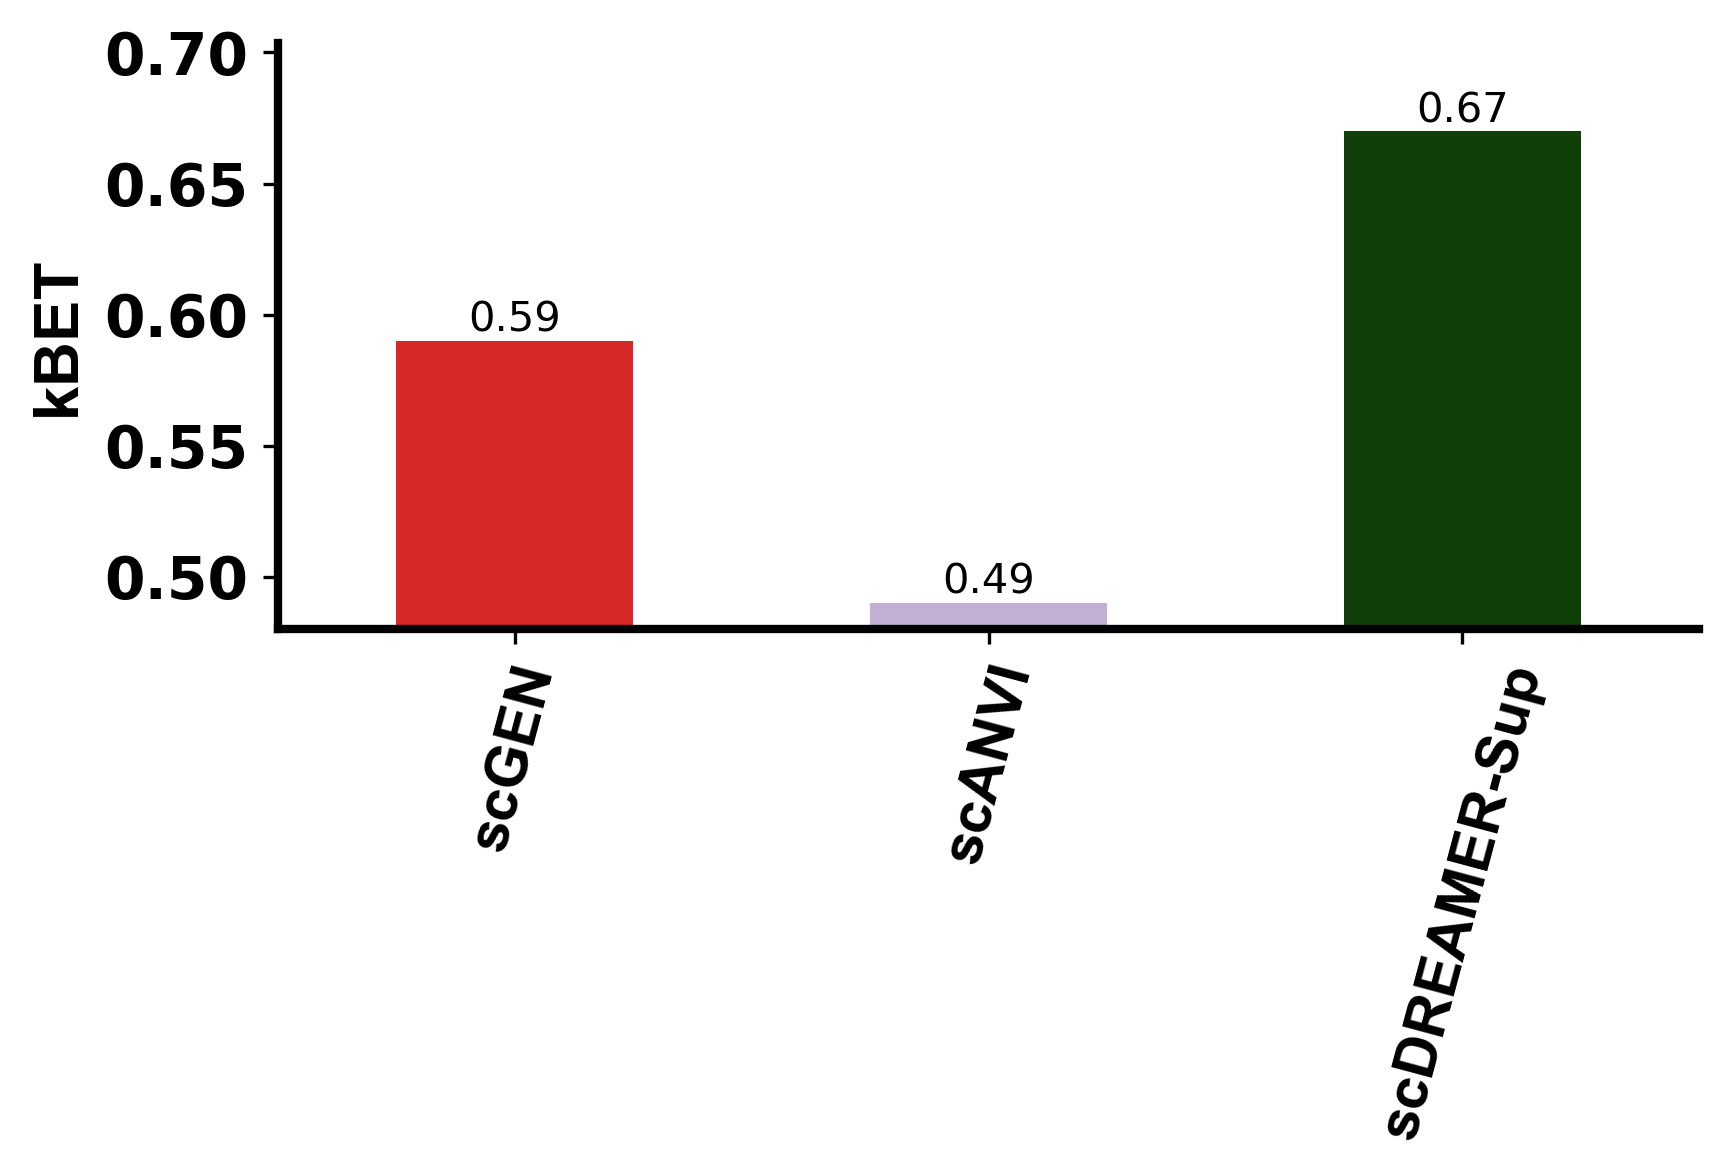

In [7]:
dataset = 'Pancreas'
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset = df_dataset[df_dataset['Percentage_wrong']==0]
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
df_dataset = df_dataset.loc[methods_to_plot,cloumns_to_plot]
df_dataset = df_dataset.apply(lambda x:x.apply(lambda y:round(y,2)))
df_dataset['color'] = pd.Series(df_dataset.index,index=df_dataset.index).replace(method_color_dct)
display(df_dataset)
for i in df_dataset.columns[:-1]:
    print (i,dataset)
    plot_bar(df_dataset, i,save_folder = save_folder+dataset)

NMI cluster/label  ARI cluster/label  ASW label  \
Method                                                           
scGEN                       0.96               0.96       0.70   
scANVI                      0.87               0.77       0.64   
scDREAMER-Sup               0.99               0.99       0.67   

               ASW label/batch  PCR batch  isolated f1 score  \
Method                                                         
scGEN                     0.79       0.19               0.99   
scANVI                    0.86       0.67               0.94   
scDREAMER-Sup             0.87       0.50               0.99   

               isolated silhouette coefficient  graph connectivity  kBET  \
Method                                                                     
scGEN                                     0.54                0.88  0.48   
scANVI                                    0.57                0.75  0.36   
scDREAMER-Sup                             0.55                1.00  0.62   

                 color  
Method                  
scGEN          #d62829  
scANVI         #c5b0d5  
scDREAMER-Sup  #113f0a

NMI cluster/label Lung


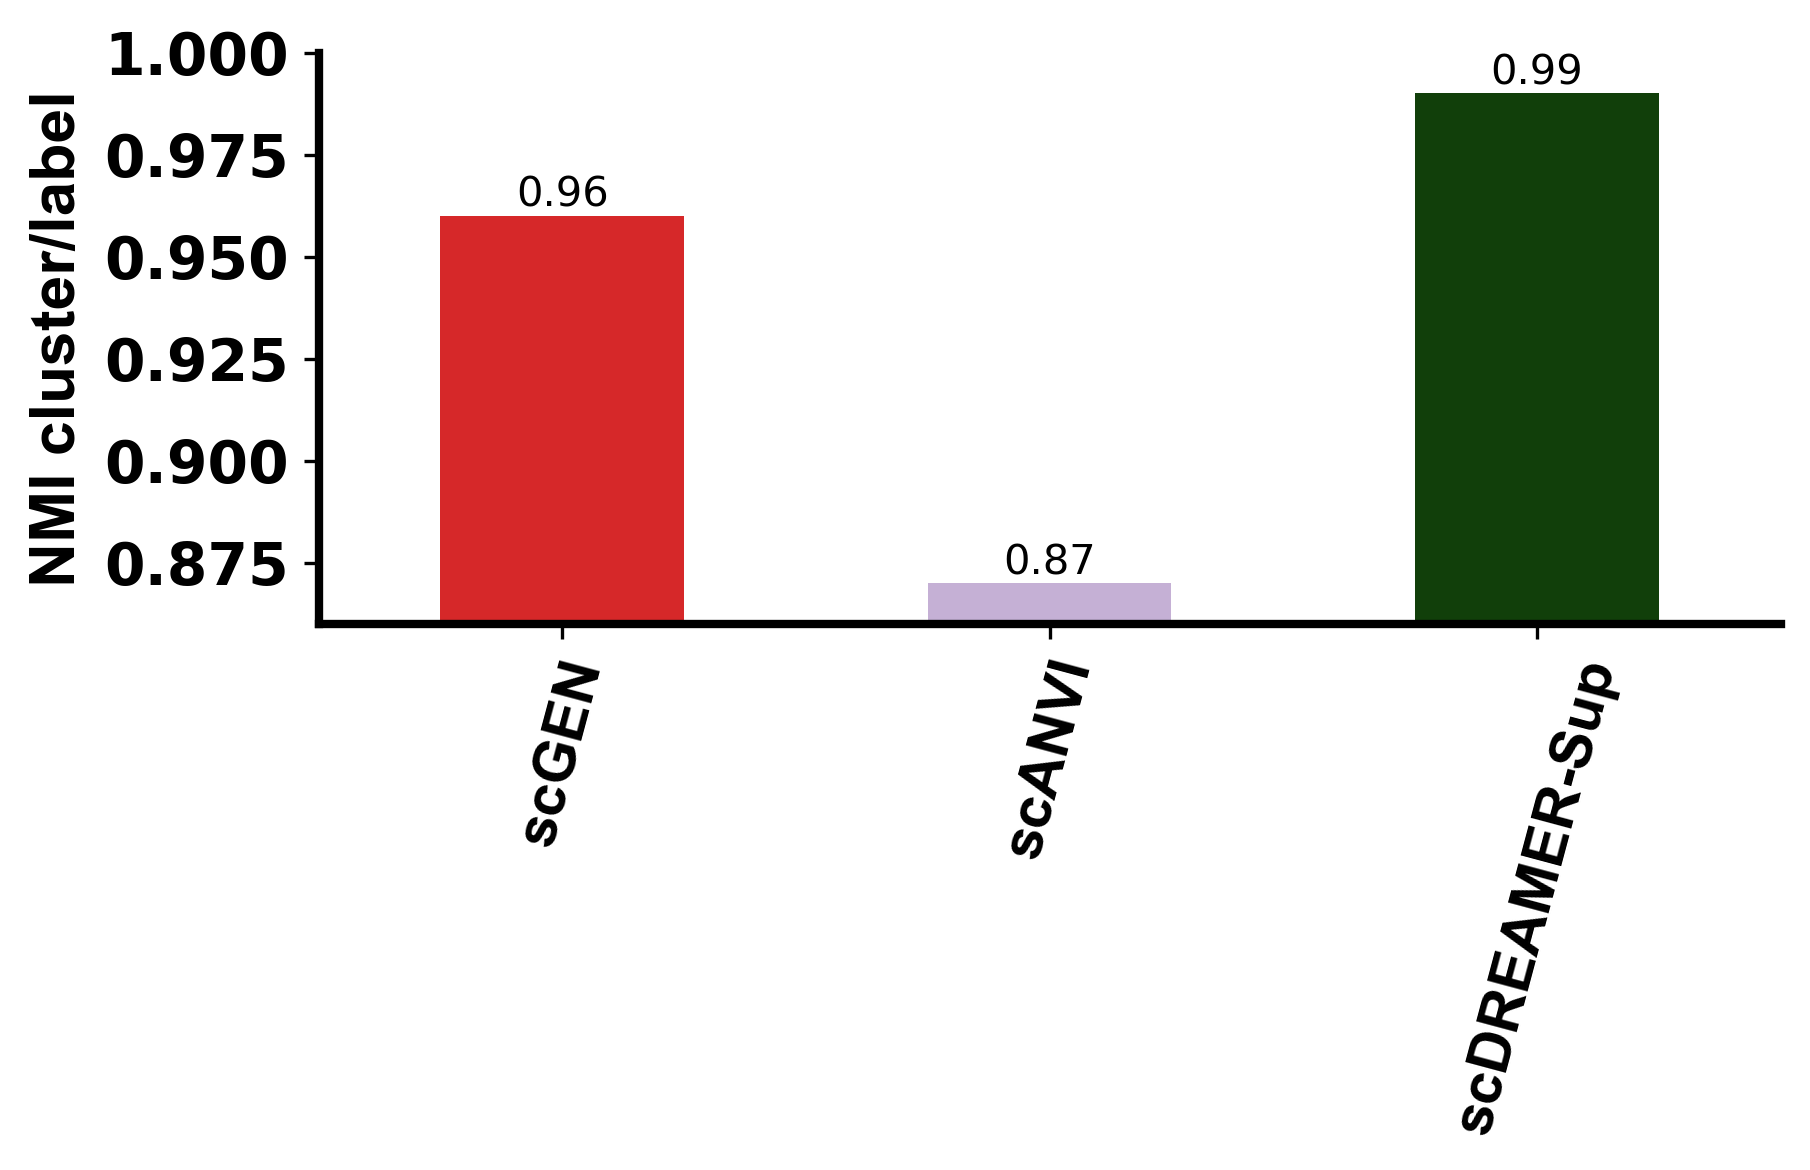

ARI cluster/label Lung


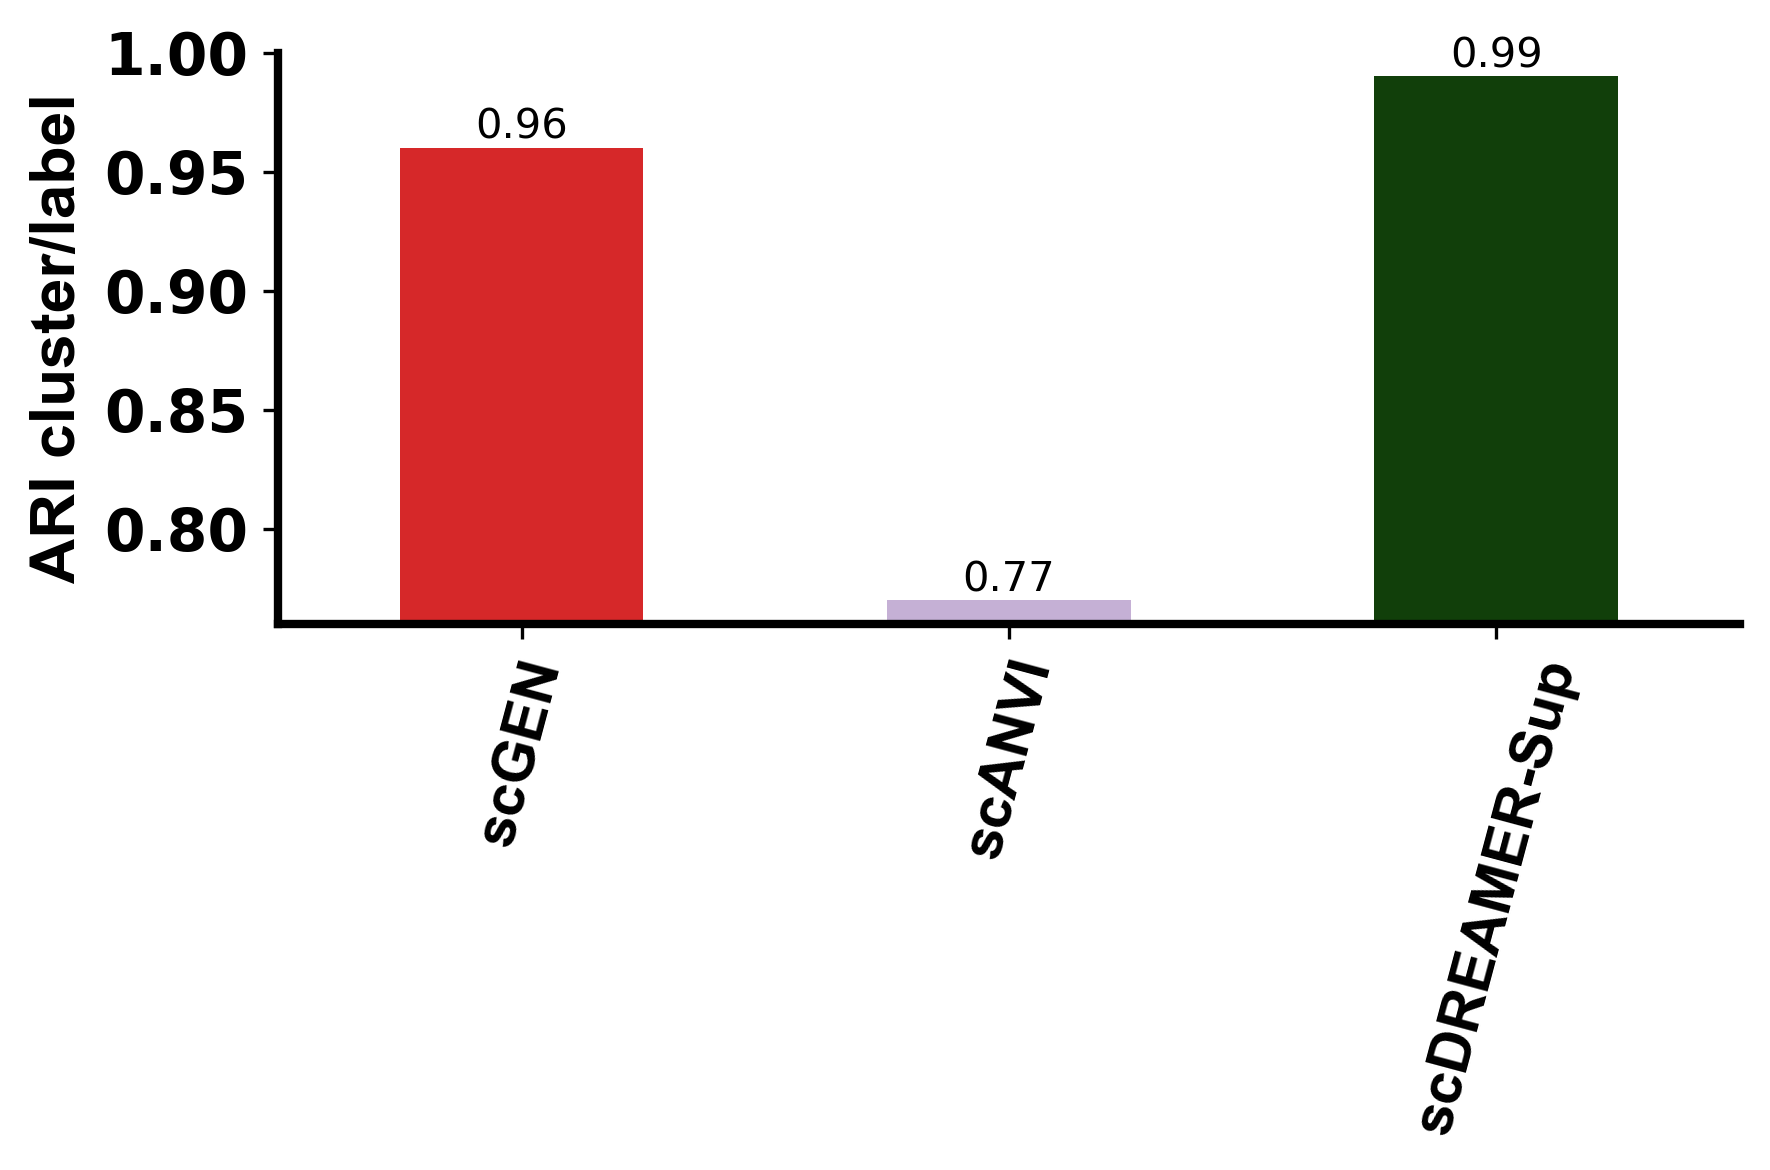

ASW label Lung


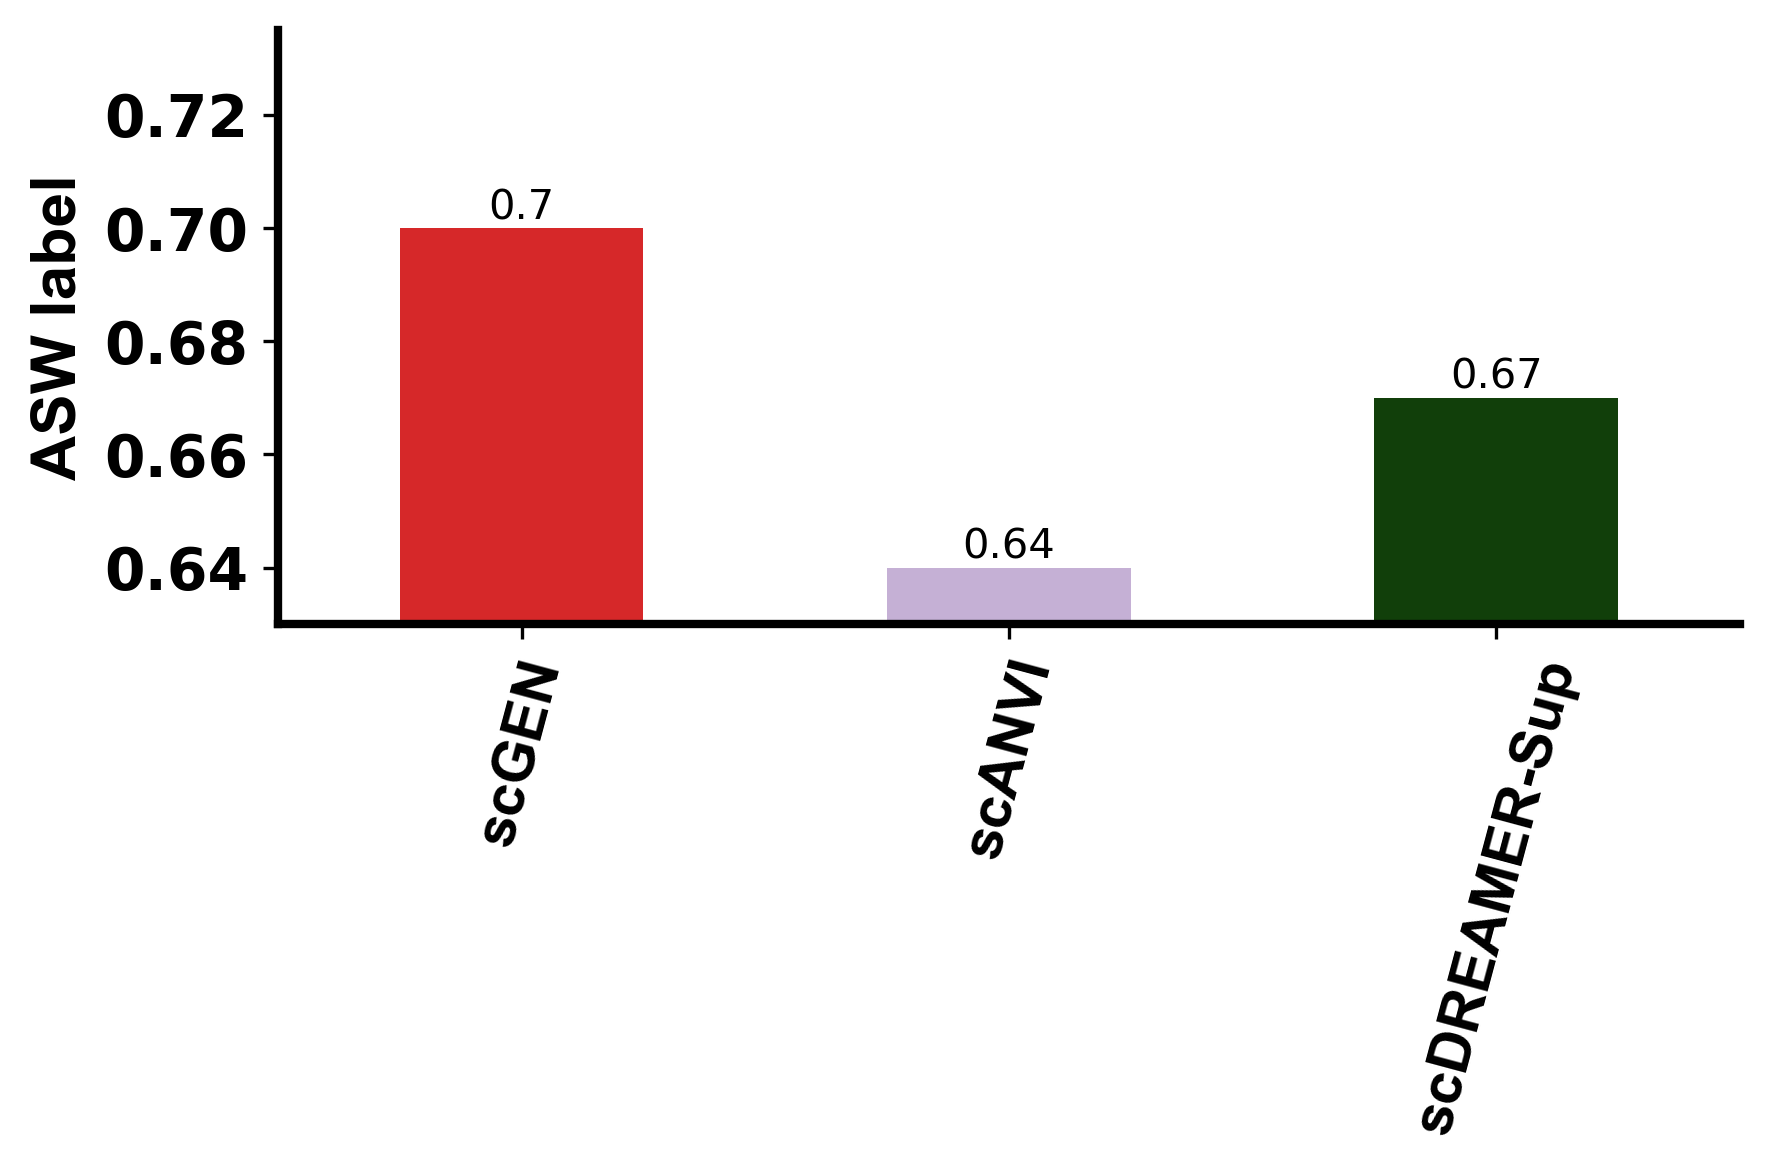

ASW label/batch Lung


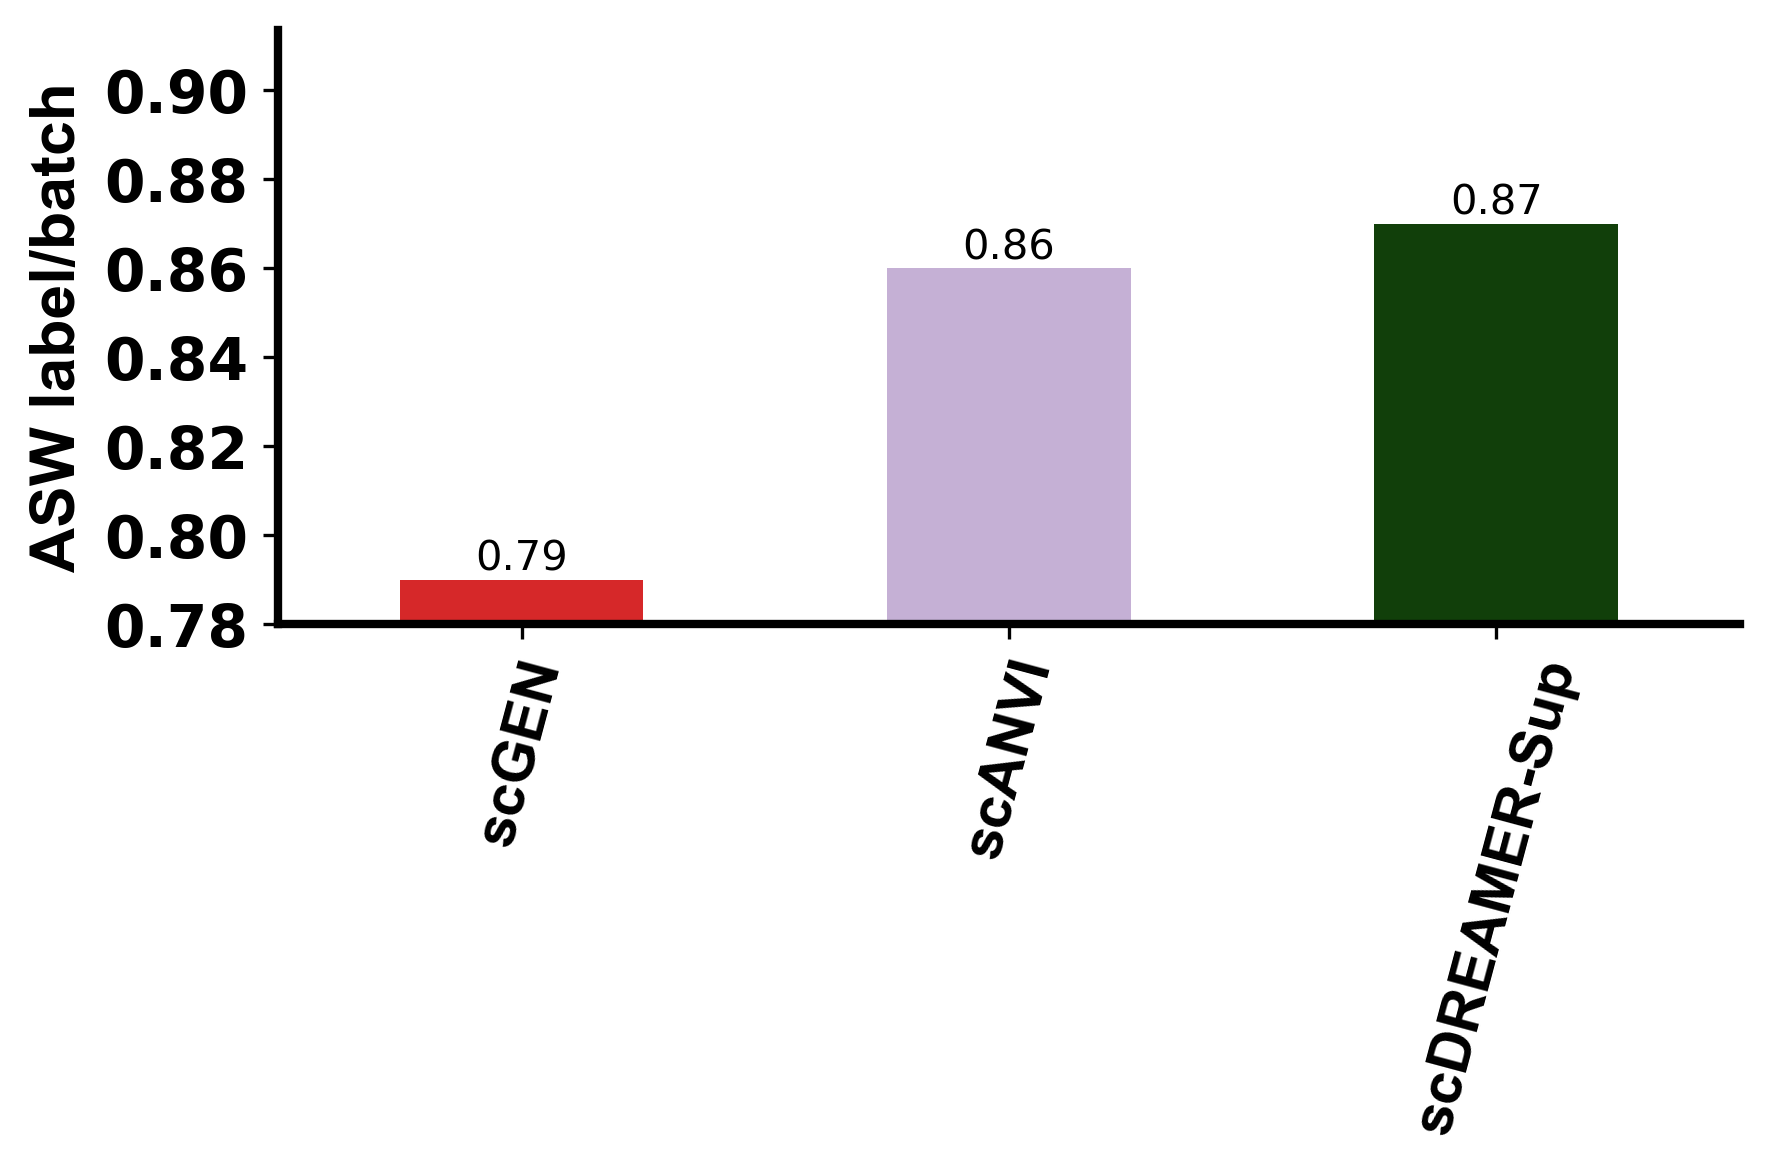

PCR batch Lung


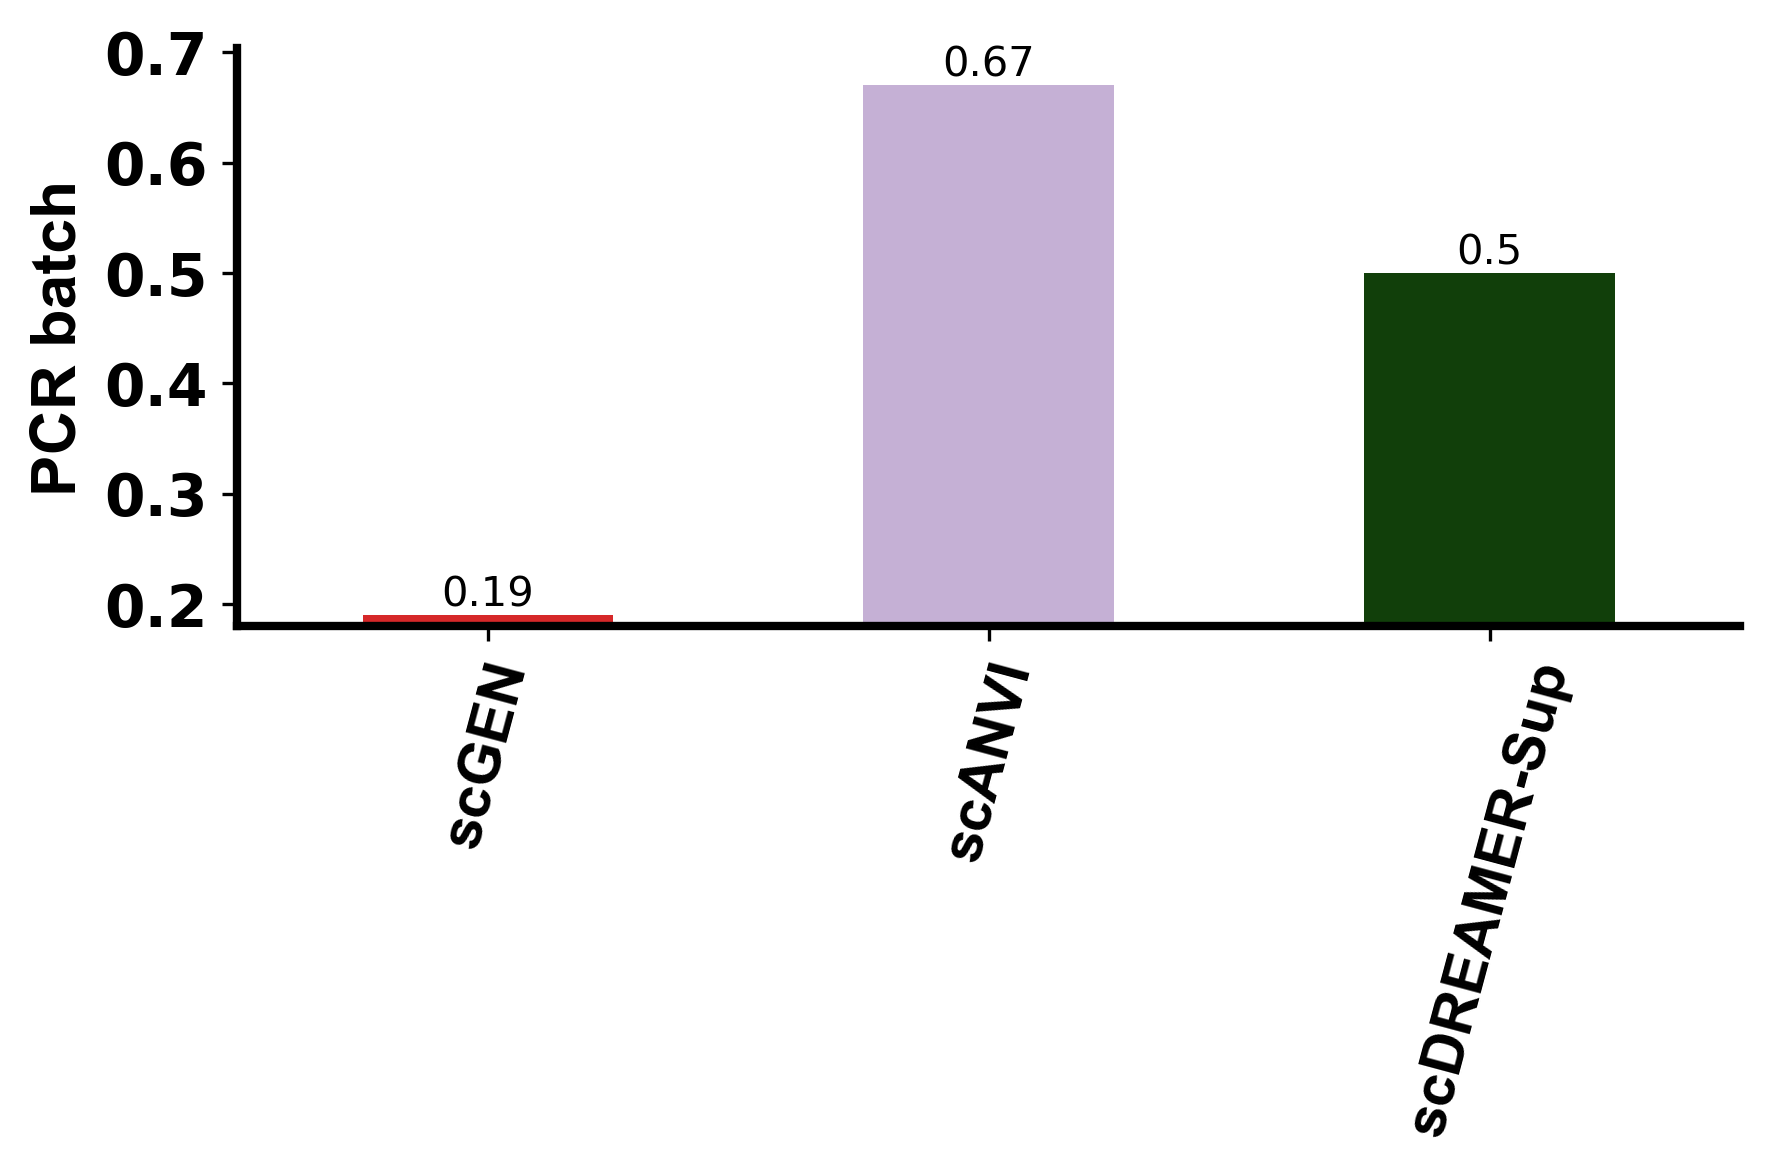

isolated f1 score Lung


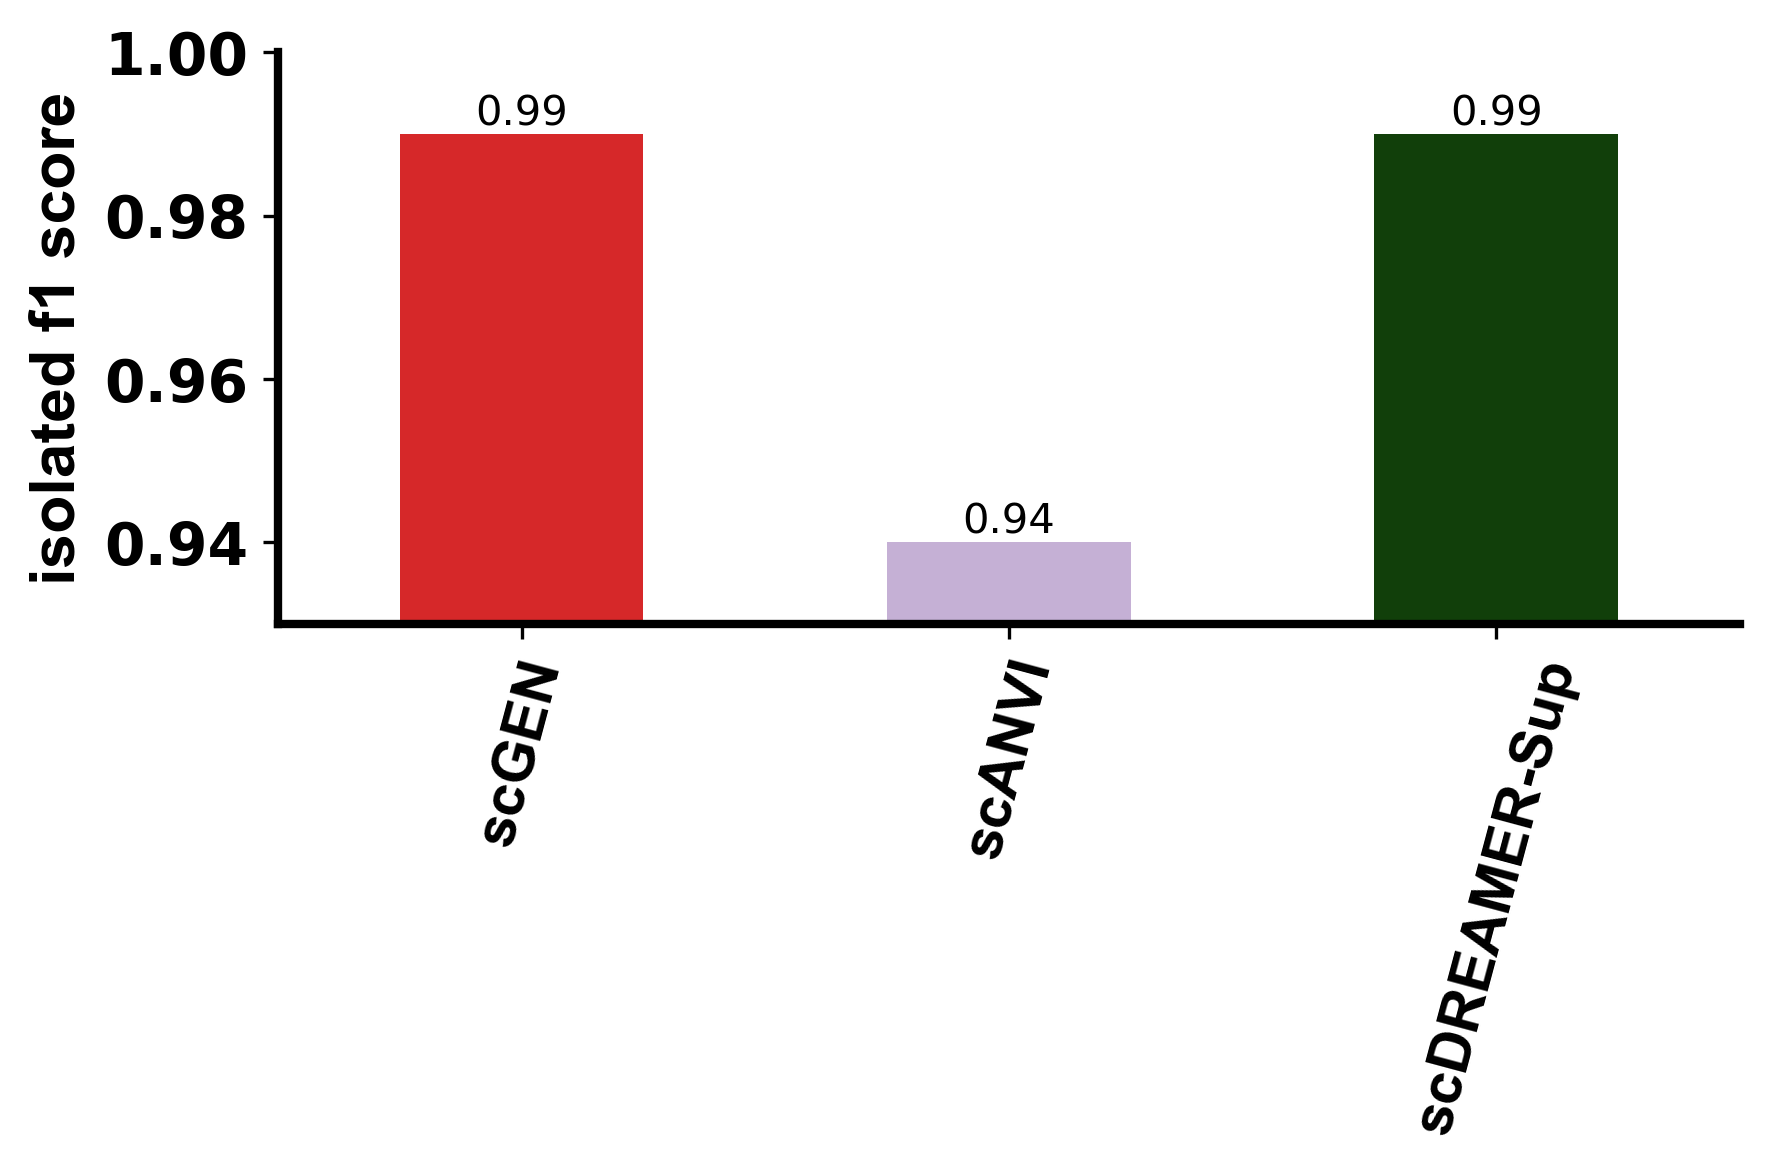

isolated silhouette coefficient Lung


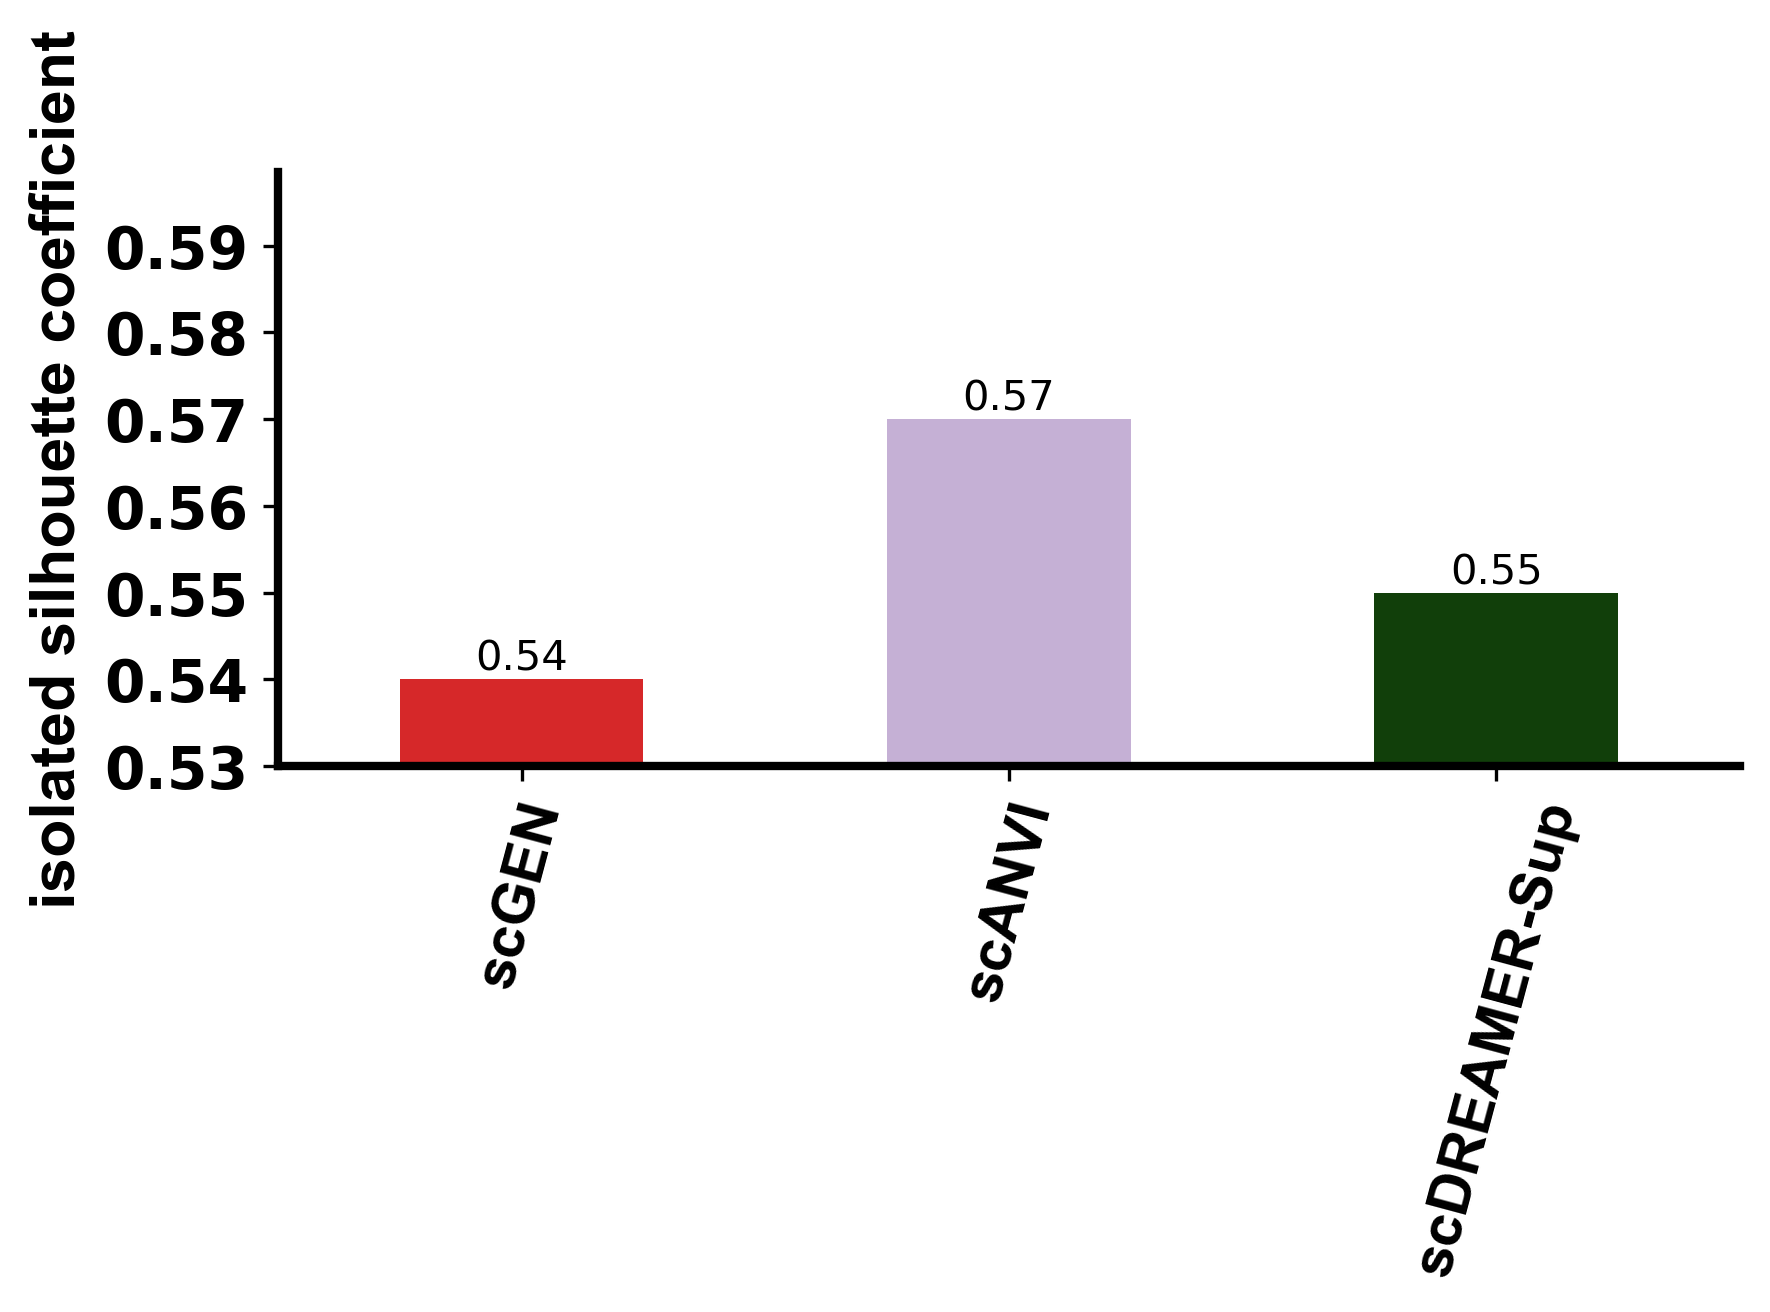

graph connectivity Lung


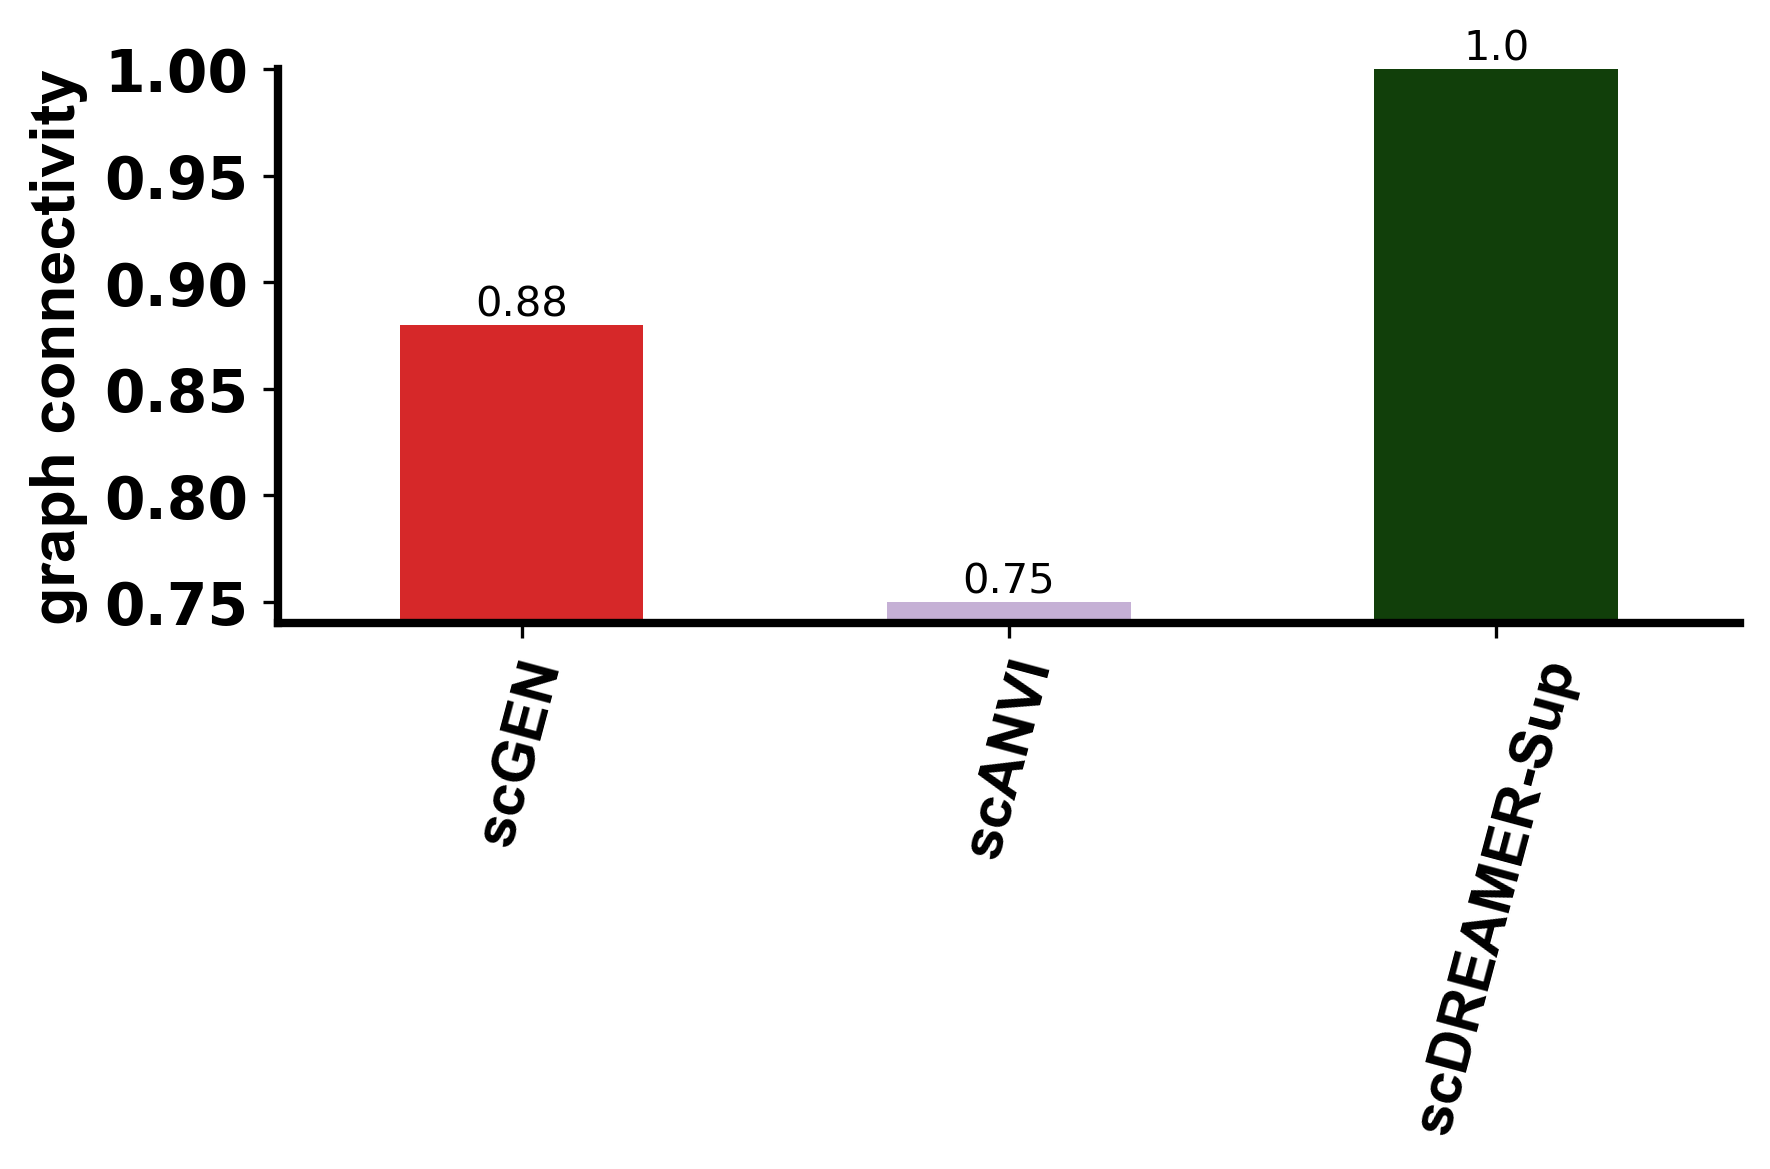

kBET Lung


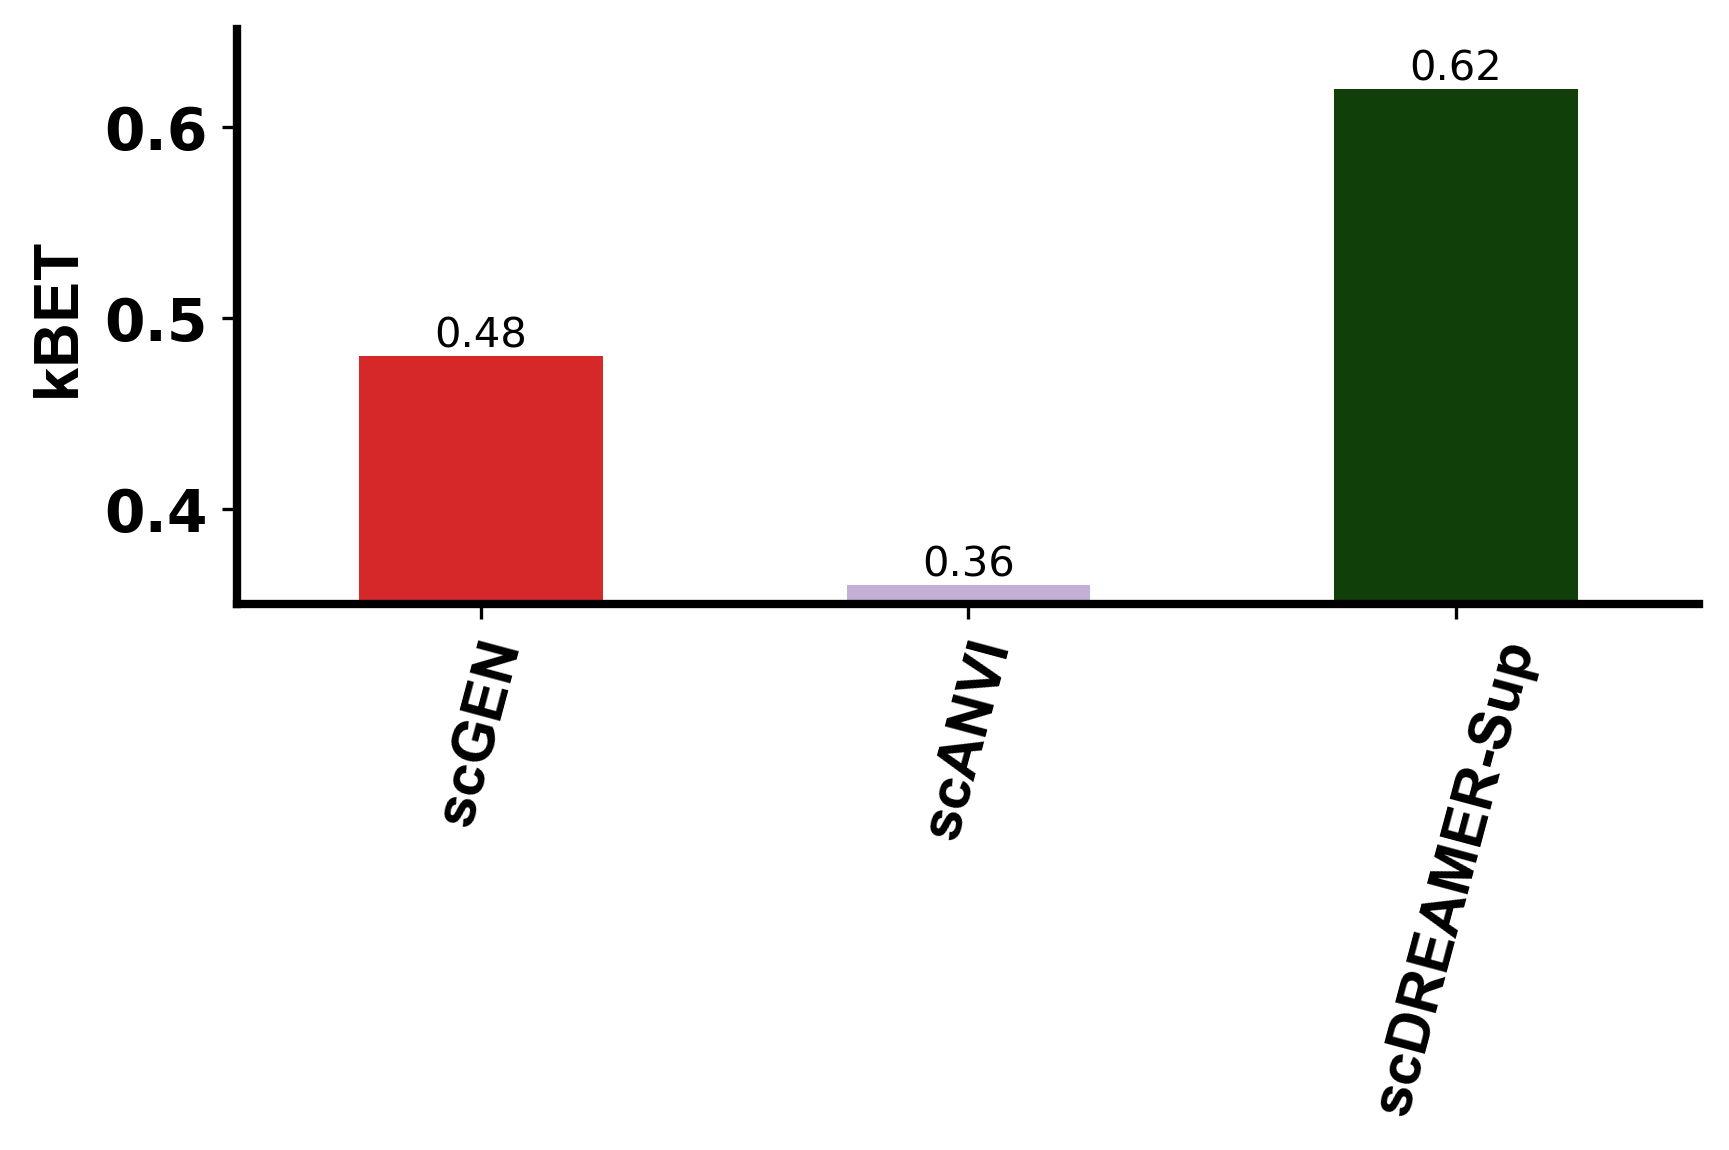

In [8]:
dataset = 'Lung'
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset = df_dataset[df_dataset['Percentage_wrong']==0]
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
df_dataset = df_dataset.loc[methods_to_plot,cloumns_to_plot]
df_dataset = df_dataset.apply(lambda x:x.apply(lambda y:round(y,2)))
df_dataset['color'] = pd.Series(df_dataset.index,index=df_dataset.index).replace(method_color_dct)
display(df_dataset)
for i in df_dataset.columns[:-1]:
    print (i,dataset)
    plot_bar(df_dataset, i,save_folder = save_folder+dataset)

NMI cluster/label  ARI cluster/label  ASW label  \
Method                                                           
scGEN                       0.91               0.93       0.69   
scANVI                      0.88               0.92       0.62   
scDREAMER-Sup               0.98               0.99       0.65   

               ASW label/batch  PCR batch  isolated f1 score  \
Method                                                         
scGEN                     0.90       0.47               0.87   
scANVI                    0.87       0.73               0.87   
scDREAMER-Sup             0.91       0.64               0.99   

               isolated silhouette coefficient  graph connectivity  kBET  \
Method                                                                     
scGEN                                     0.57                0.99  0.46   
scANVI                                    0.60                0.98  0.22   
scDREAMER-Sup                             0.54                1.00  0.58   

                 color  
Method                  
scGEN          #d62829  
scANVI         #c5b0d5  
scDREAMER-Sup  #113f0a

NMI cluster/label Immune_Human


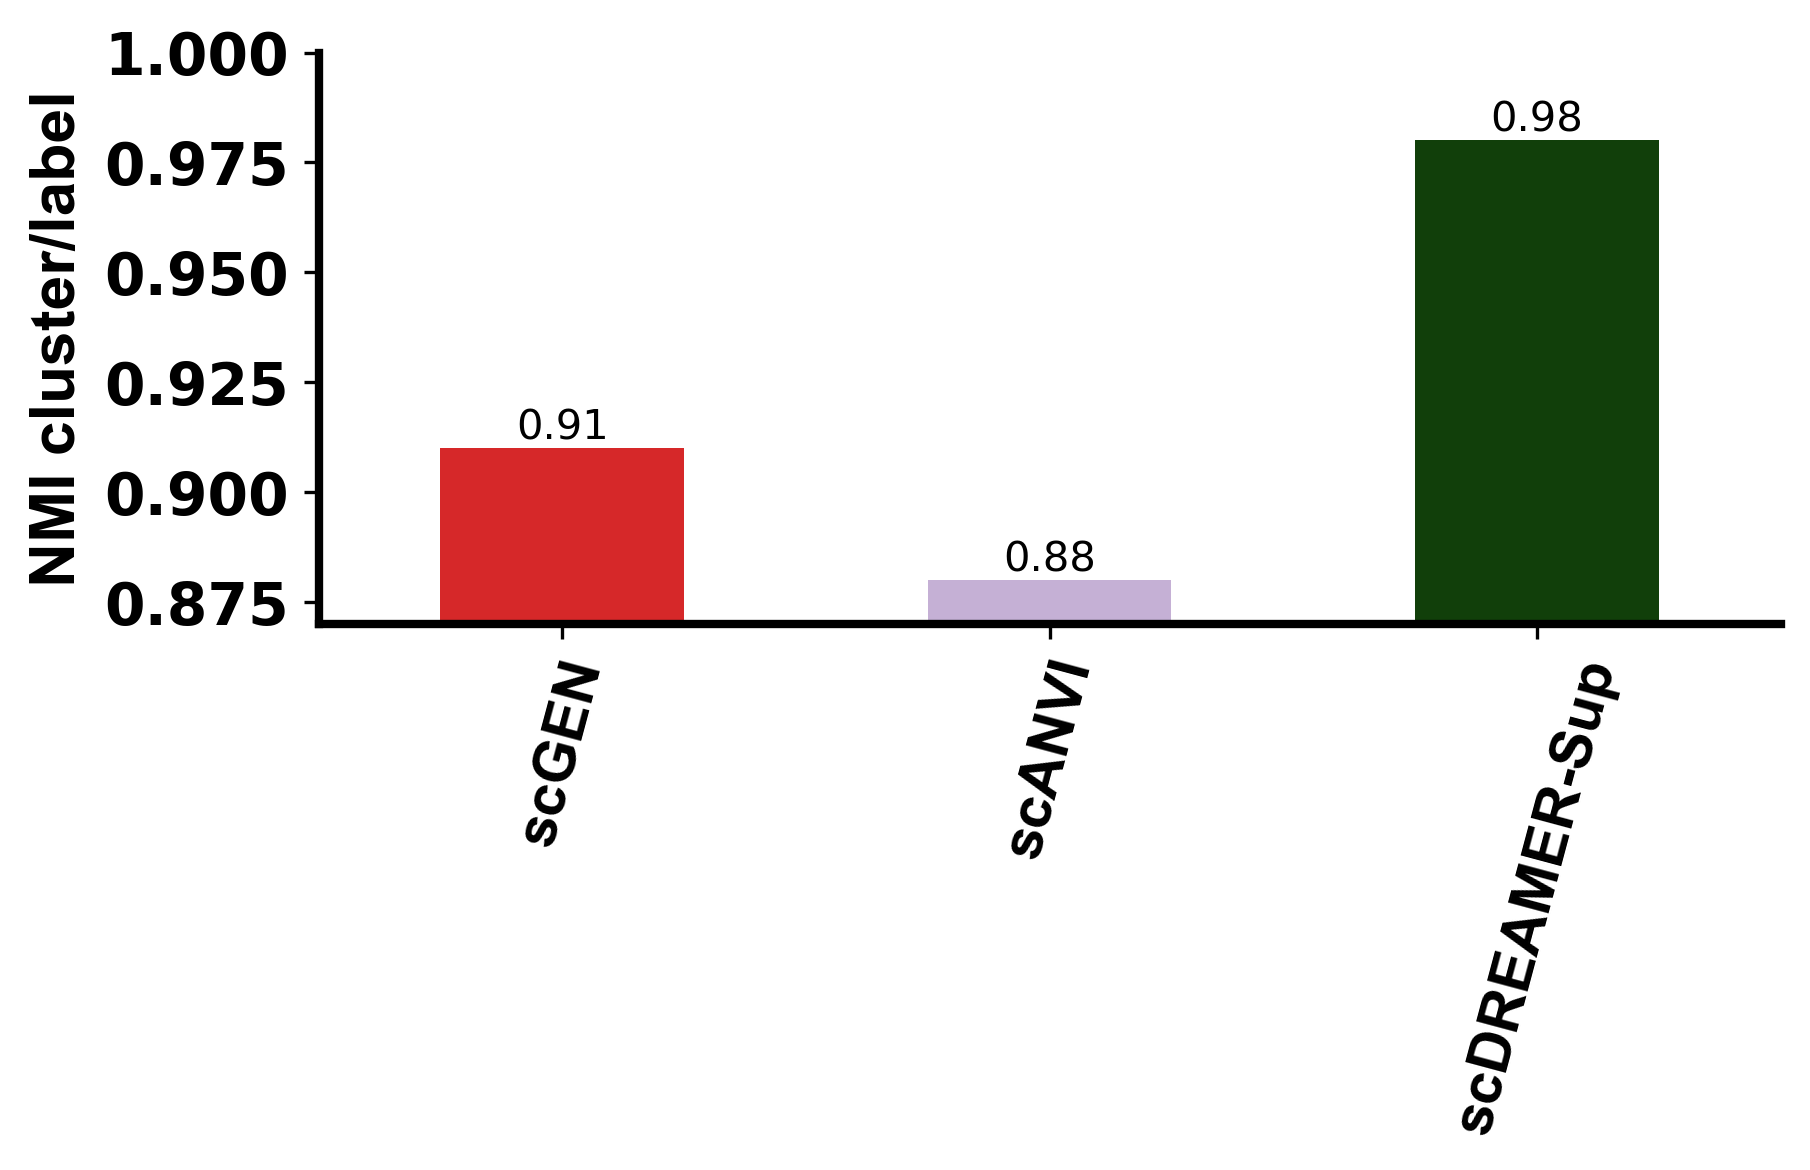

ARI cluster/label Immune_Human


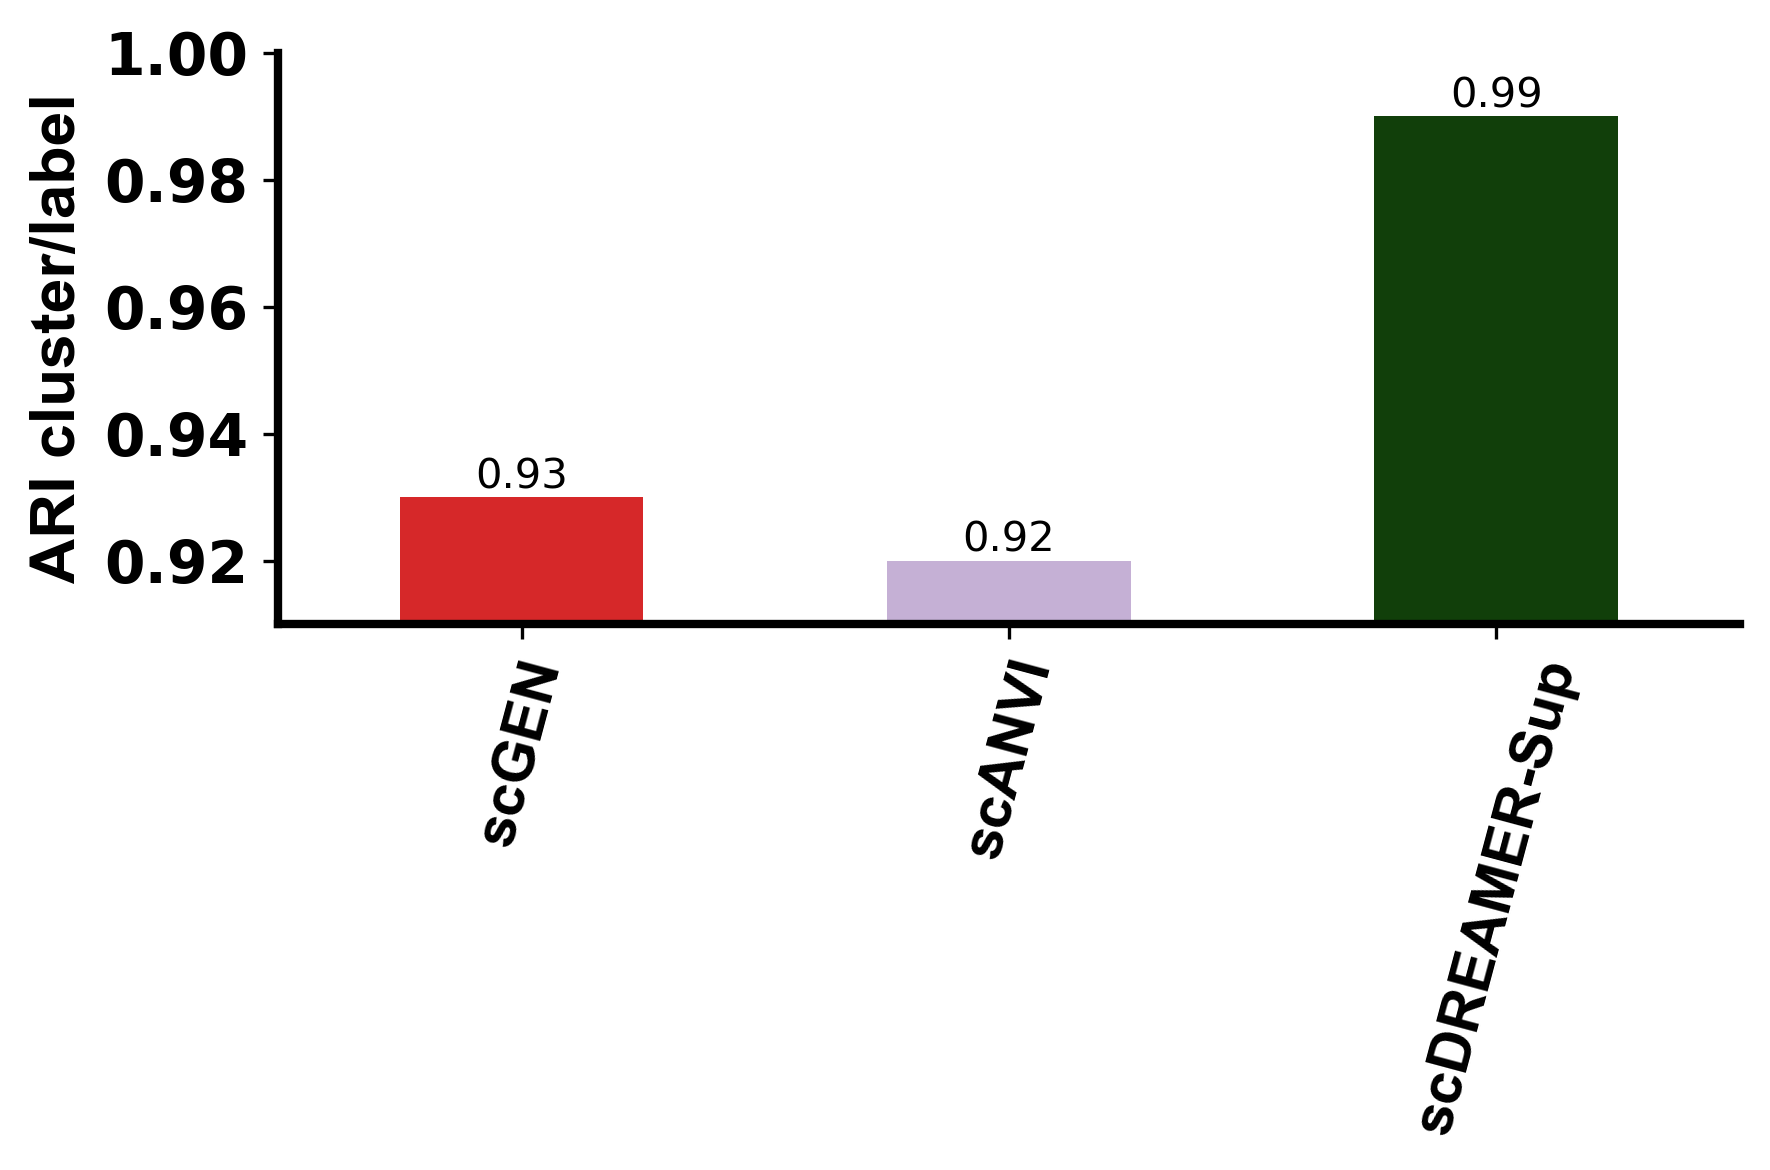

ASW label Immune_Human


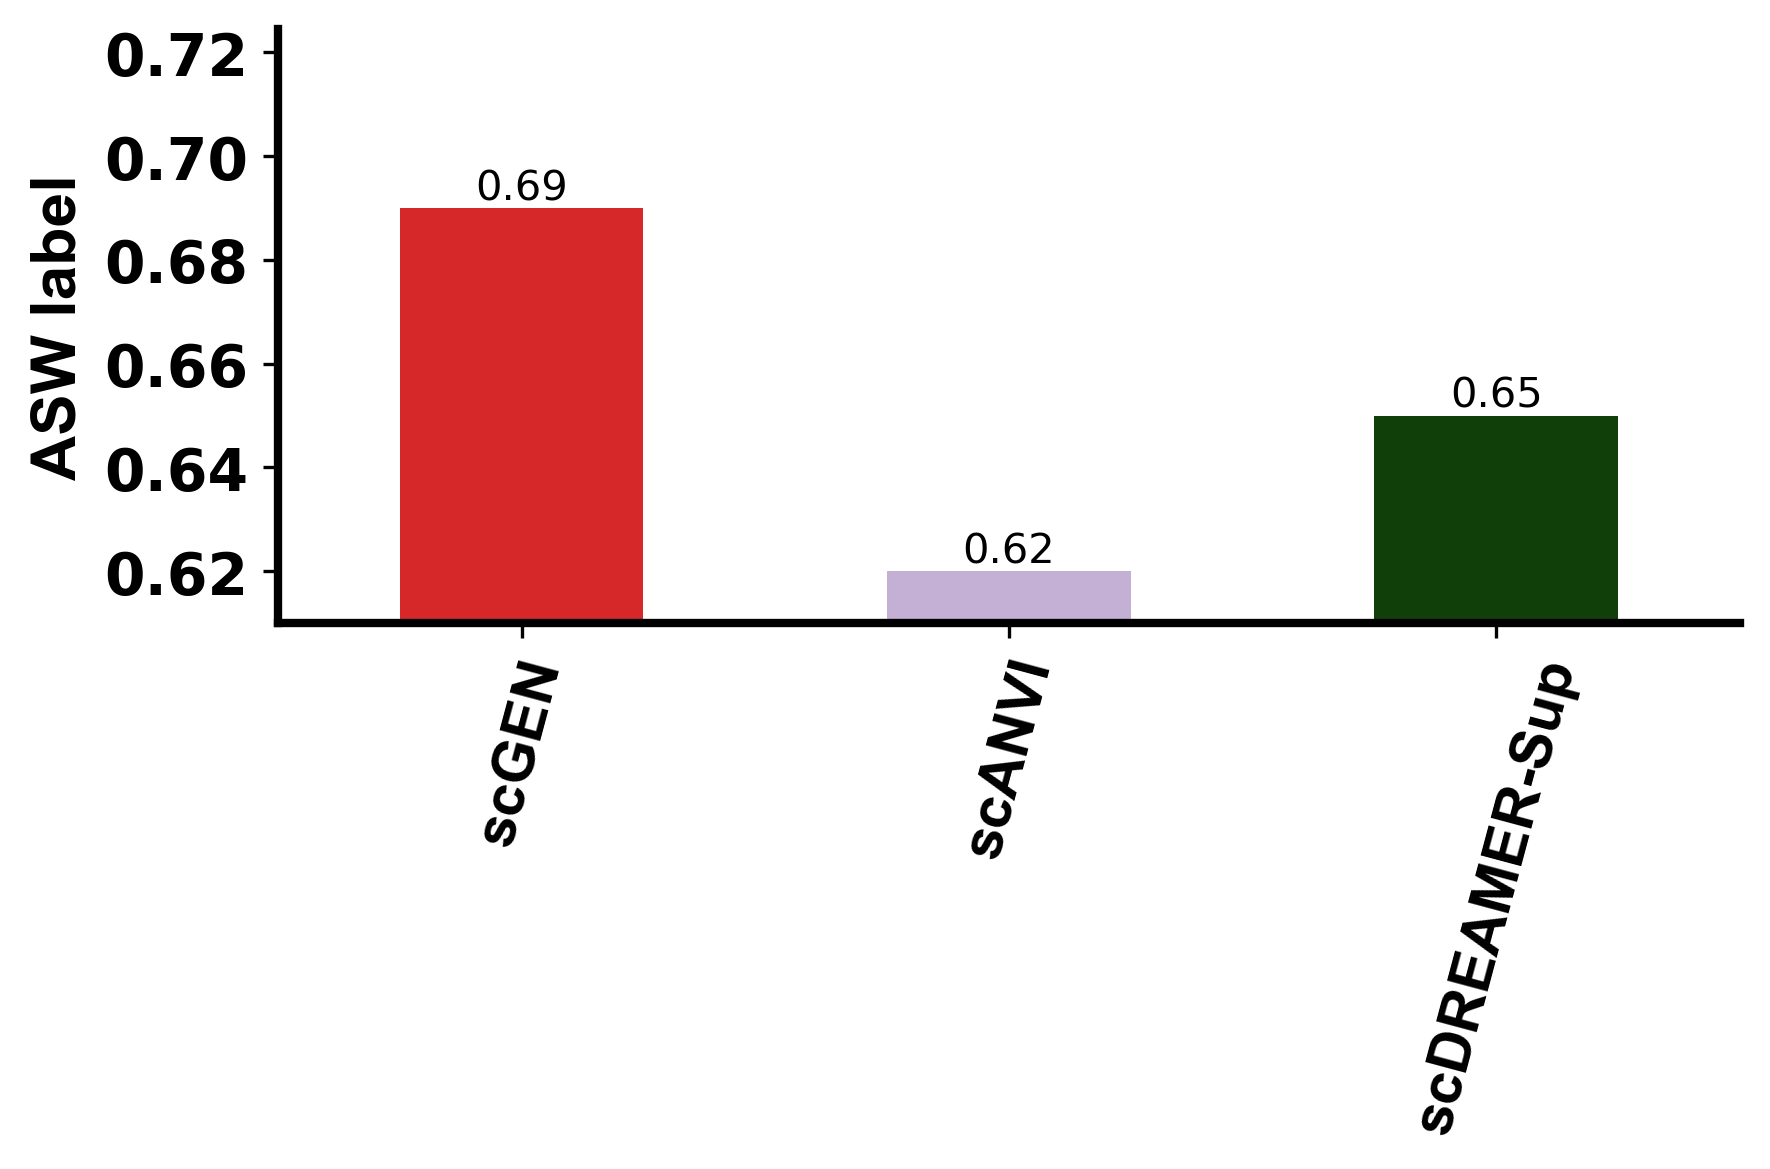

ASW label/batch Immune_Human


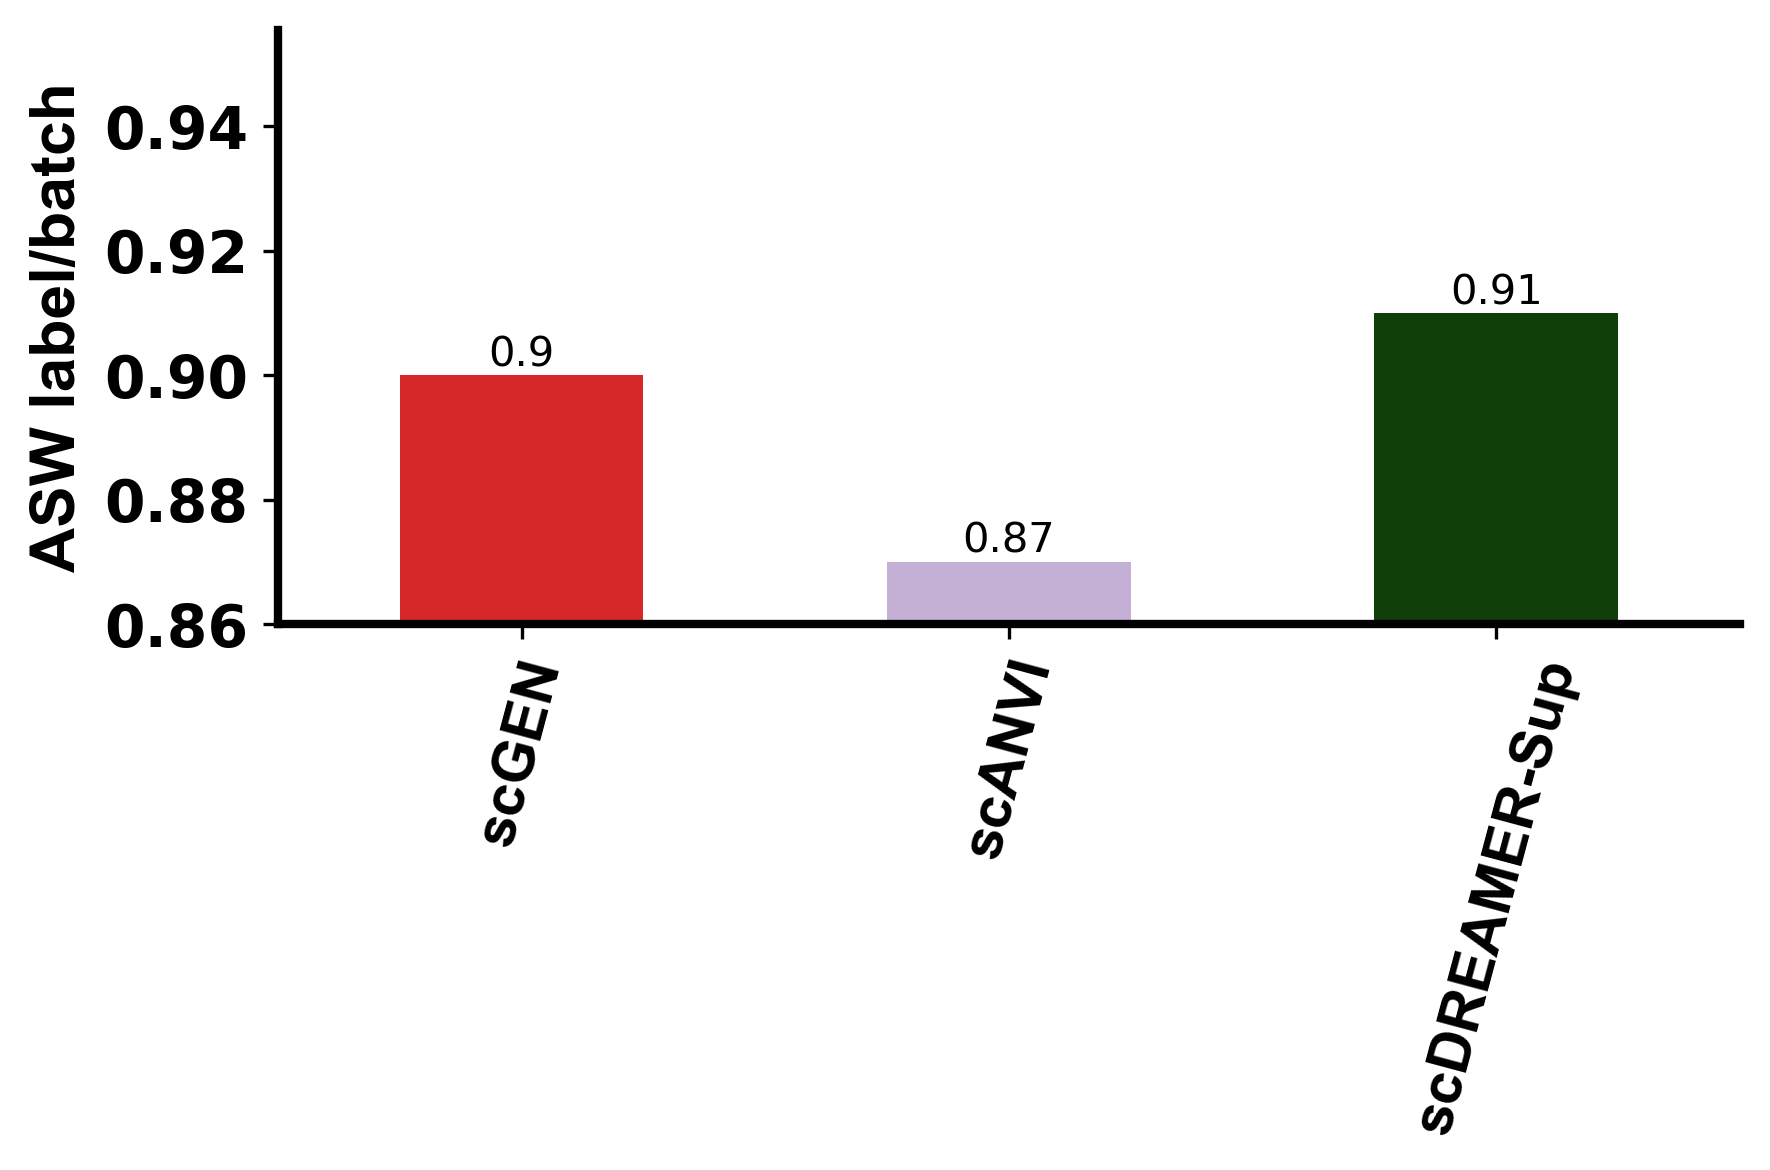

PCR batch Immune_Human


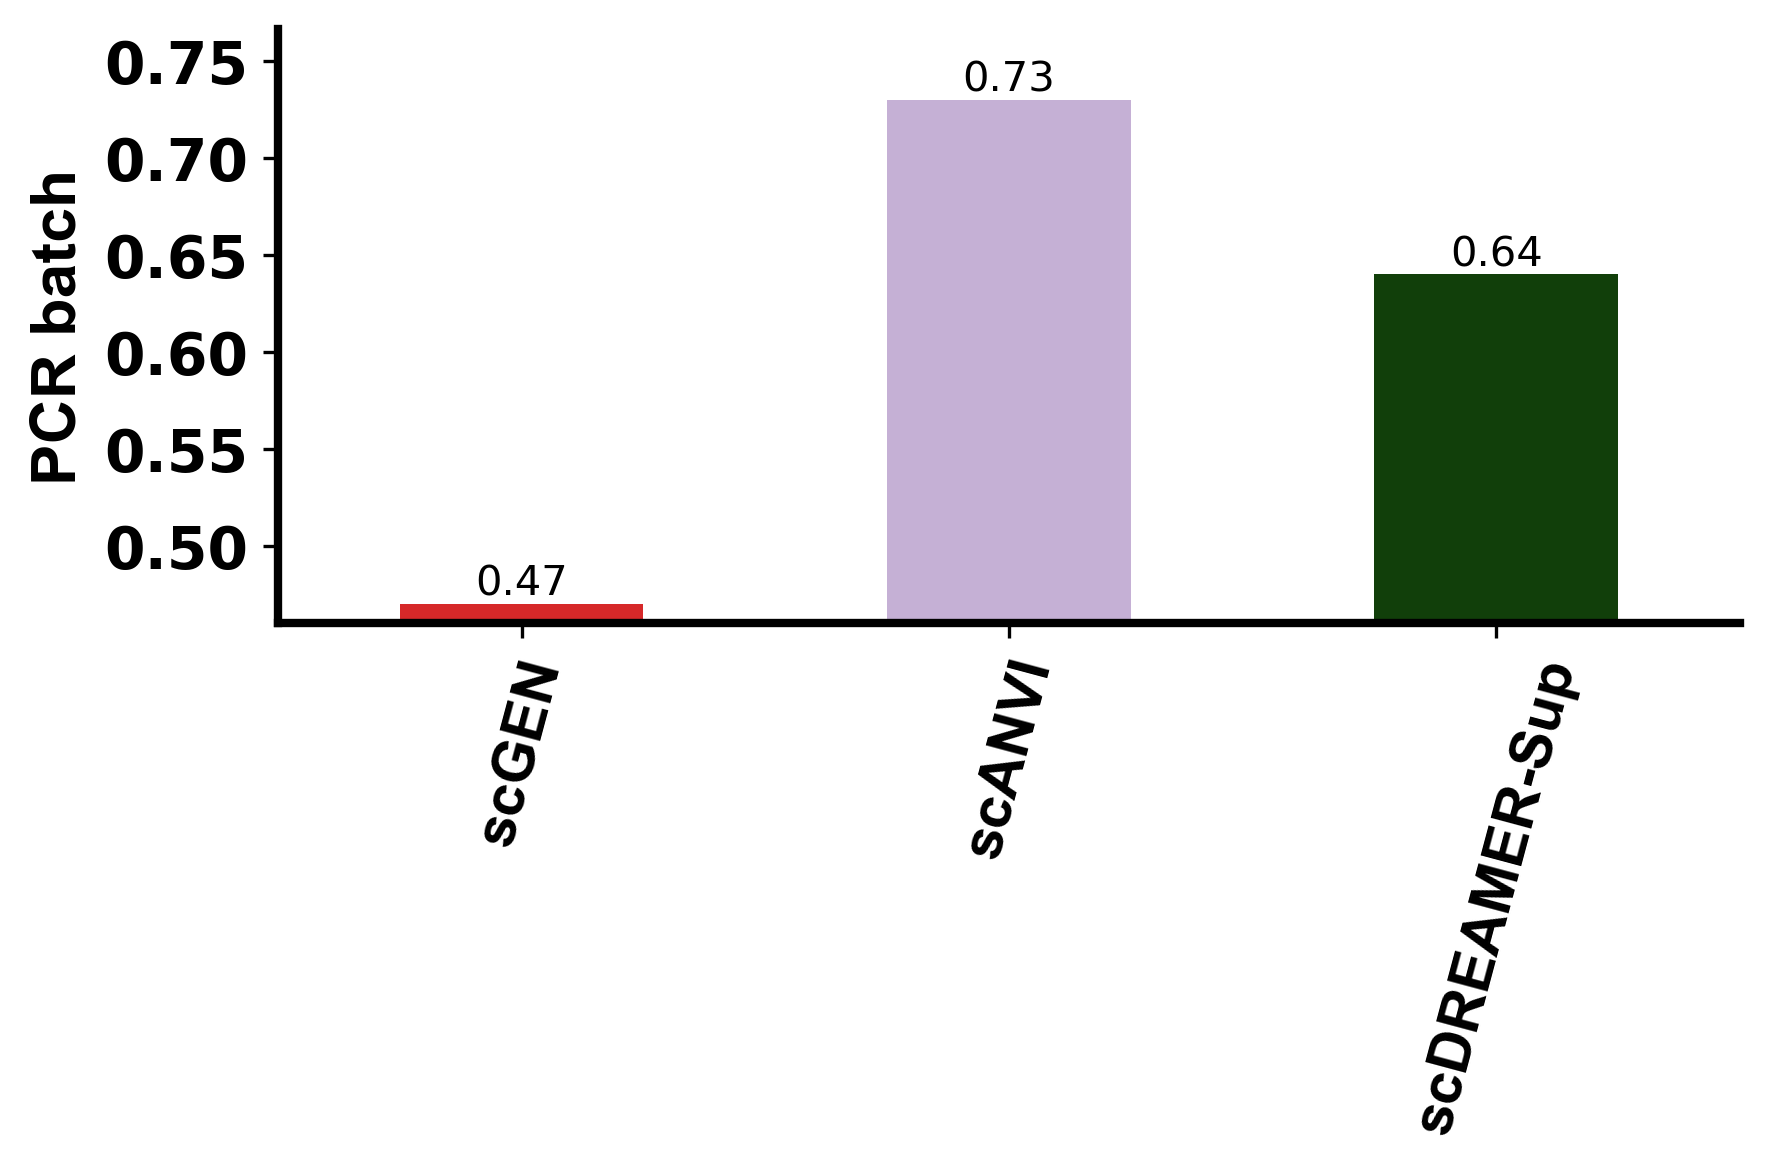

isolated f1 score Immune_Human


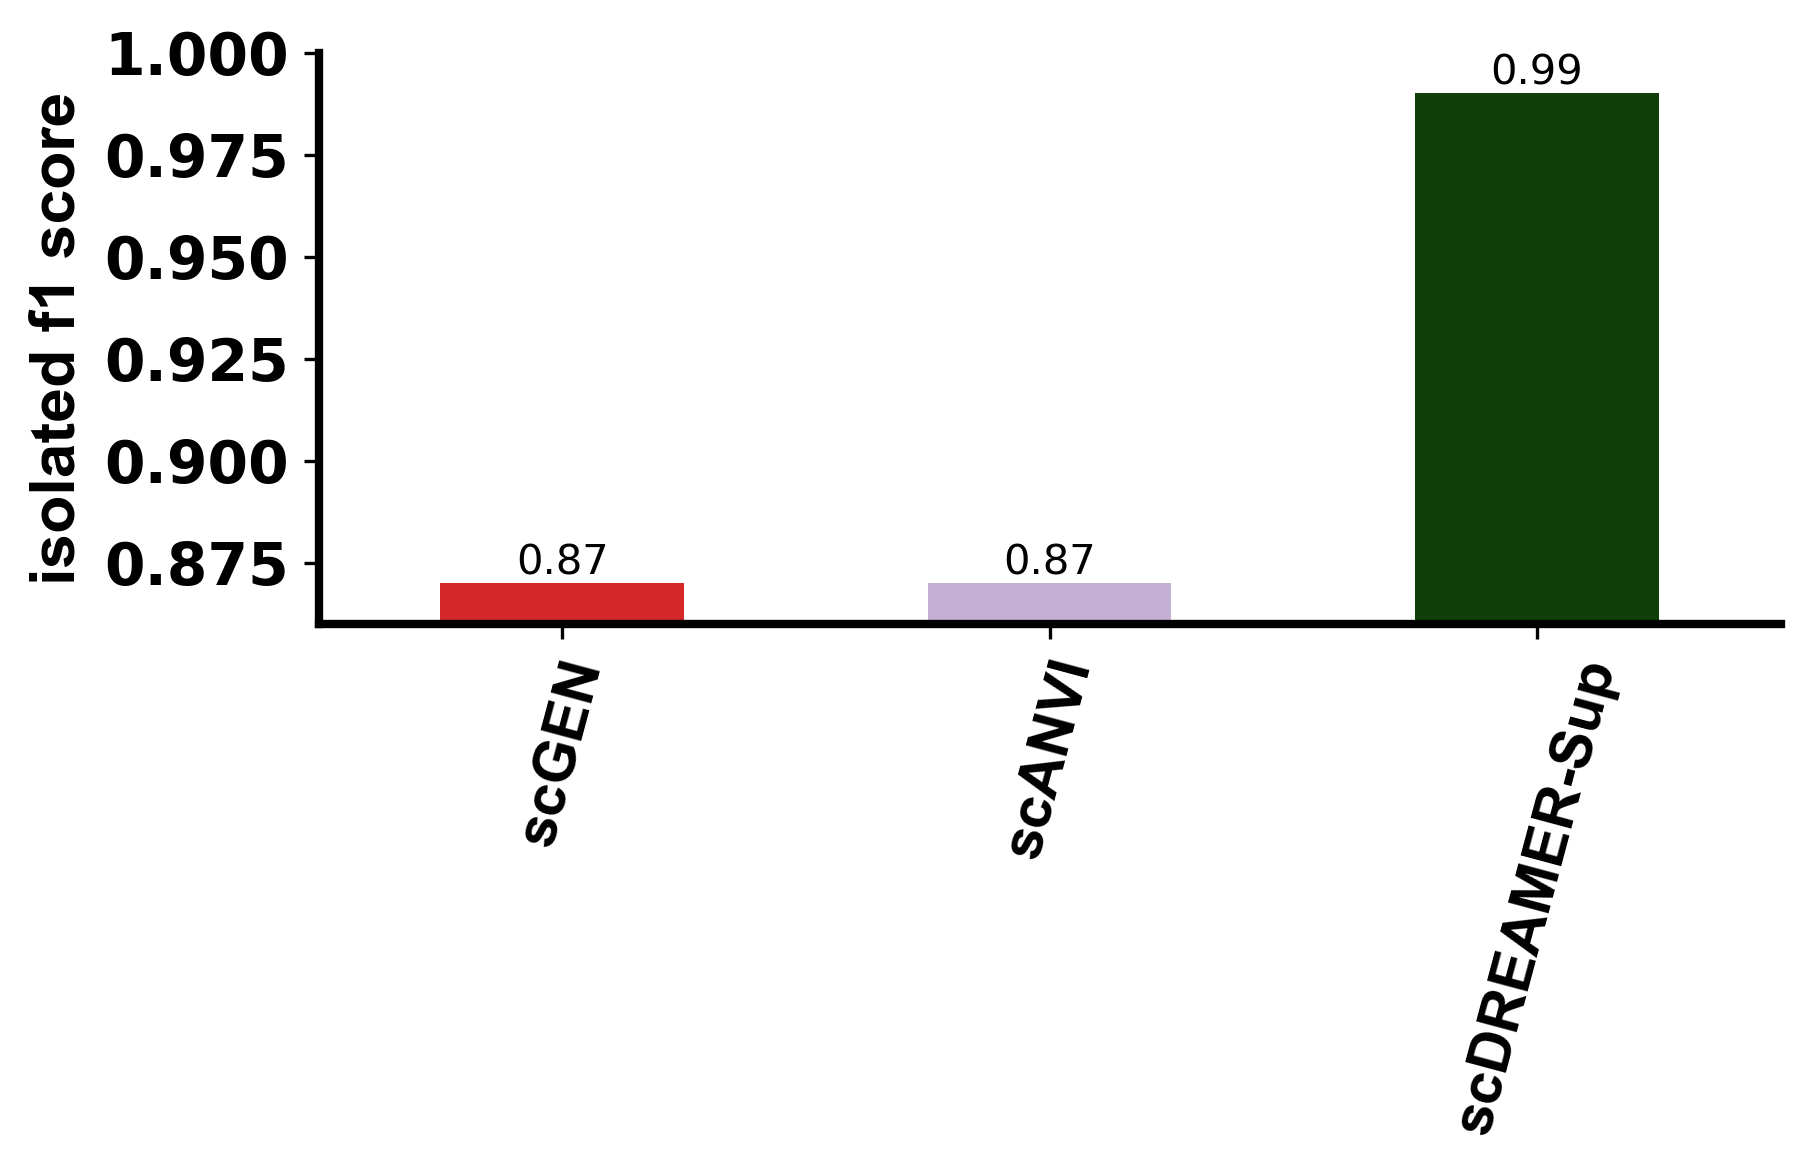

isolated silhouette coefficient Immune_Human


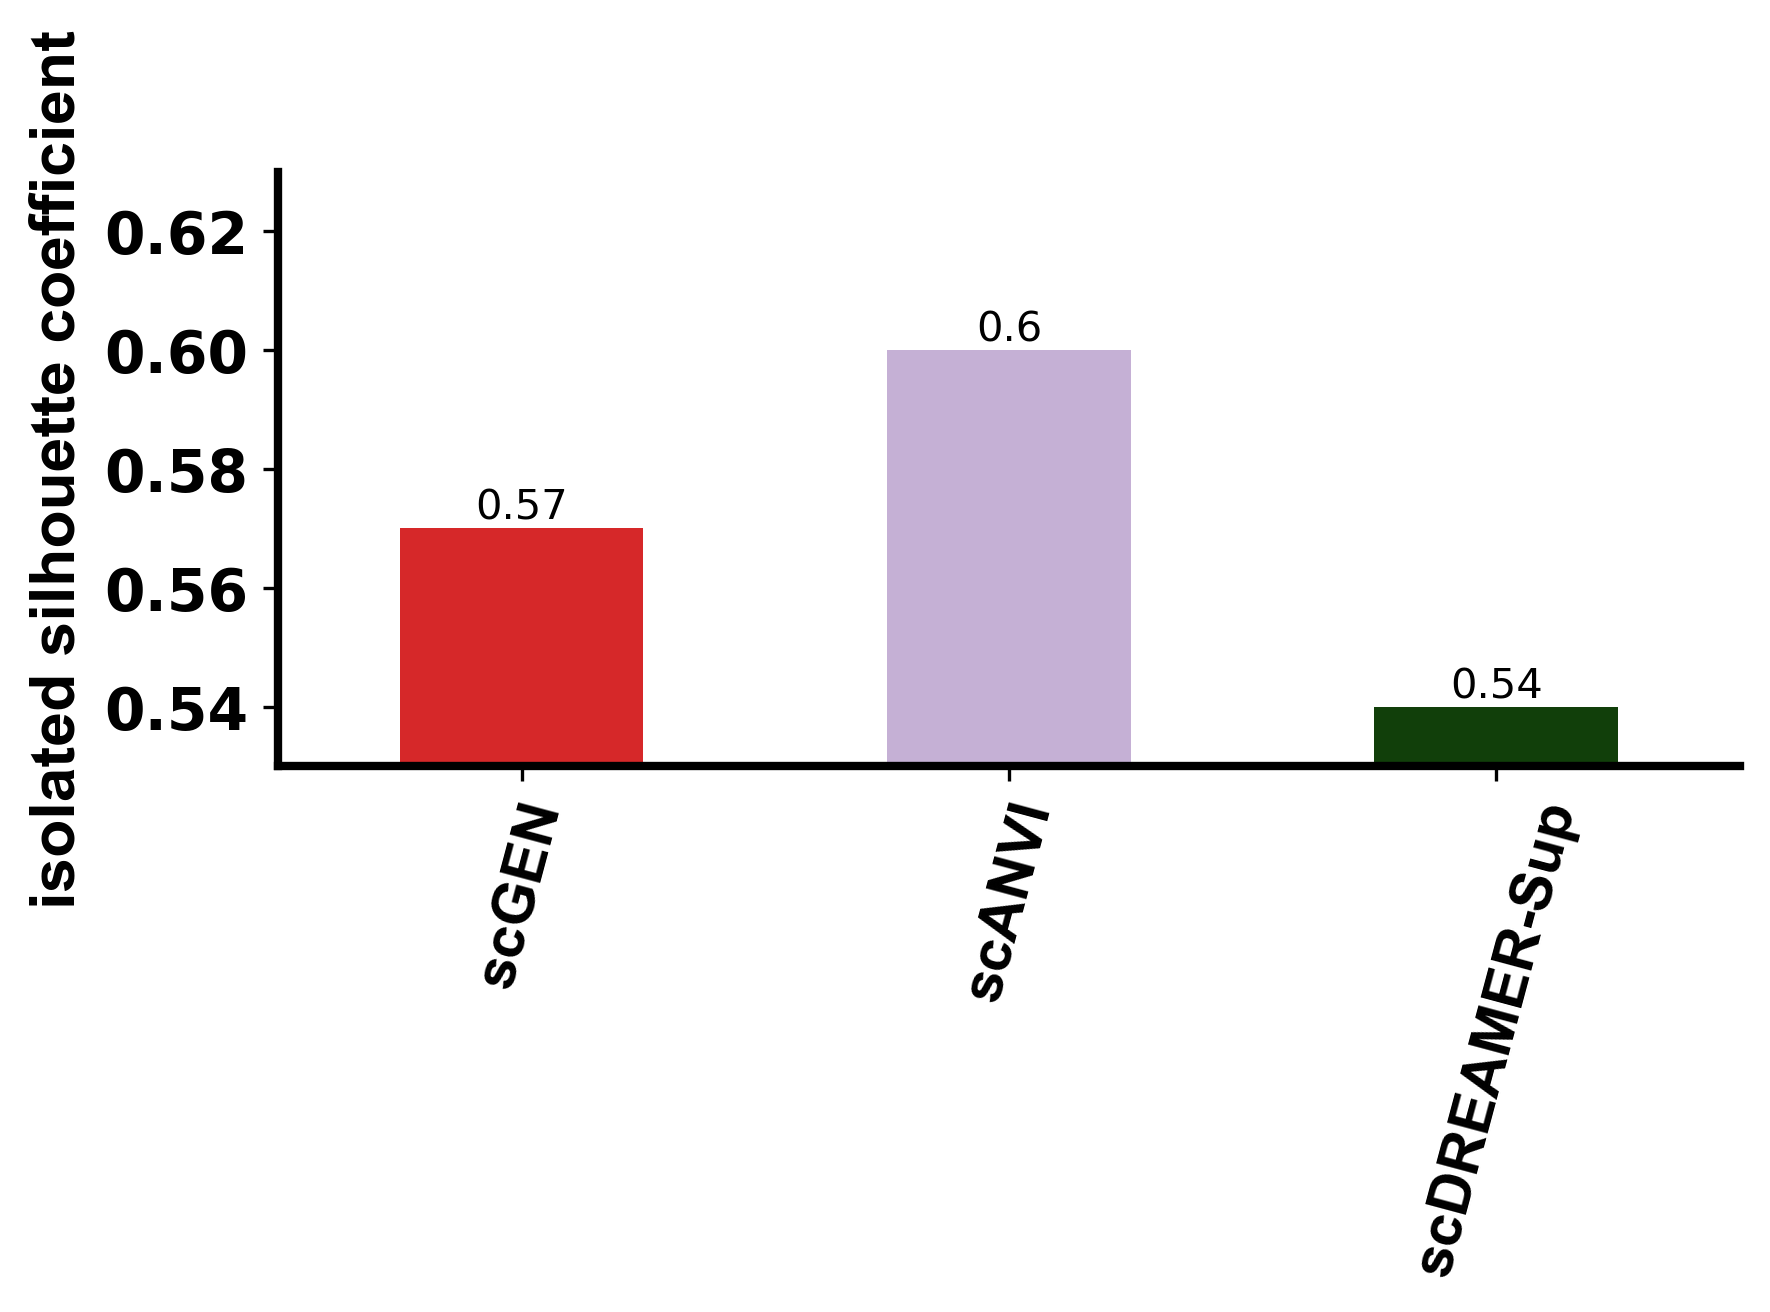

graph connectivity Immune_Human


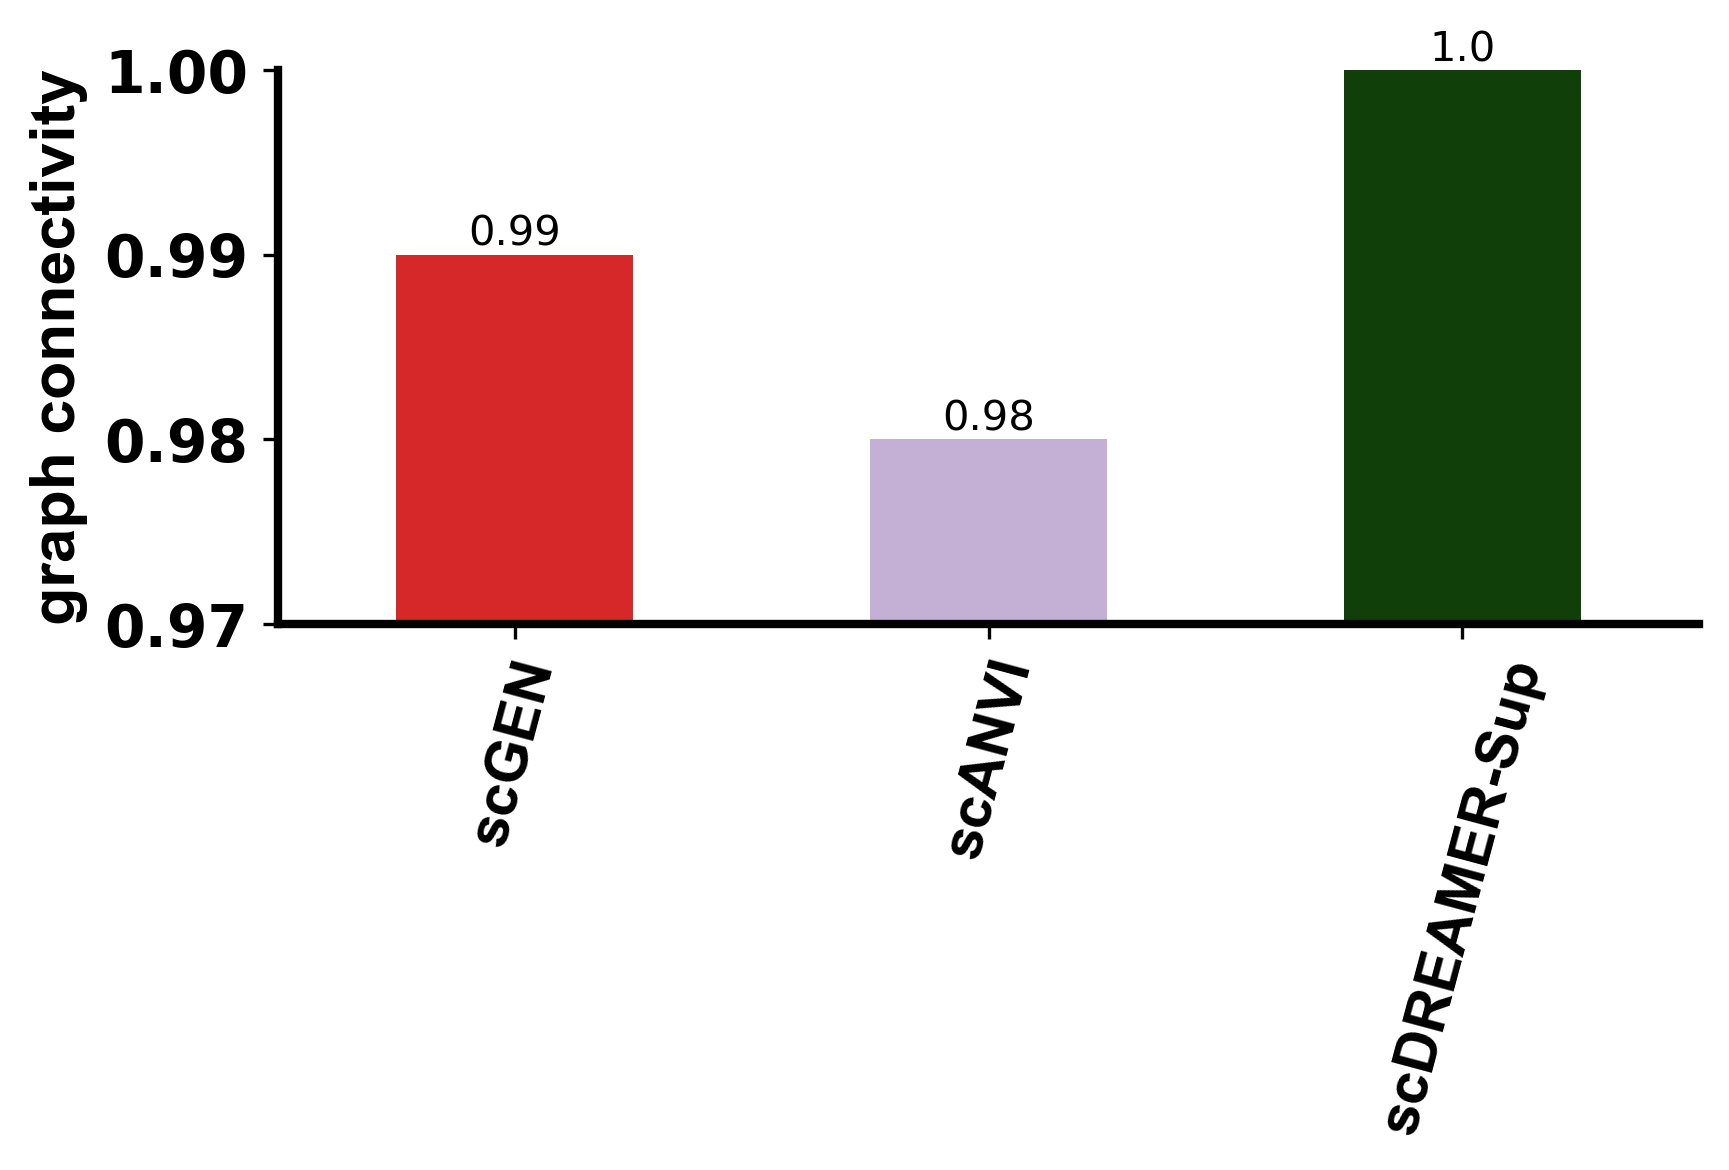

kBET Immune_Human


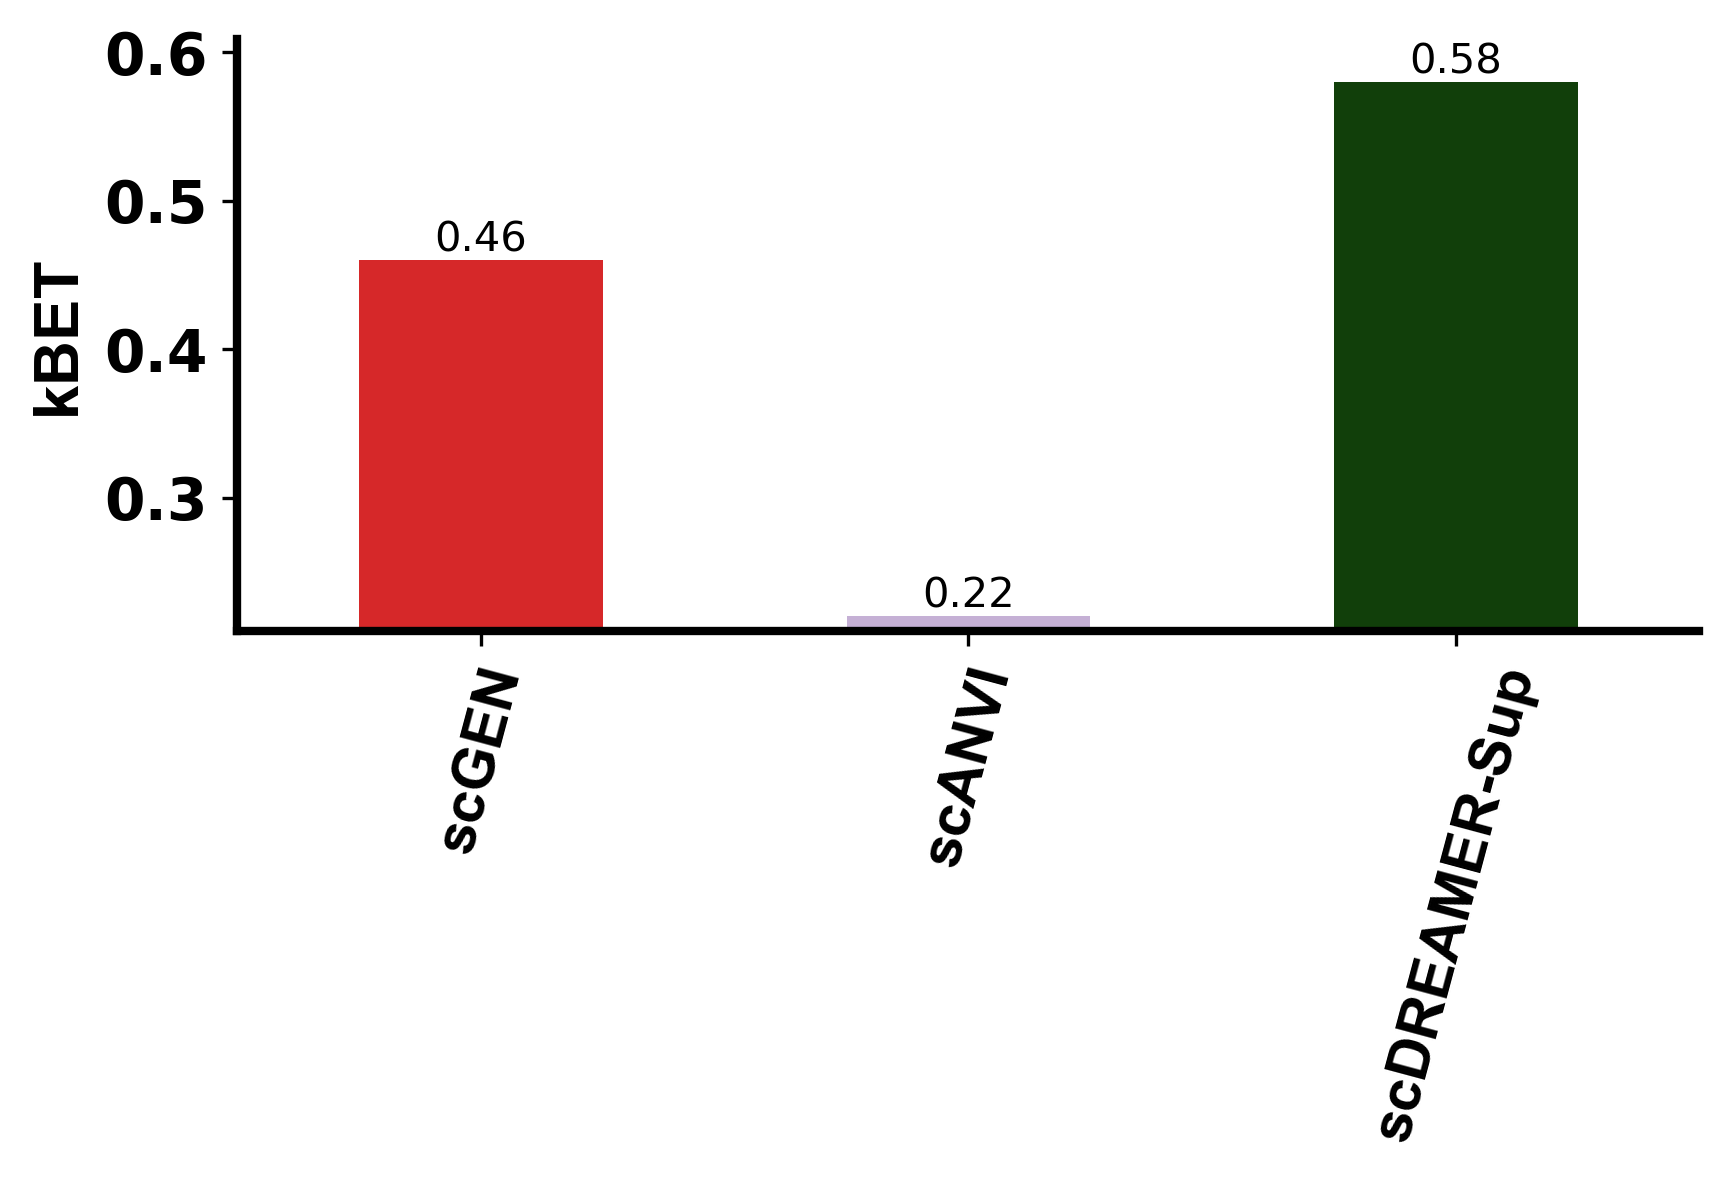

In [9]:
dataset = 'Immune_Human'
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset = df_dataset[df_dataset['Percentage_wrong']==0]
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
df_dataset = df_dataset.loc[methods_to_plot,cloumns_to_plot]
df_dataset = df_dataset.apply(lambda x:x.apply(lambda y:round(y,2)))
df_dataset['color'] = pd.Series(df_dataset.index,index=df_dataset.index).replace(method_color_dct)
display(df_dataset)
for i in df_dataset.columns[:-1]:
    print (i,dataset)
    plot_bar(df_dataset, i,save_folder = save_folder+dataset)

NMI cluster/label  ARI cluster/label  ASW label  \
Method                                                           
scGEN                       0.98               0.99       0.65   
scANVI                      0.98               0.99       0.73   
scDREAMER-Sup               1.00               1.00       0.66   

               ASW label/batch  PCR batch  isolated f1 score  \
Method                                                         
scGEN                     0.89       0.70               0.95   
scANVI                    0.88       0.80               0.86   
scDREAMER-Sup             0.86       0.78               0.98   

               isolated silhouette coefficient  graph connectivity  kBET  \
Method                                                                     
scGEN                                     0.49                1.00  0.75   
scANVI                                    0.52                0.99  0.76   
scDREAMER-Sup                             0.54                1.00  0.91   

                 color  
Method                  
scGEN          #d62829  
scANVI         #c5b0d5  
scDREAMER-Sup  #113f0a

NMI cluster/label Human_Retina


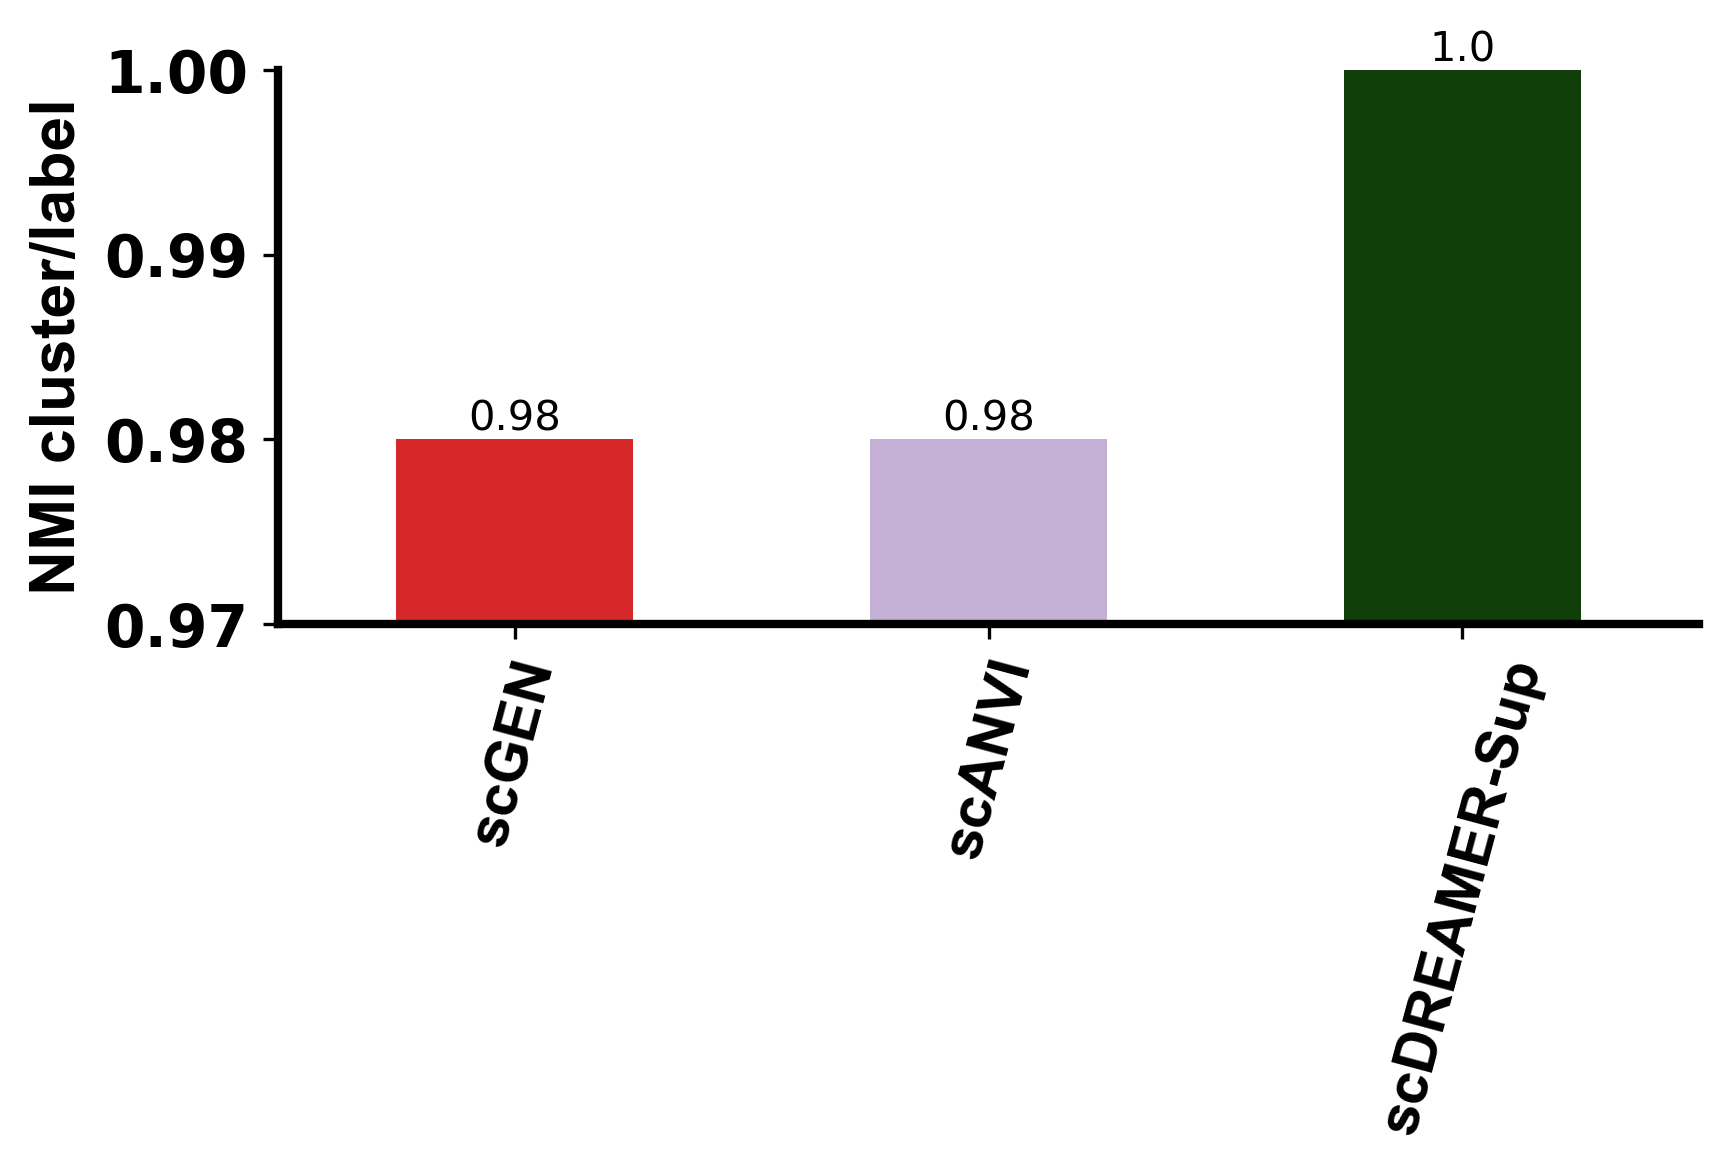

ARI cluster/label Human_Retina


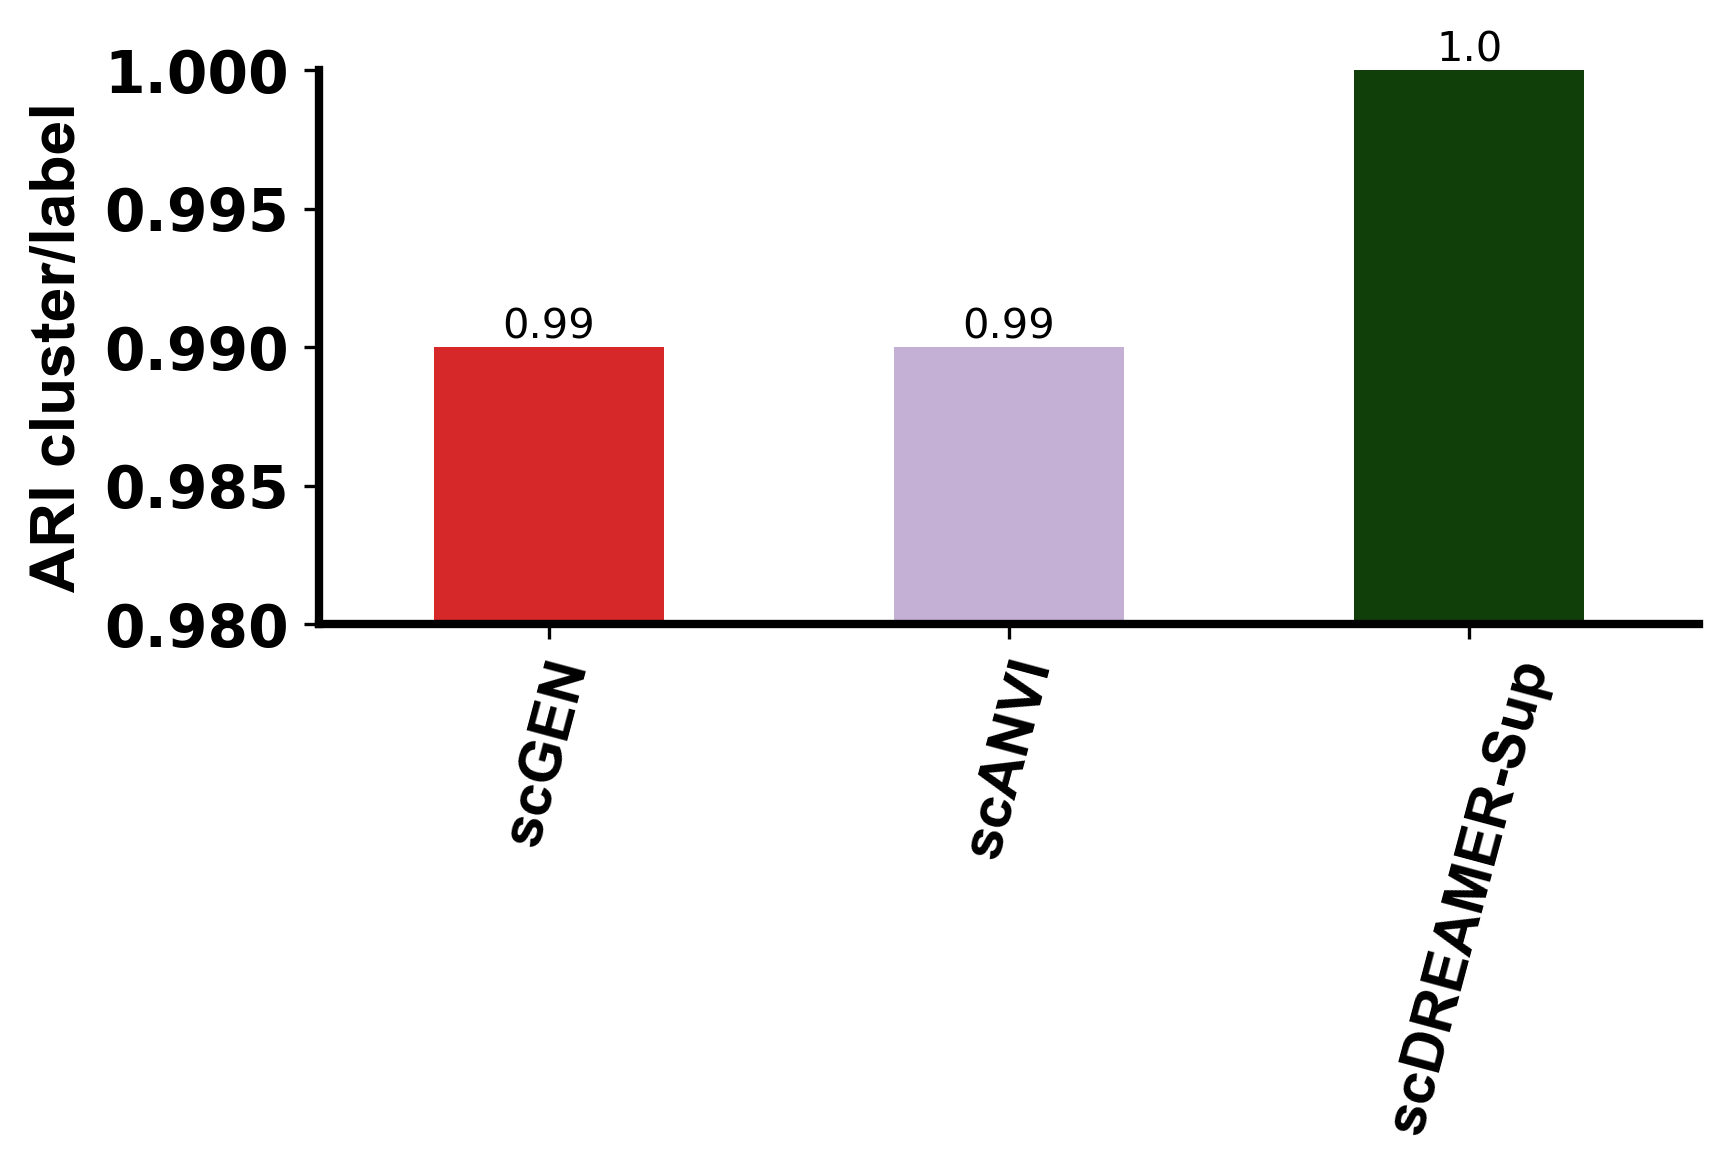

ASW label Human_Retina


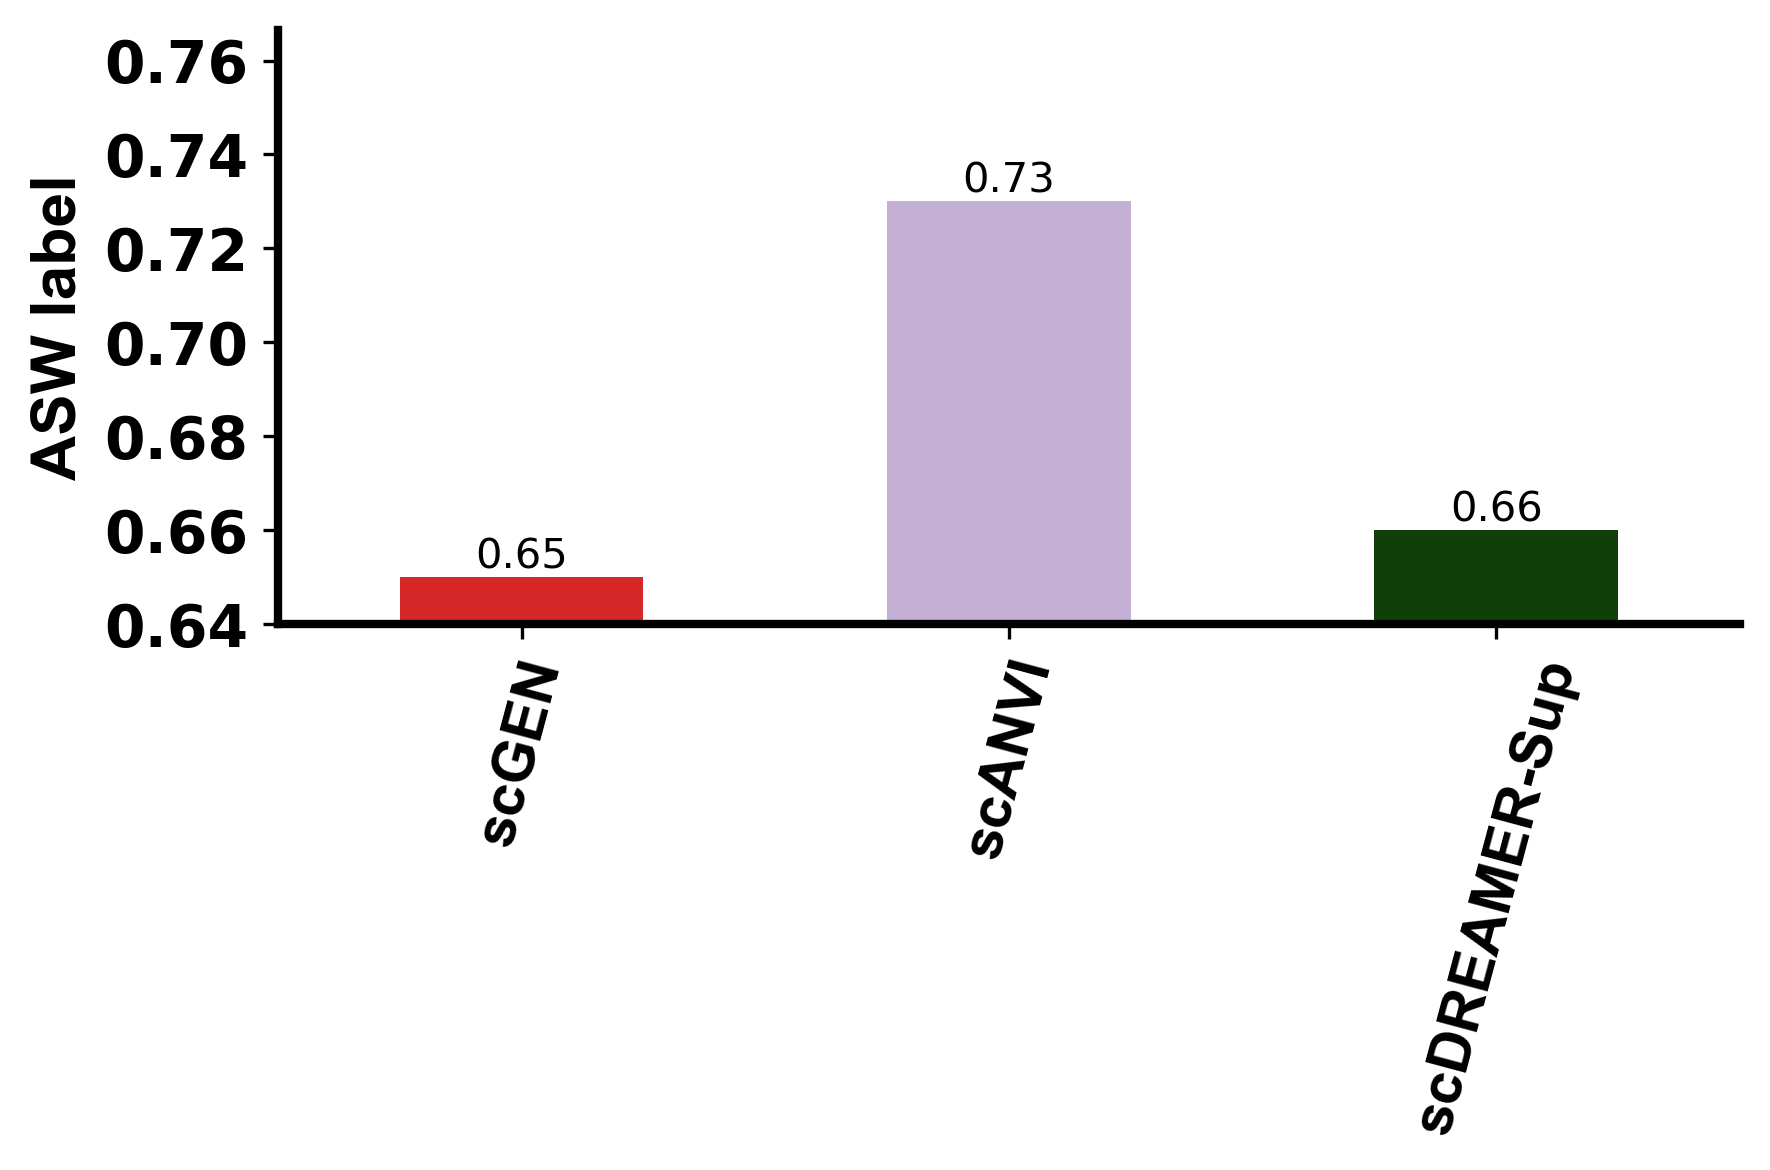

ASW label/batch Human_Retina


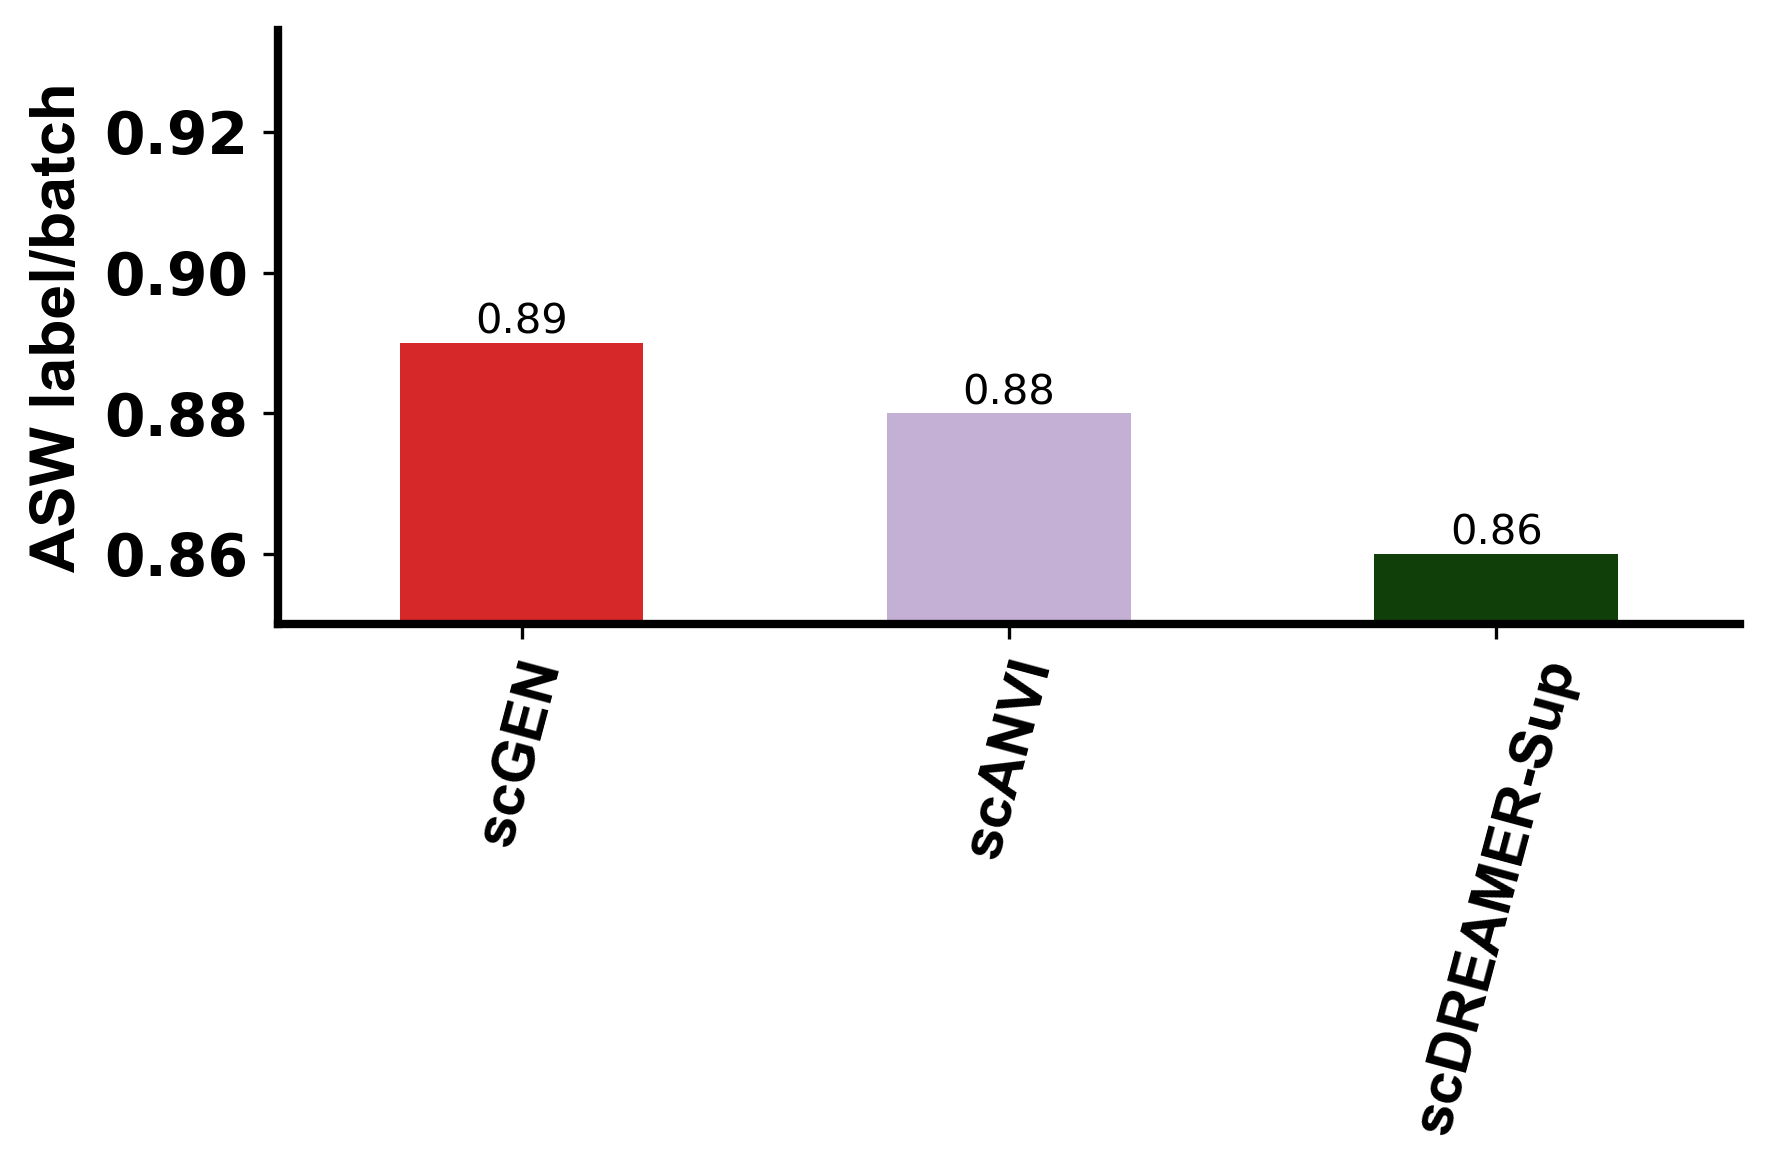

PCR batch Human_Retina


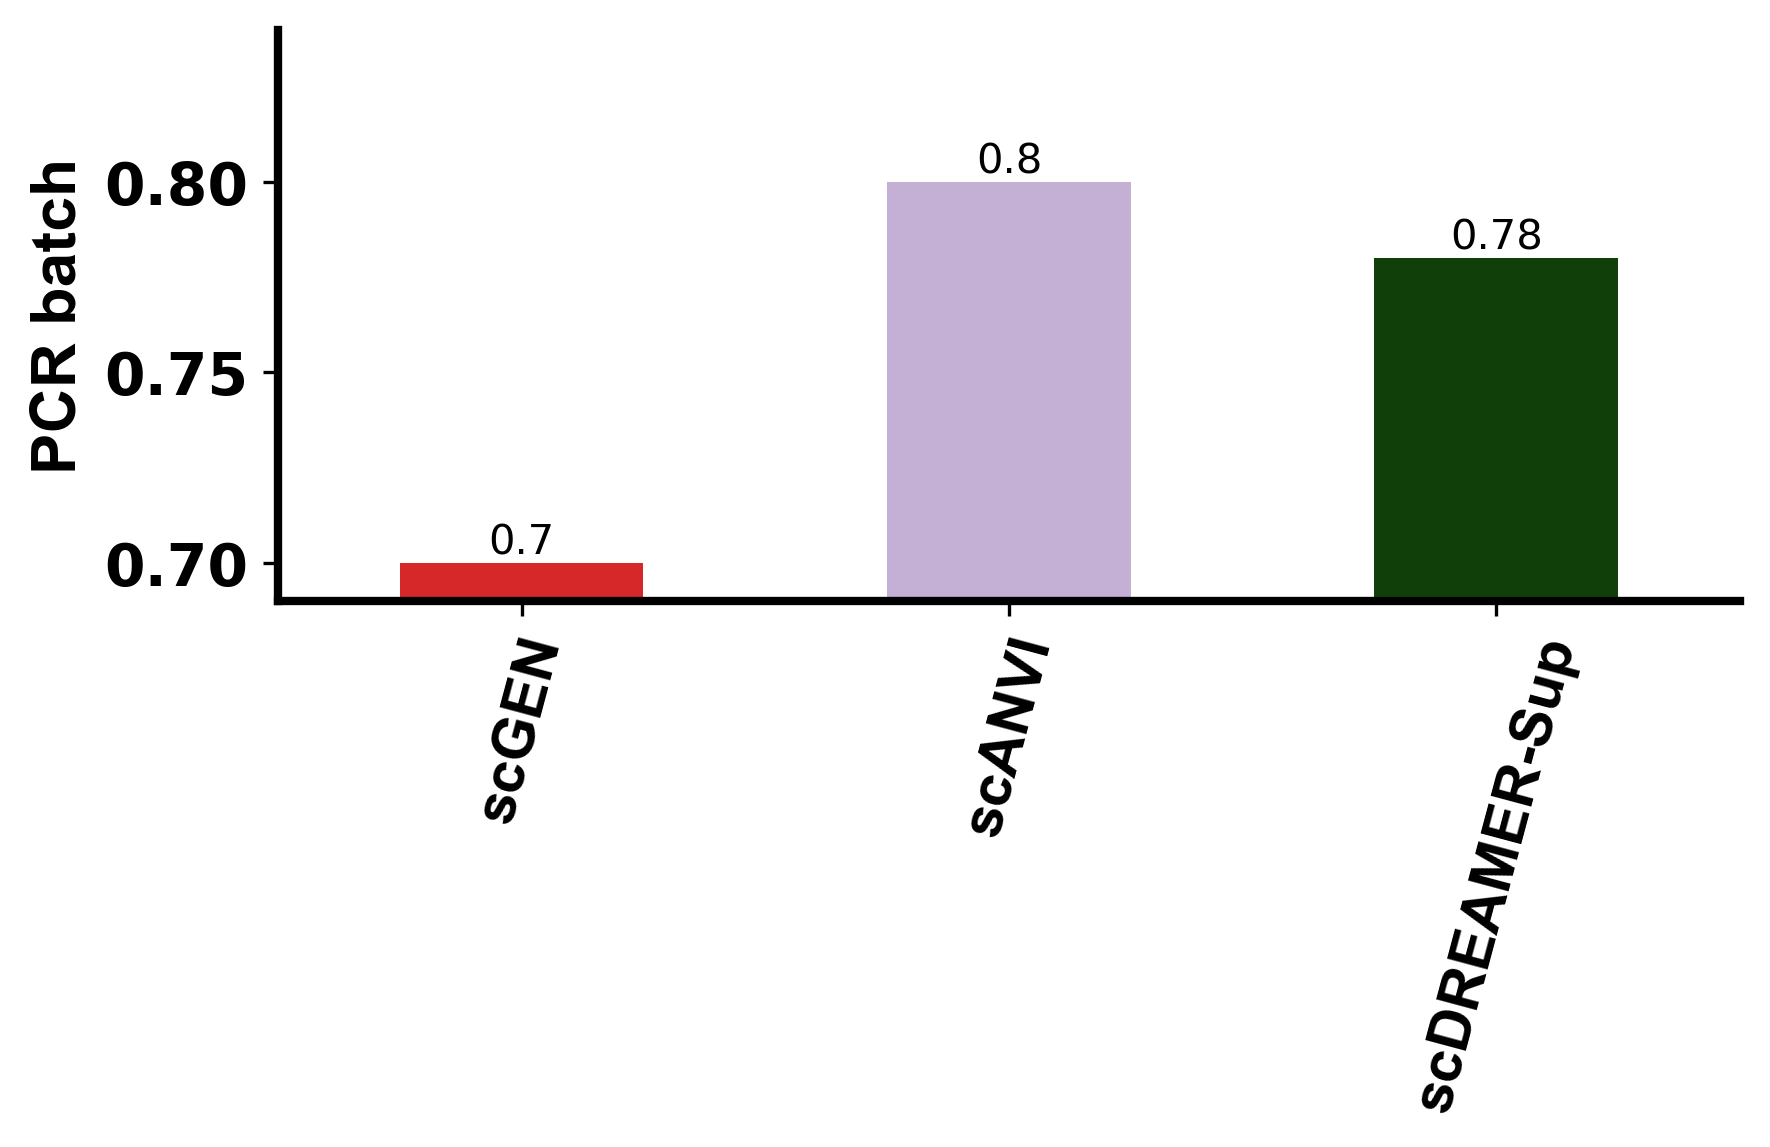

isolated f1 score Human_Retina


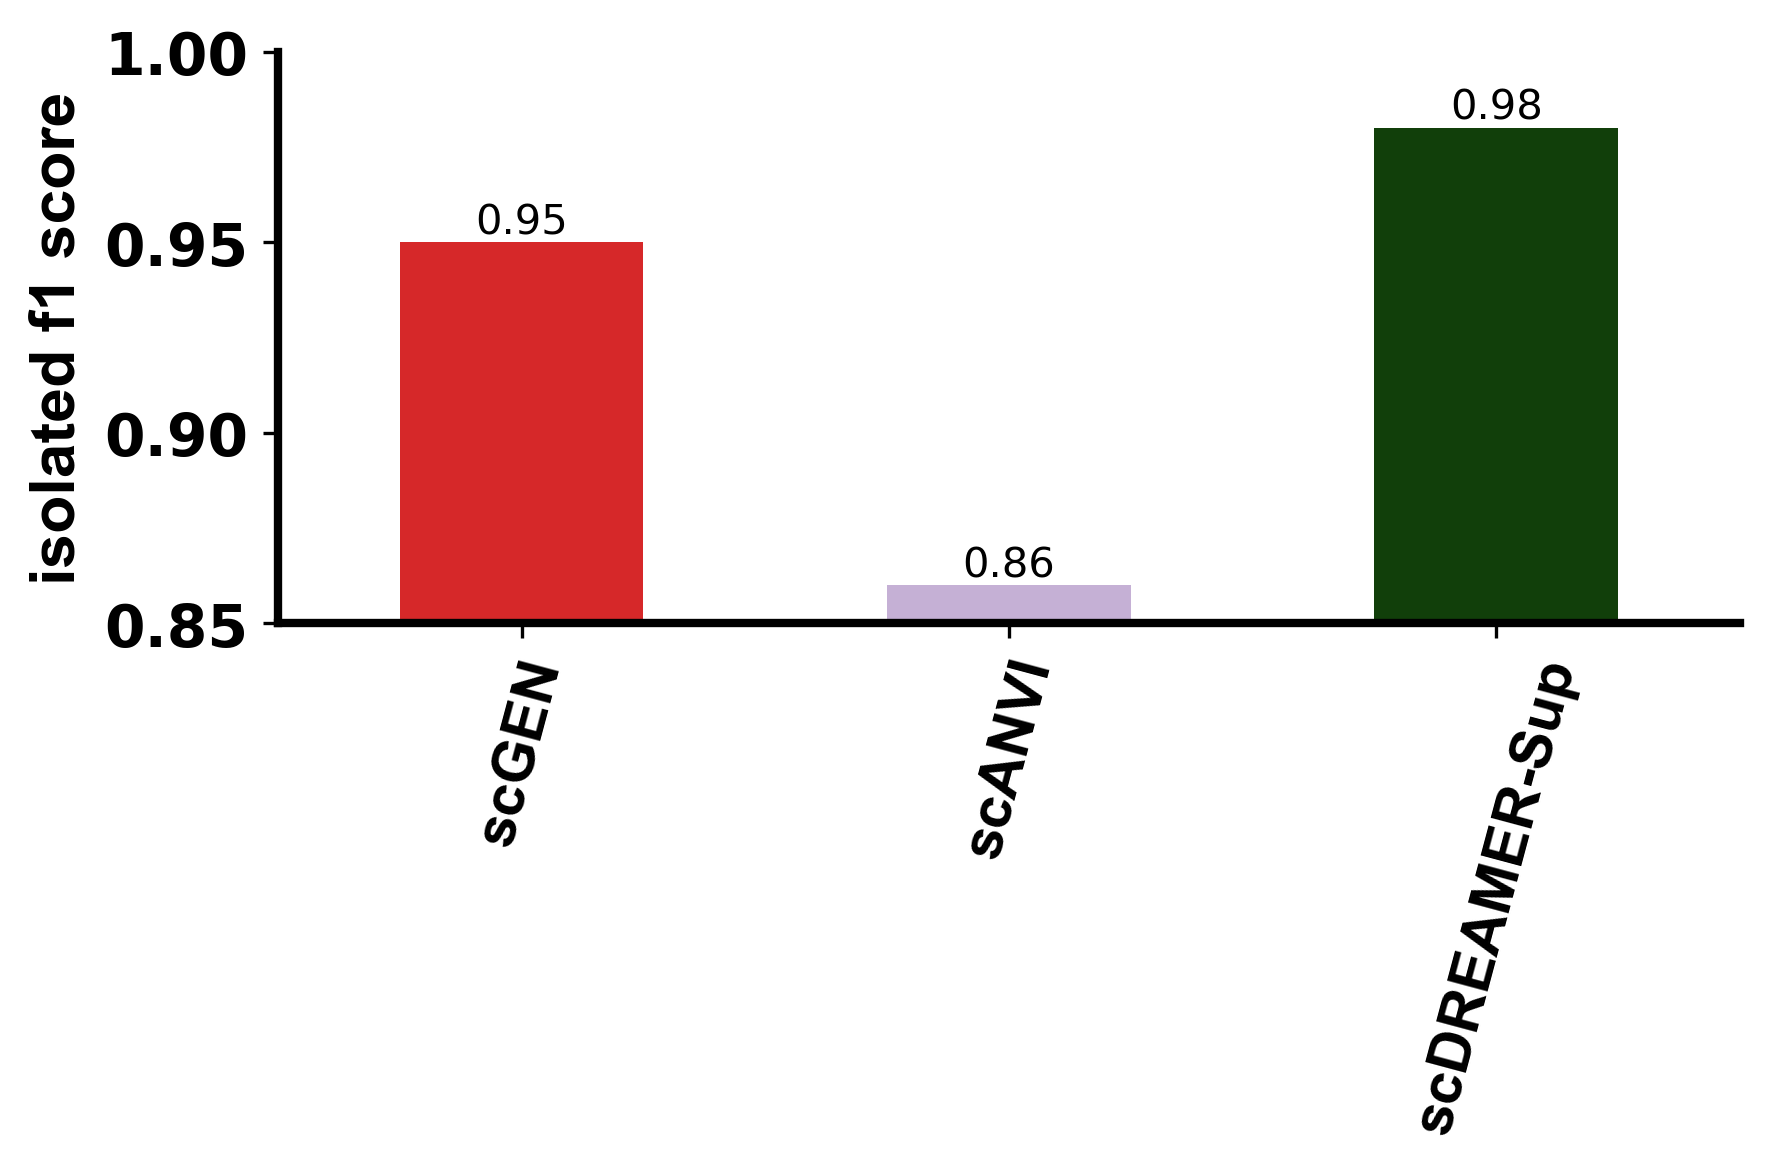

isolated silhouette coefficient Human_Retina


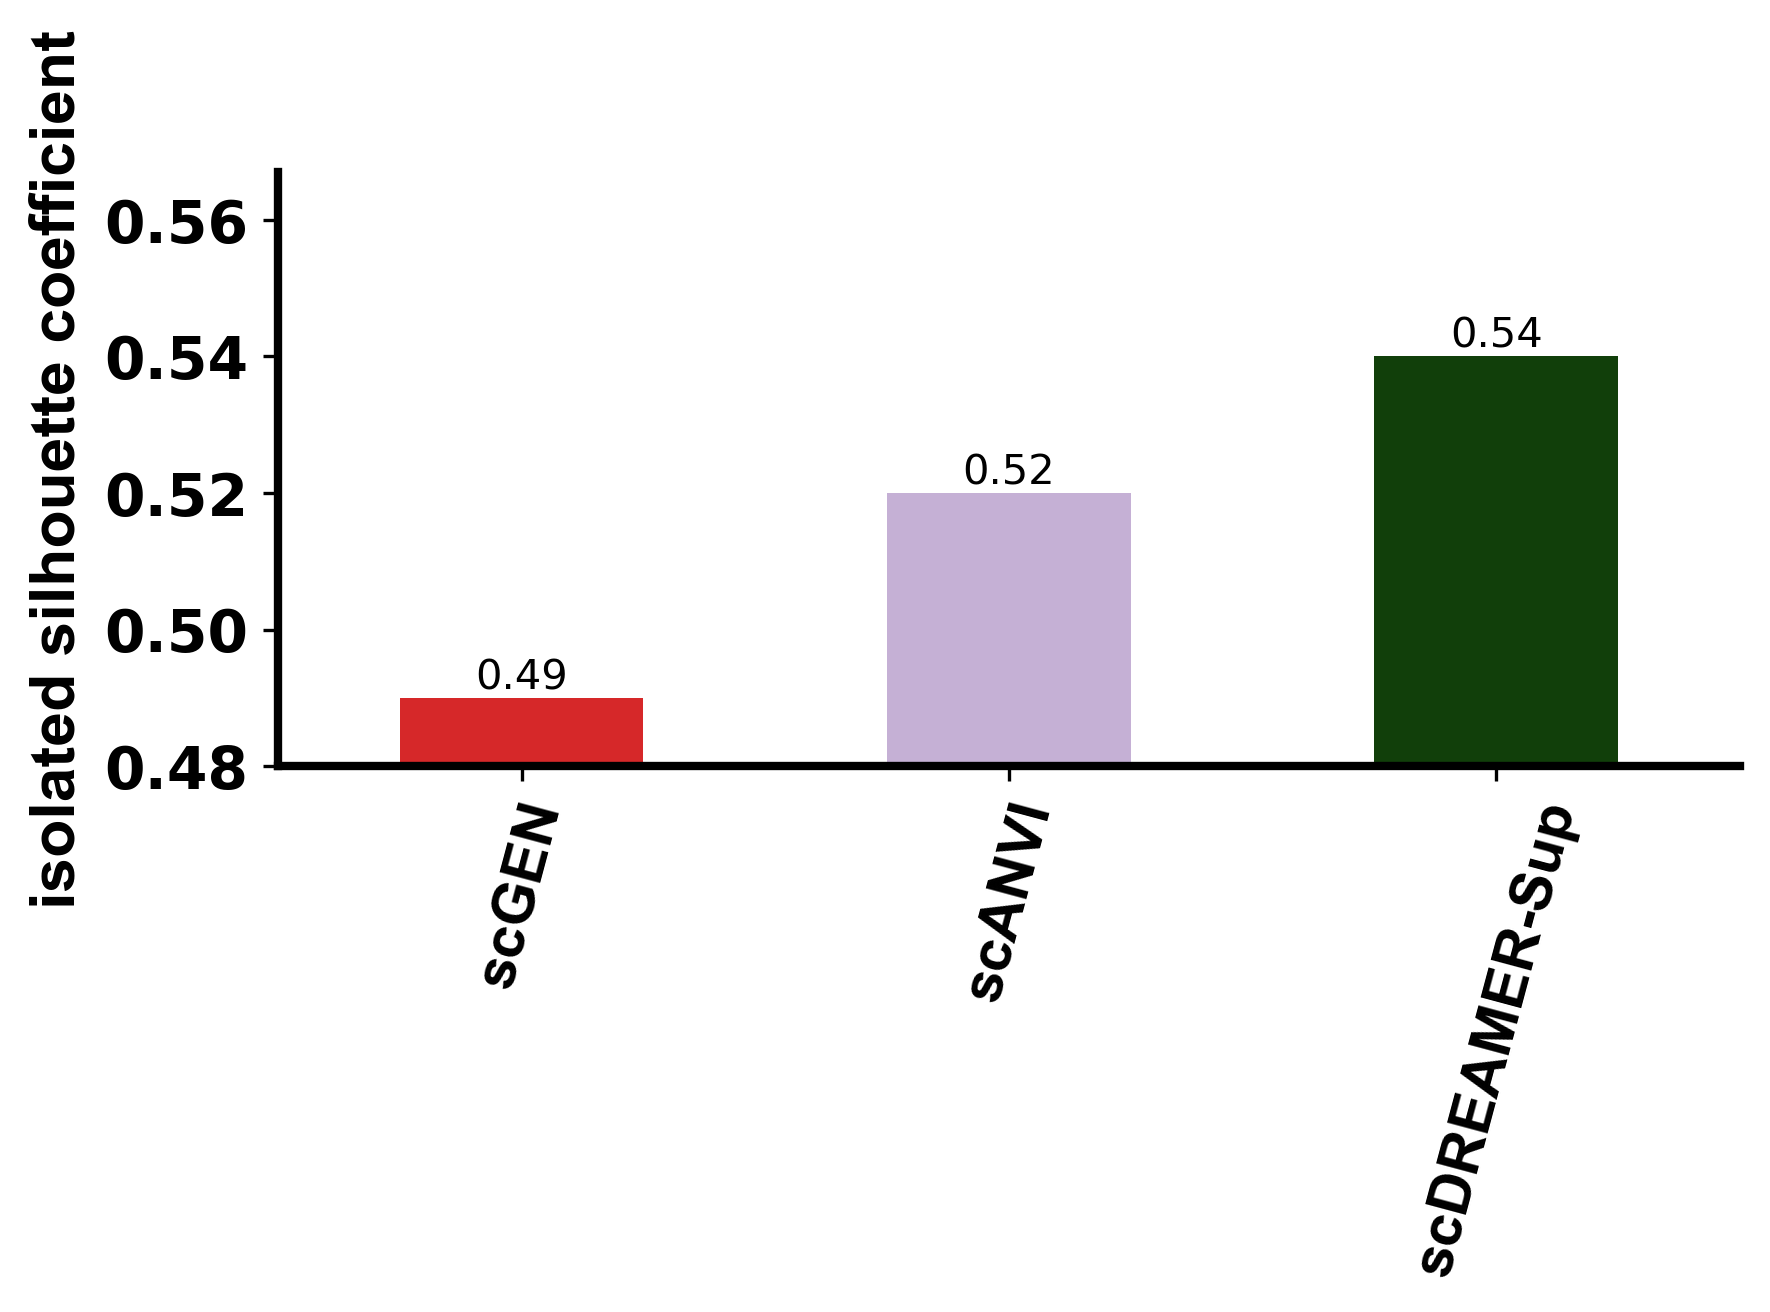

graph connectivity Human_Retina


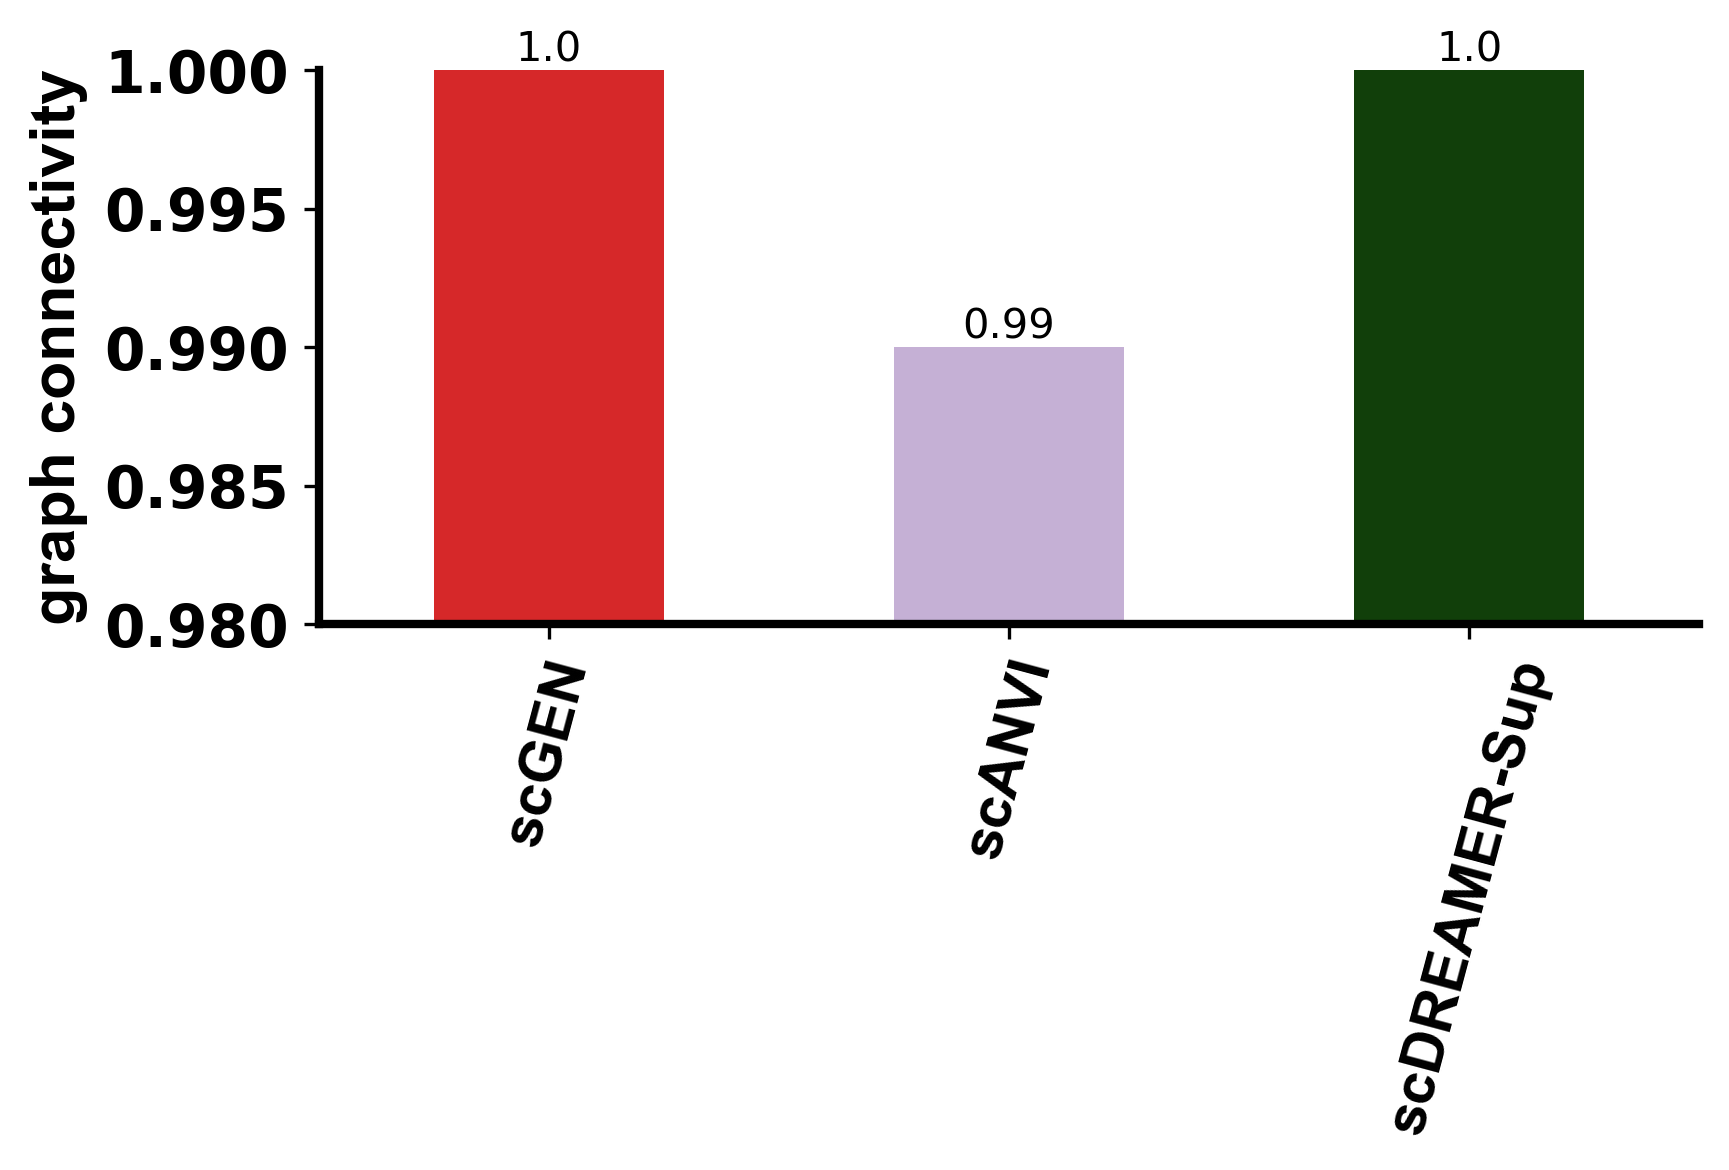

kBET Human_Retina


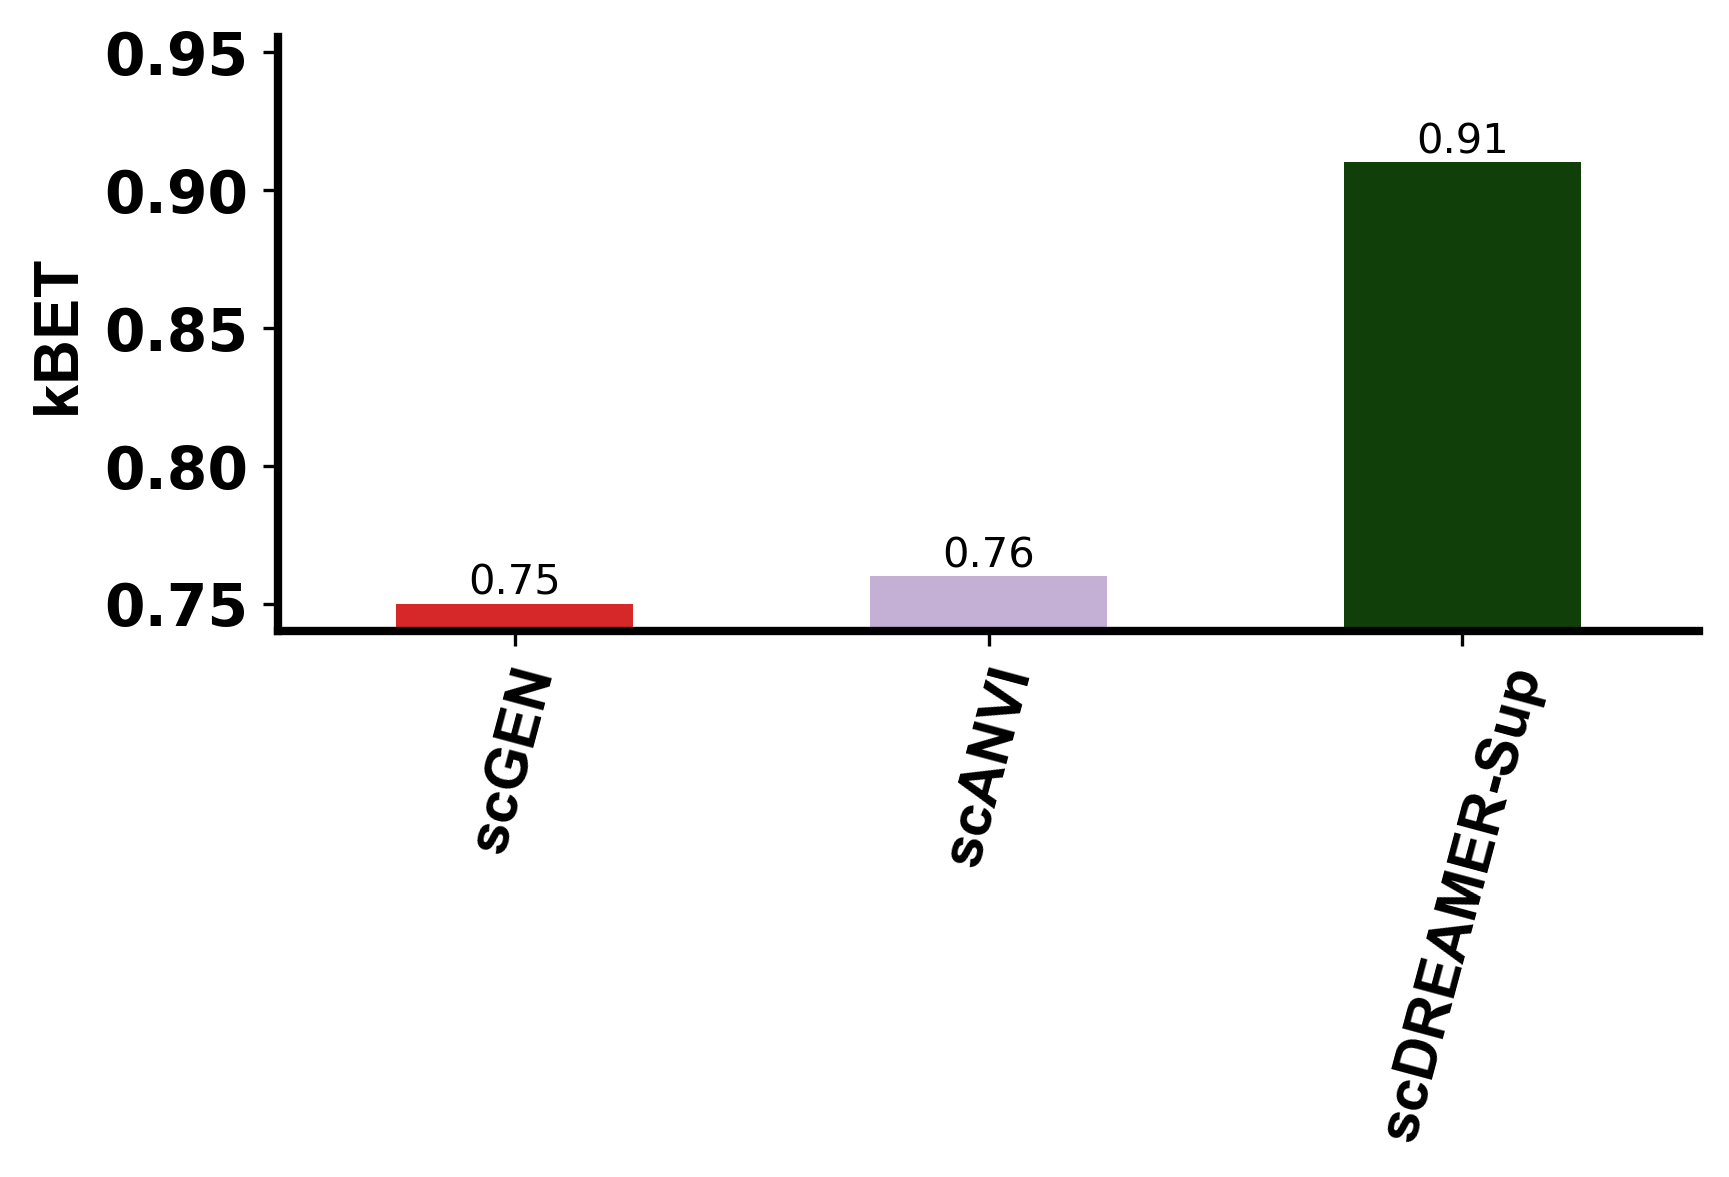

In [10]:
dataset = 'Human_Retina'
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset = df_dataset[df_dataset['Percentage_wrong']==0]
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
df_dataset = df_dataset.loc[methods_to_plot,cloumns_to_plot]
df_dataset = df_dataset.apply(lambda x:x.apply(lambda y:round(y,2)))
df_dataset['color'] = pd.Series(df_dataset.index,index=df_dataset.index).replace(method_color_dct)
display(df_dataset)
for i in df_dataset.columns[:-1]:
    print (i,dataset)
    plot_bar(df_dataset, i,save_folder = save_folder+dataset)

In [11]:
dataset = 'Human_Mouse'
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset = df_dataset[df_dataset['Percentage_wrong']==0]
df_dataset.drop(['Dataset','Method'], inplace=True, axis=1)
methods_to_plot_hm = methods_to_plot.copy()
cloumns_to_plot_hm = cloumns_to_plot.copy()

# methods_to_plot_hm.remove('Seurat')
cloumns_to_plot_hm.remove('isolated f1 score')
cloumns_to_plot_hm.remove("isolated silhouette coefficient")
df_dataset = df_dataset.loc[methods_to_plot_hm,cloumns_to_plot_hm]
df_dataset = df_dataset.apply(lambda x:x.apply(lambda y:round(y,2)))
df_dataset['color'] = pd.Series(df_dataset.index,index=df_dataset.index).replace(method_color_dct)
display(df_dataset)
for i in df_dataset.columns[:-1]:
    print (i,dataset)
    plot_bar(df_dataset, i,save_folder = save_folder+dataset)

KeyError: "None of [Index(['scGEN', 'scANVI', 'scDREAMER-Sup'], dtype='object', name='Method')] are in the [index]"

# multi bar 

In [7]:
def plot_bar_multi(df,col,method_color_dct,save_folder=None):
    ax = sns.barplot(x='Percentage_wrong', y=col, hue='Method', data=df,palette=method_color_dct)#, ax=ax1)
    plt.xticks(rotation=90)
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'family':"Arial",'weight':'bold','size':14})
    ax.get_legend().remove()

    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(14)
        tick.label1.set_fontweight('bold')
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(14)
        tick.label1.set_fontweight('bold')
    ax.set_ylabel(col,fontsize = 15, fontname='Arial', fontweight = 'bold')
    ax.set_xlabel('Percentage of missing cell type labels',fontsize = 15, fontname='Arial', fontweight = 'bold')
    rects = ax.patches
    for rect in rects:
        height = rect.get_height()
        ax.text(
        rect.get_x() + rect.get_width() / 2, height, round(height,2), ha="center", va="bottom"
            )
    ax. spines['top']. set_visible(False)
    ax. spines['right']. set_visible(False)
    if save_folder:
        if not os.path.exists(save_folder):
            os.makedirs(save_folder)
        file_path_to_save = save_folder+'/'+col.replace('/','_')+'.png'
        print('saving file at:',file_path_to_save)
        plt.savefig(file_path_to_save, transparent=True, bbox_inches='tight')
    plt.show()

Method  NMI cluster/label  ARI cluster/label  ASW label  \
Method                                                                          
scGEN                  scGEN               0.96               0.96       0.70   
scGEN                  scGEN               0.87               0.86       0.67   
scGEN                  scGEN               0.83               0.80       0.64   
scGEN                  scGEN               0.73               0.65       0.59   
scANVI                scANVI               0.87               0.77       0.64   
scANVI                scANVI               0.86               0.77       0.64   
scANVI                scANVI               0.87               0.77       0.64   
scANVI                scANVI               0.84               0.76       0.63   
scDREAMER-Sup  scDREAMER-Sup               0.99               0.99       0.67   
scDREAMER-Sup  scDREAMER-Sup               0.99               0.99       0.67   
scDREAMER-Sup  scDREAMER-Sup               0.98               0.99       0.65   
scDREAMER-Sup  scDREAMER-Sup               0.98               0.98       0.66   

               ASW label/batch  PCR batch  isolated f1 score  \
Method                                                         
scGEN                     0.79       0.19               0.99   
scGEN                     0.76       0.28               0.94   
scGEN                     0.76       0.36               0.88   
scGEN                     0.80       0.57               0.65   
scANVI                    0.86       0.67               0.94   
scANVI                    0.86       0.65               0.94   
scANVI                    0.86       0.66               0.93   
scANVI                    0.86       0.68               0.92   
scDREAMER-Sup             0.87       0.50               0.99   
scDREAMER-Sup             0.87       0.53               1.00   
scDREAMER-Sup             0.88       0.63               1.00   
scDREAMER-Sup             0.86       0.54               0.99   

               isolated silhouette coefficient  graph connectivity  kBET  \
Method                                                                     
scGEN                                     0.54                0.88  0.48   
scGEN                                     0.54                0.74  0.49   
scGEN                                     0.53                0.74  0.50   
scGEN                                     0.53                0.63  0.44   
scANVI                                    0.57                0.75  0.36   
scANVI                                    0.56                0.63  0.37   
scANVI                                    0.57                0.75  0.37   
scANVI                                    0.56                0.57  0.37   
scDREAMER-Sup                             0.55                1.00  0.62   
scDREAMER-Sup                             0.54                0.94  0.61   
scDREAMER-Sup                             0.55                0.99  0.59   
scDREAMER-Sup                             0.56                1.00  0.62   

               iLISI  cLISI  Percentage_wrong  trajectory  NMI k-means  \
Method                                                                   
scGEN           0.15    1.0                 0         NaN          NaN   
scGEN           0.15    1.0                10         NaN          NaN   
scGEN           0.16    1.0                20         NaN          NaN   
scGEN           0.15    1.0                50         NaN          NaN   
scANVI          0.12    1.0                 0         NaN          NaN   
scANVI          0.12    1.0                10         NaN          NaN   
scANVI          0.12    1.0                20         NaN          NaN   
scANVI          0.13    1.0                50         NaN          NaN   
scDREAMER-Sup   0.18    1.0                 0         NaN          NaN   
scDREAMER-Sup   0.17    1.0                10         NaN          NaN   
scDREAMER-Sup   0.17    1.0          

NMI cluster/label Lung
saving file at: ./Supplimentary/Supervised/Lung_multi/NMI cluster_label.png


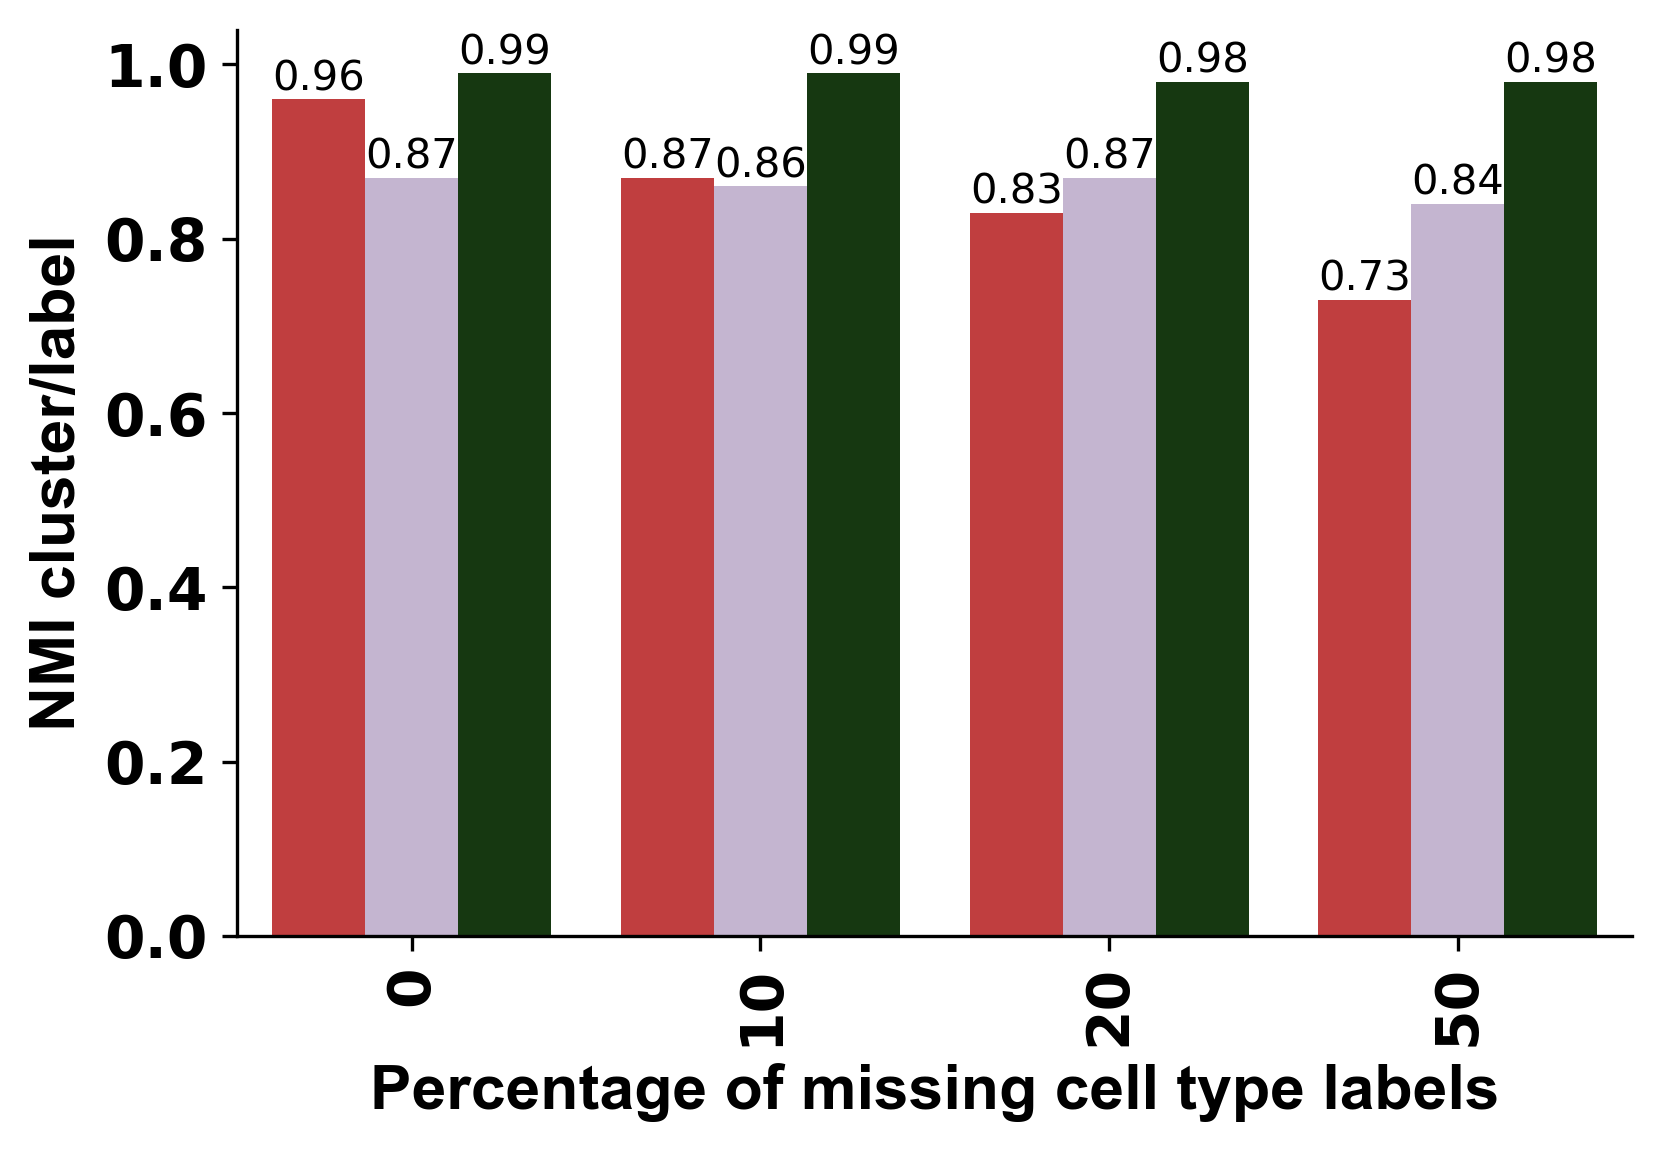

ARI cluster/label Lung
saving file at: ./Supplimentary/Supervised/Lung_multi/ARI cluster_label.png


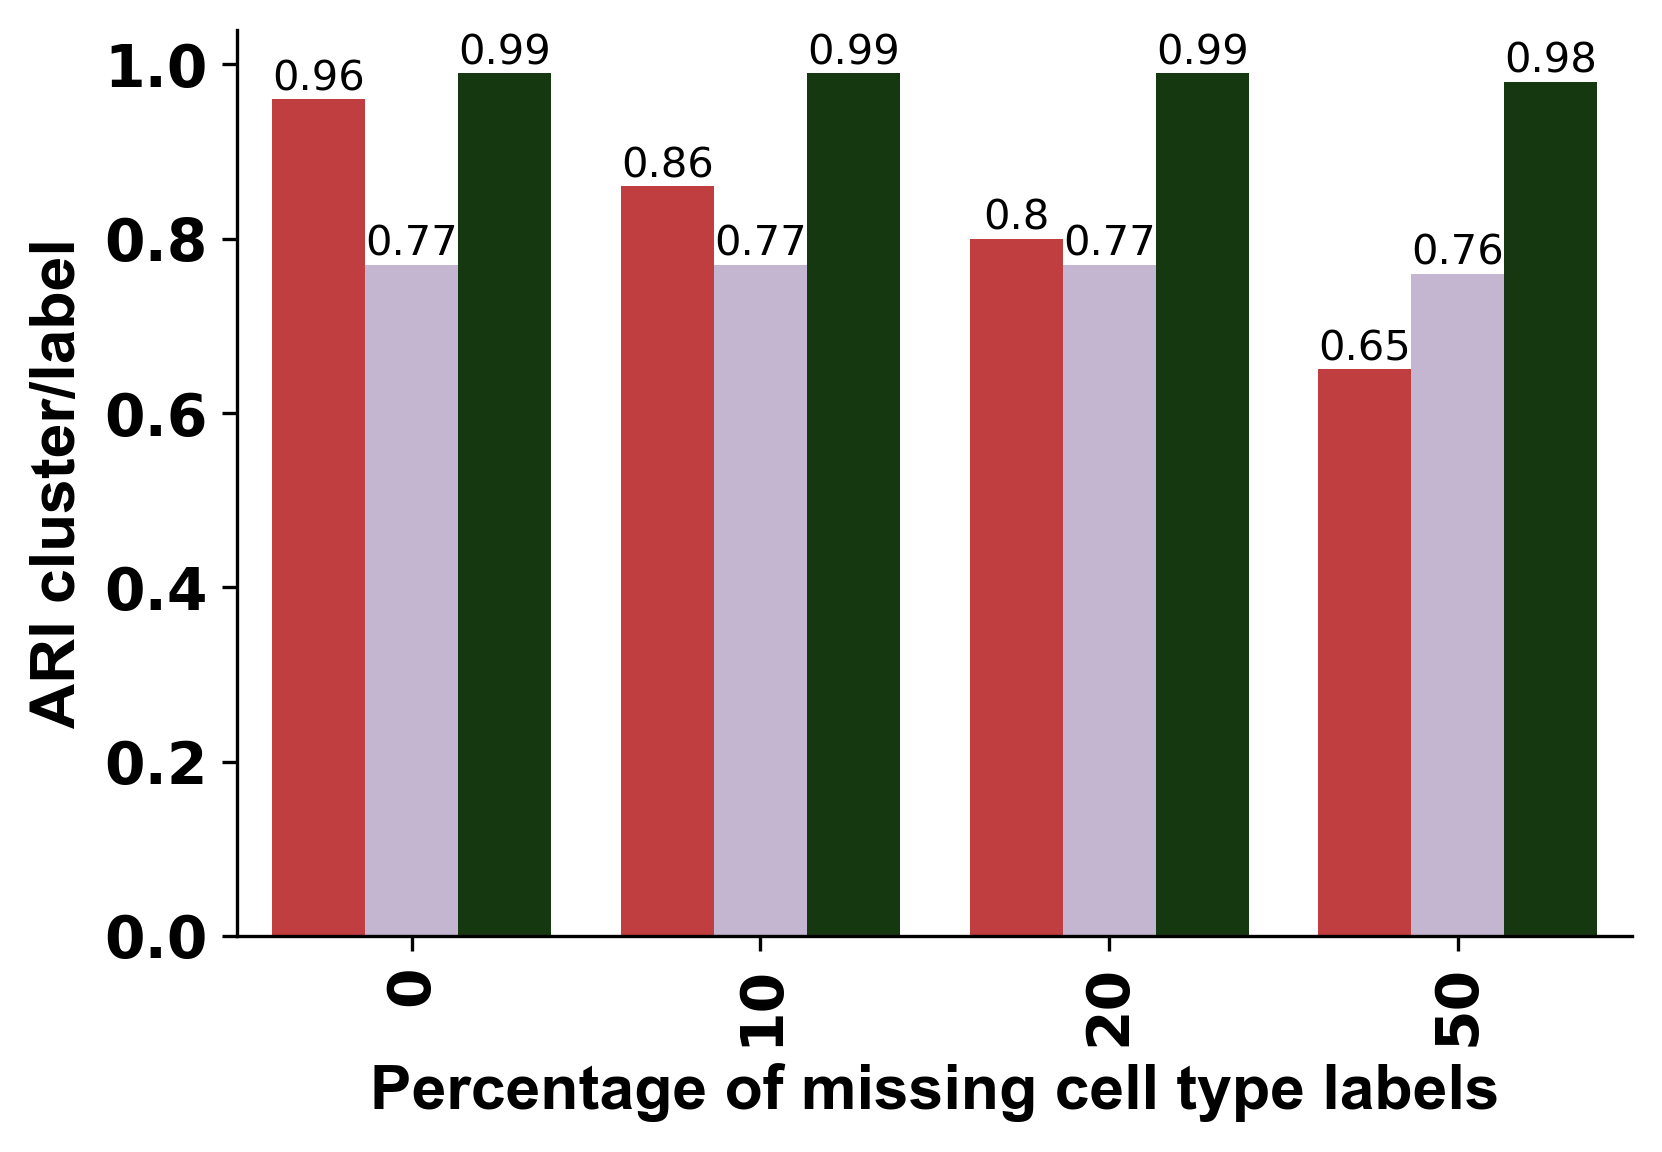

ASW label Lung
saving file at: ./Supplimentary/Supervised/Lung_multi/ASW label.png


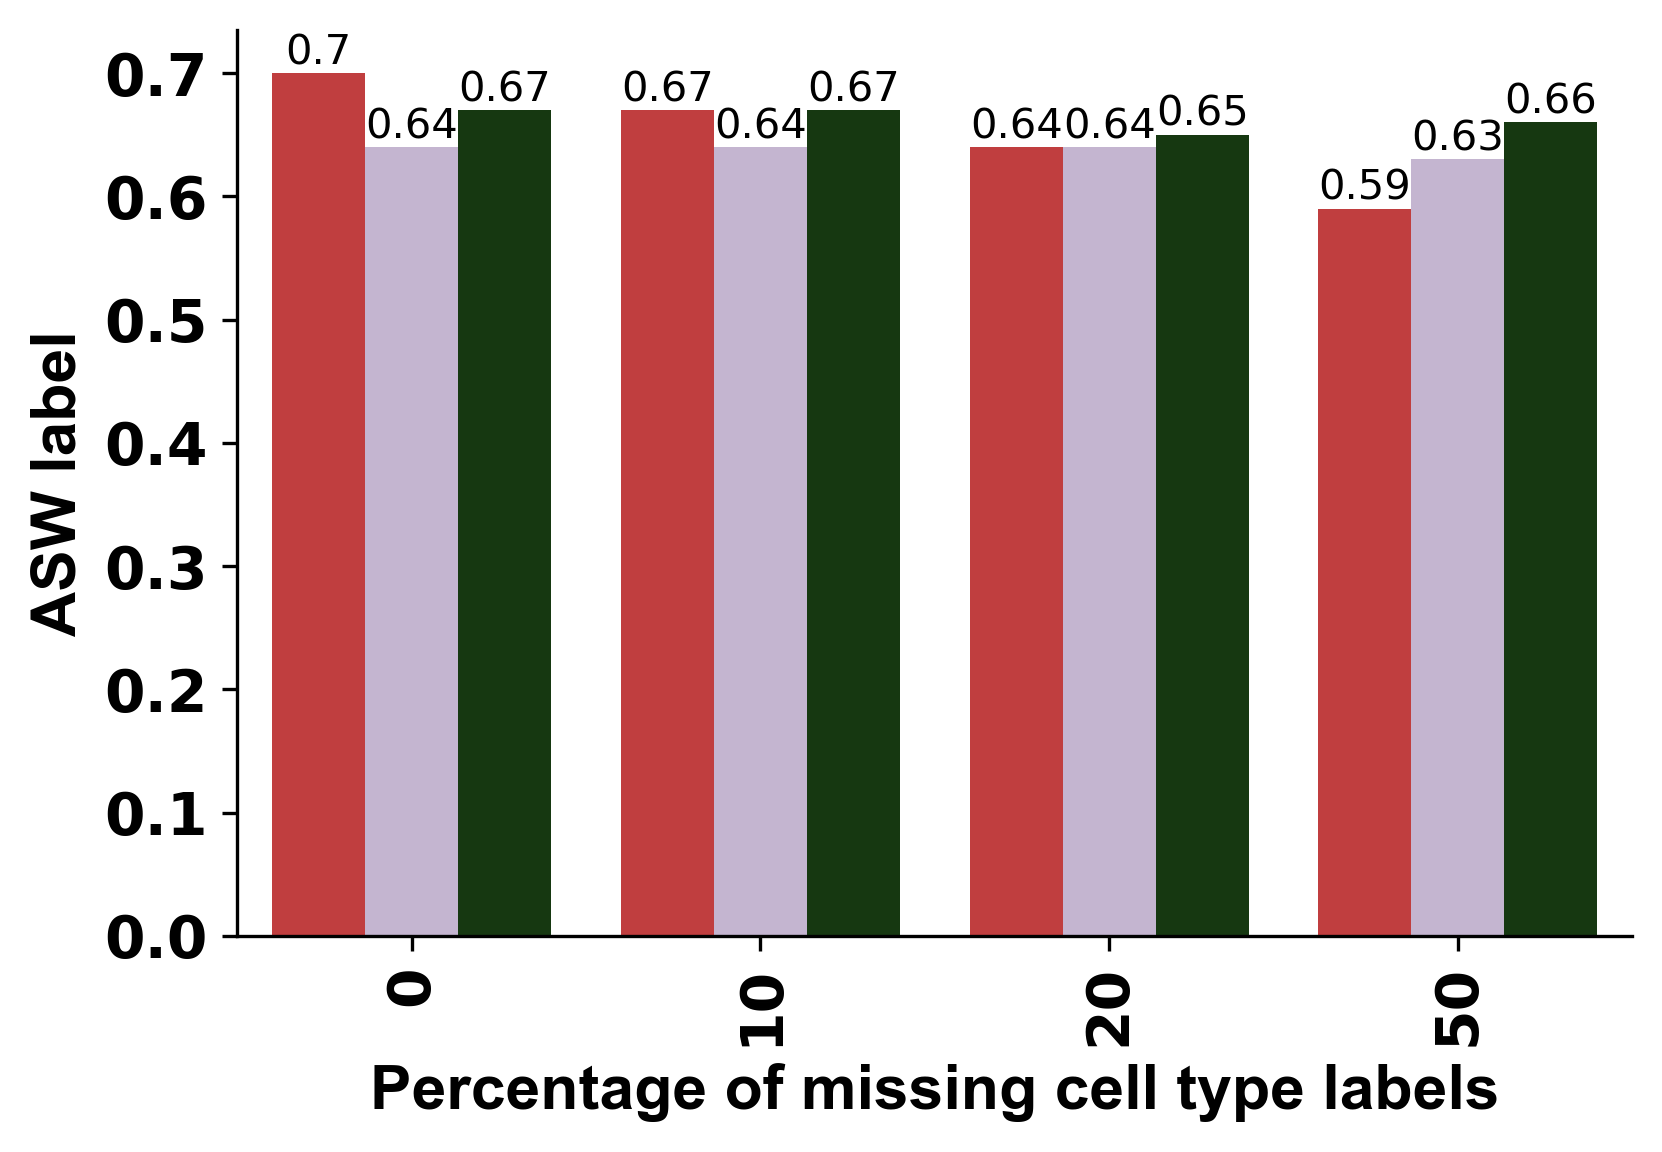

ASW label/batch Lung
saving file at: ./Supplimentary/Supervised/Lung_multi/ASW label_batch.png


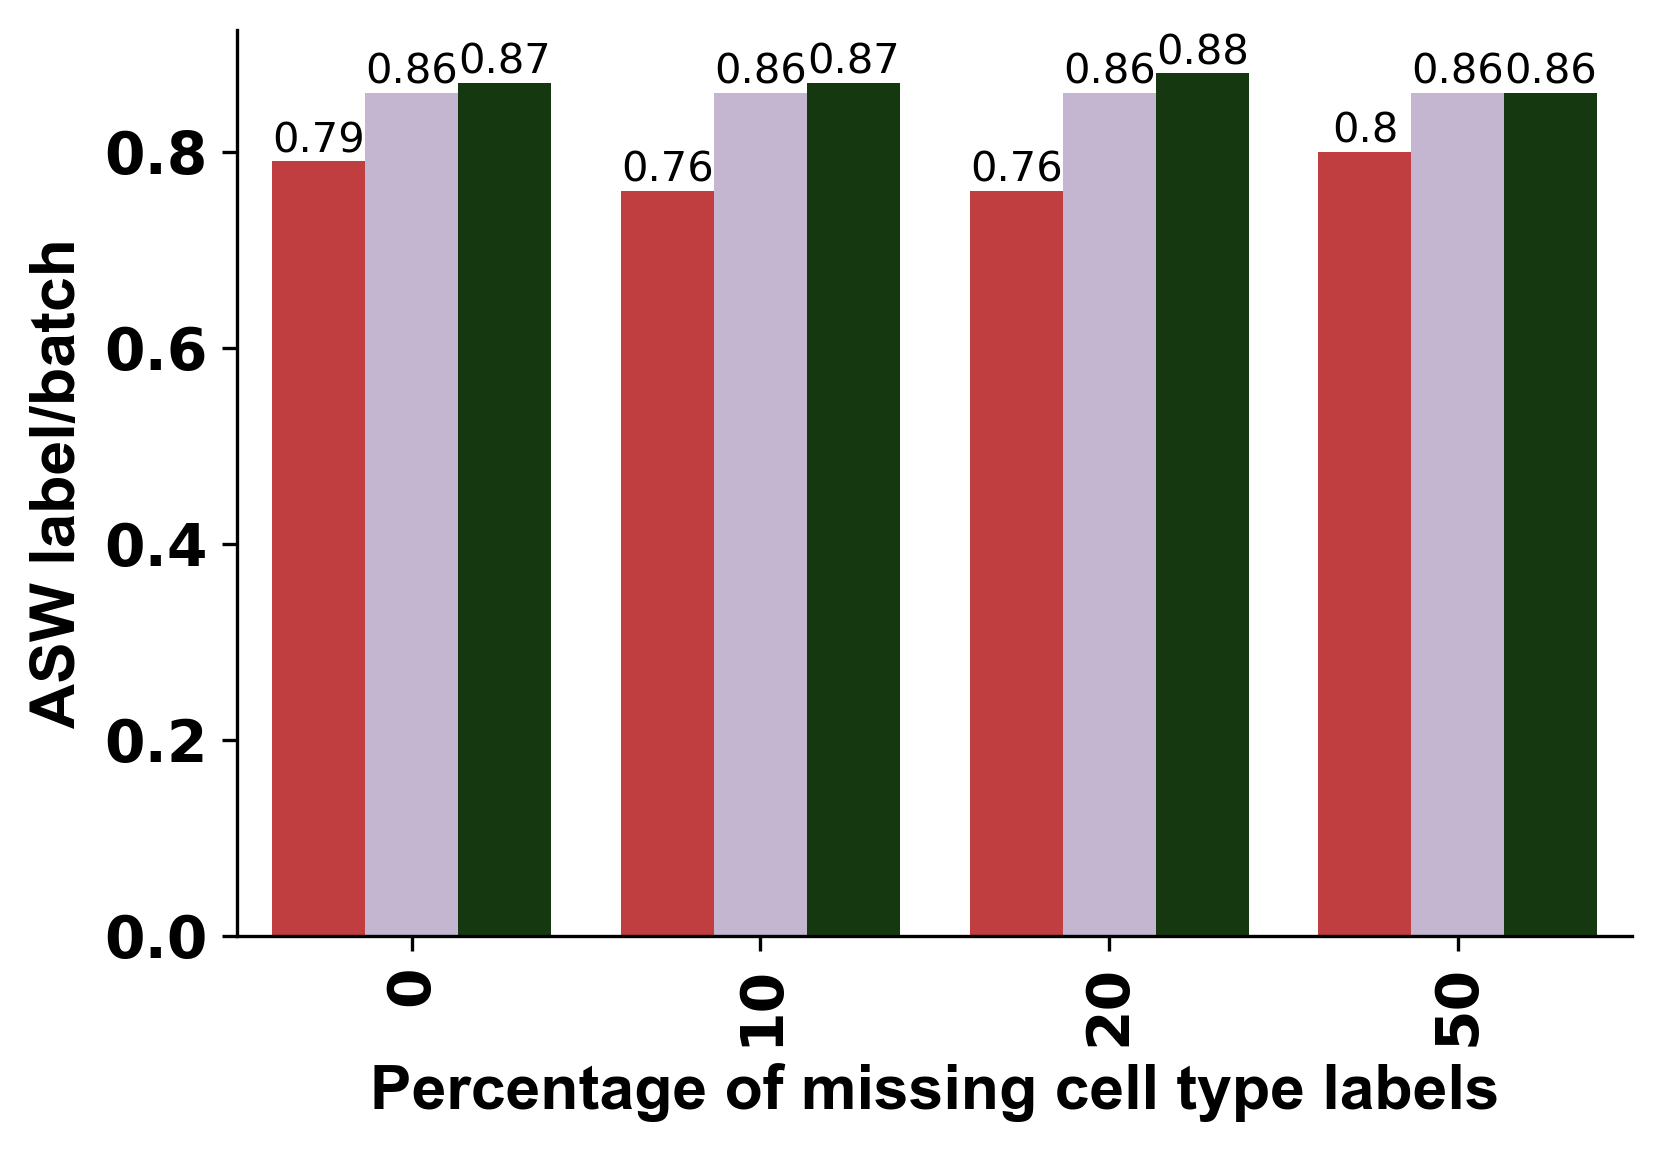

PCR batch Lung
saving file at: ./Supplimentary/Supervised/Lung_multi/PCR batch.png


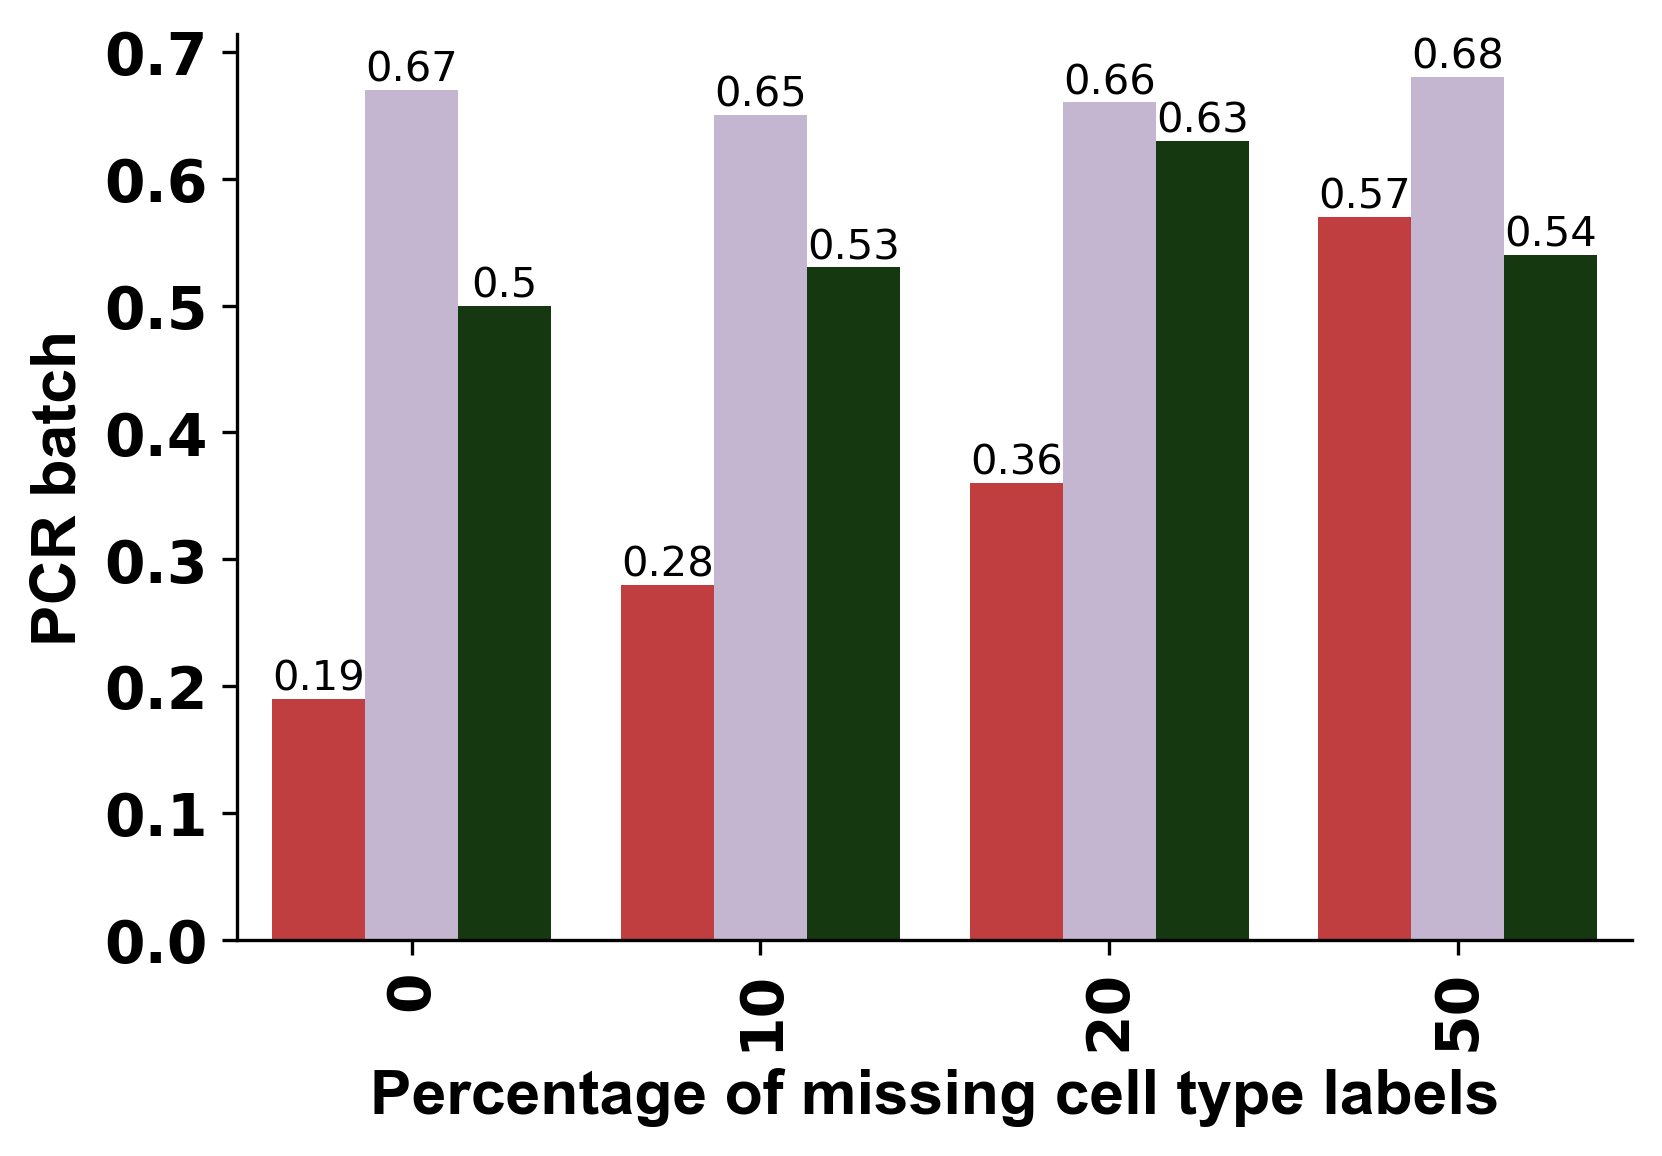

isolated f1 score Lung
saving file at: ./Supplimentary/Supervised/Lung_multi/isolated f1 score.png


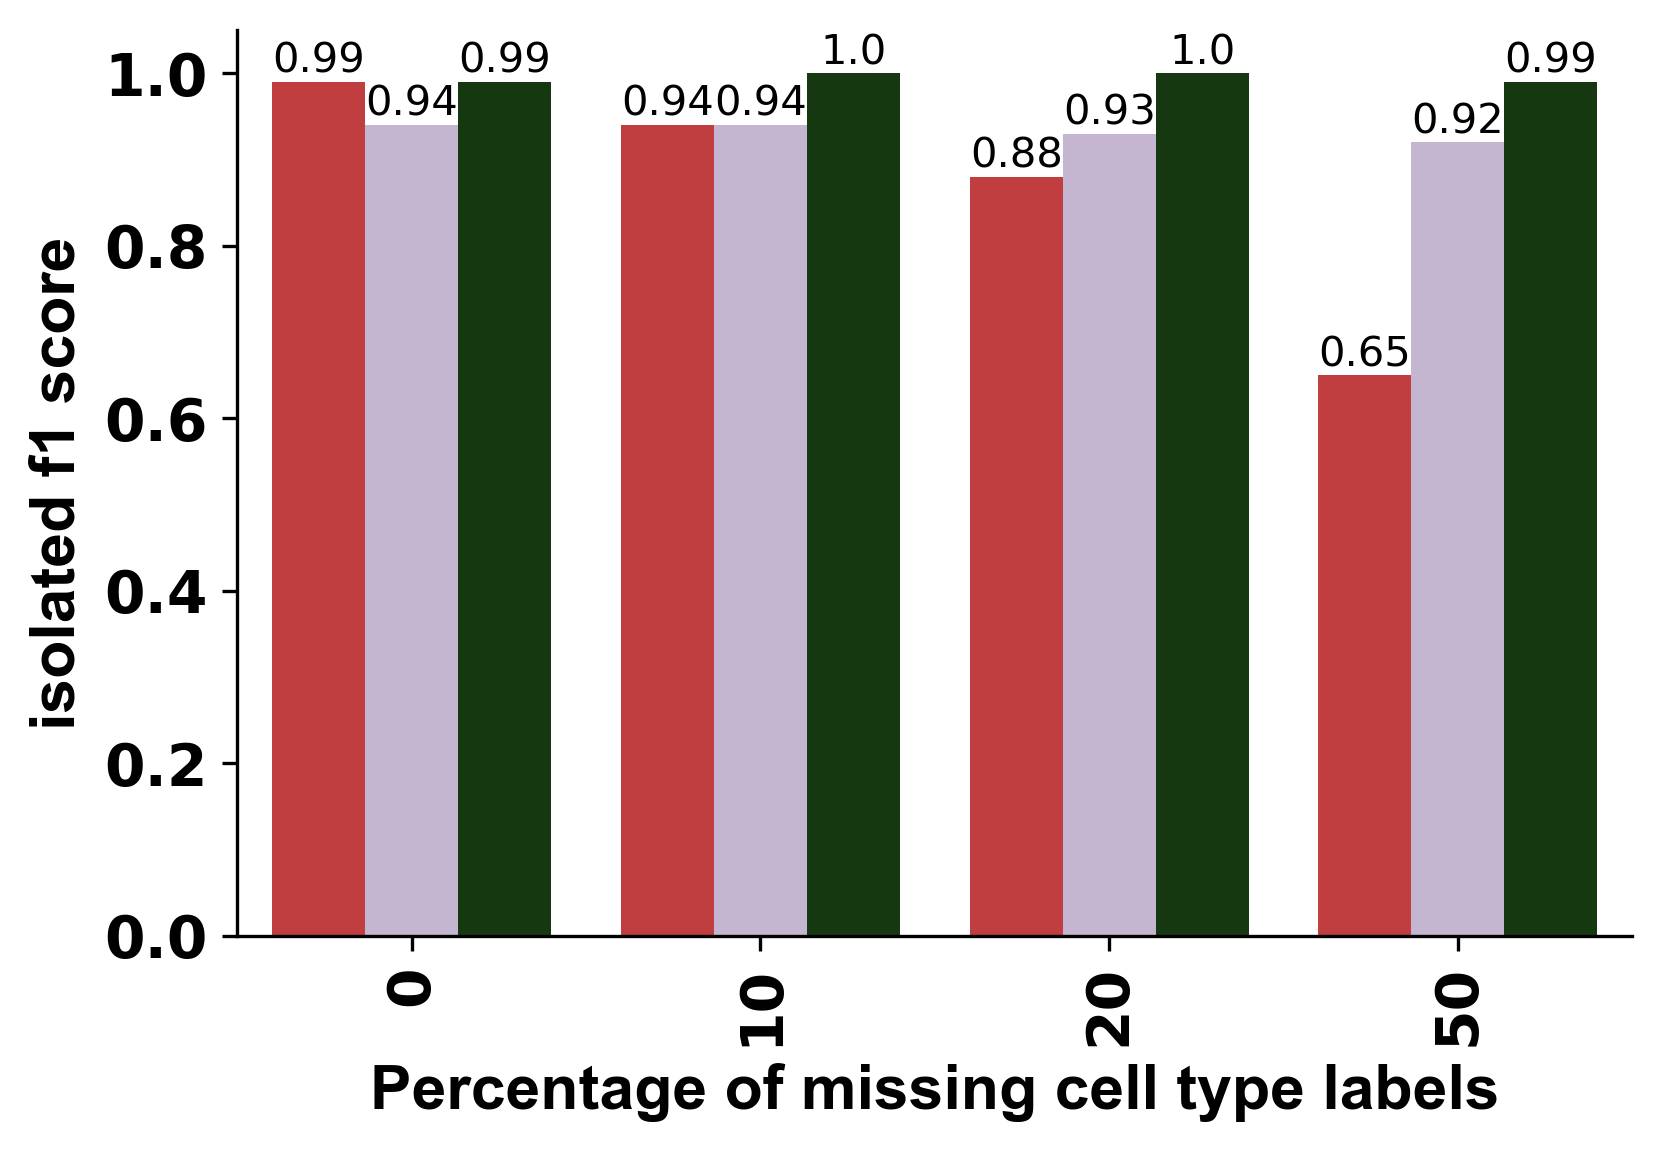

isolated silhouette coefficient Lung
saving file at: ./Supplimentary/Supervised/Lung_multi/isolated silhouette coefficient.png


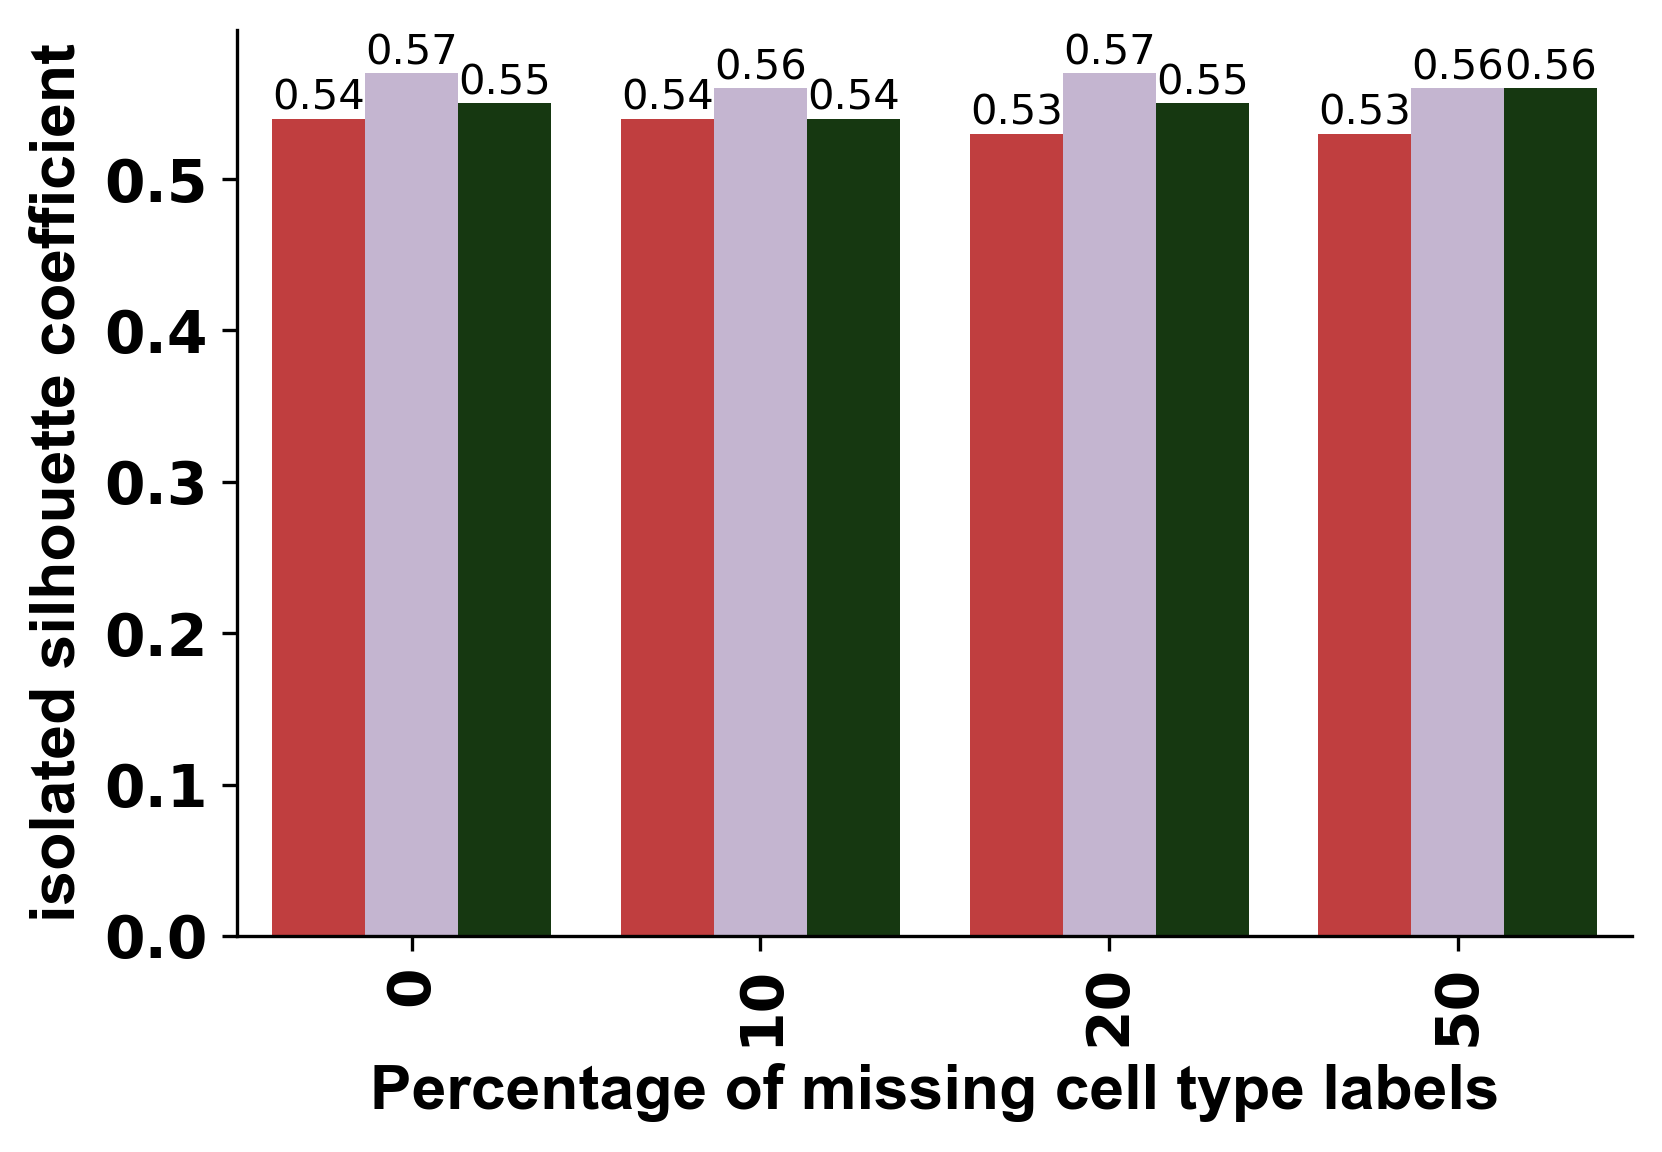

graph connectivity Lung
saving file at: ./Supplimentary/Supervised/Lung_multi/graph connectivity.png


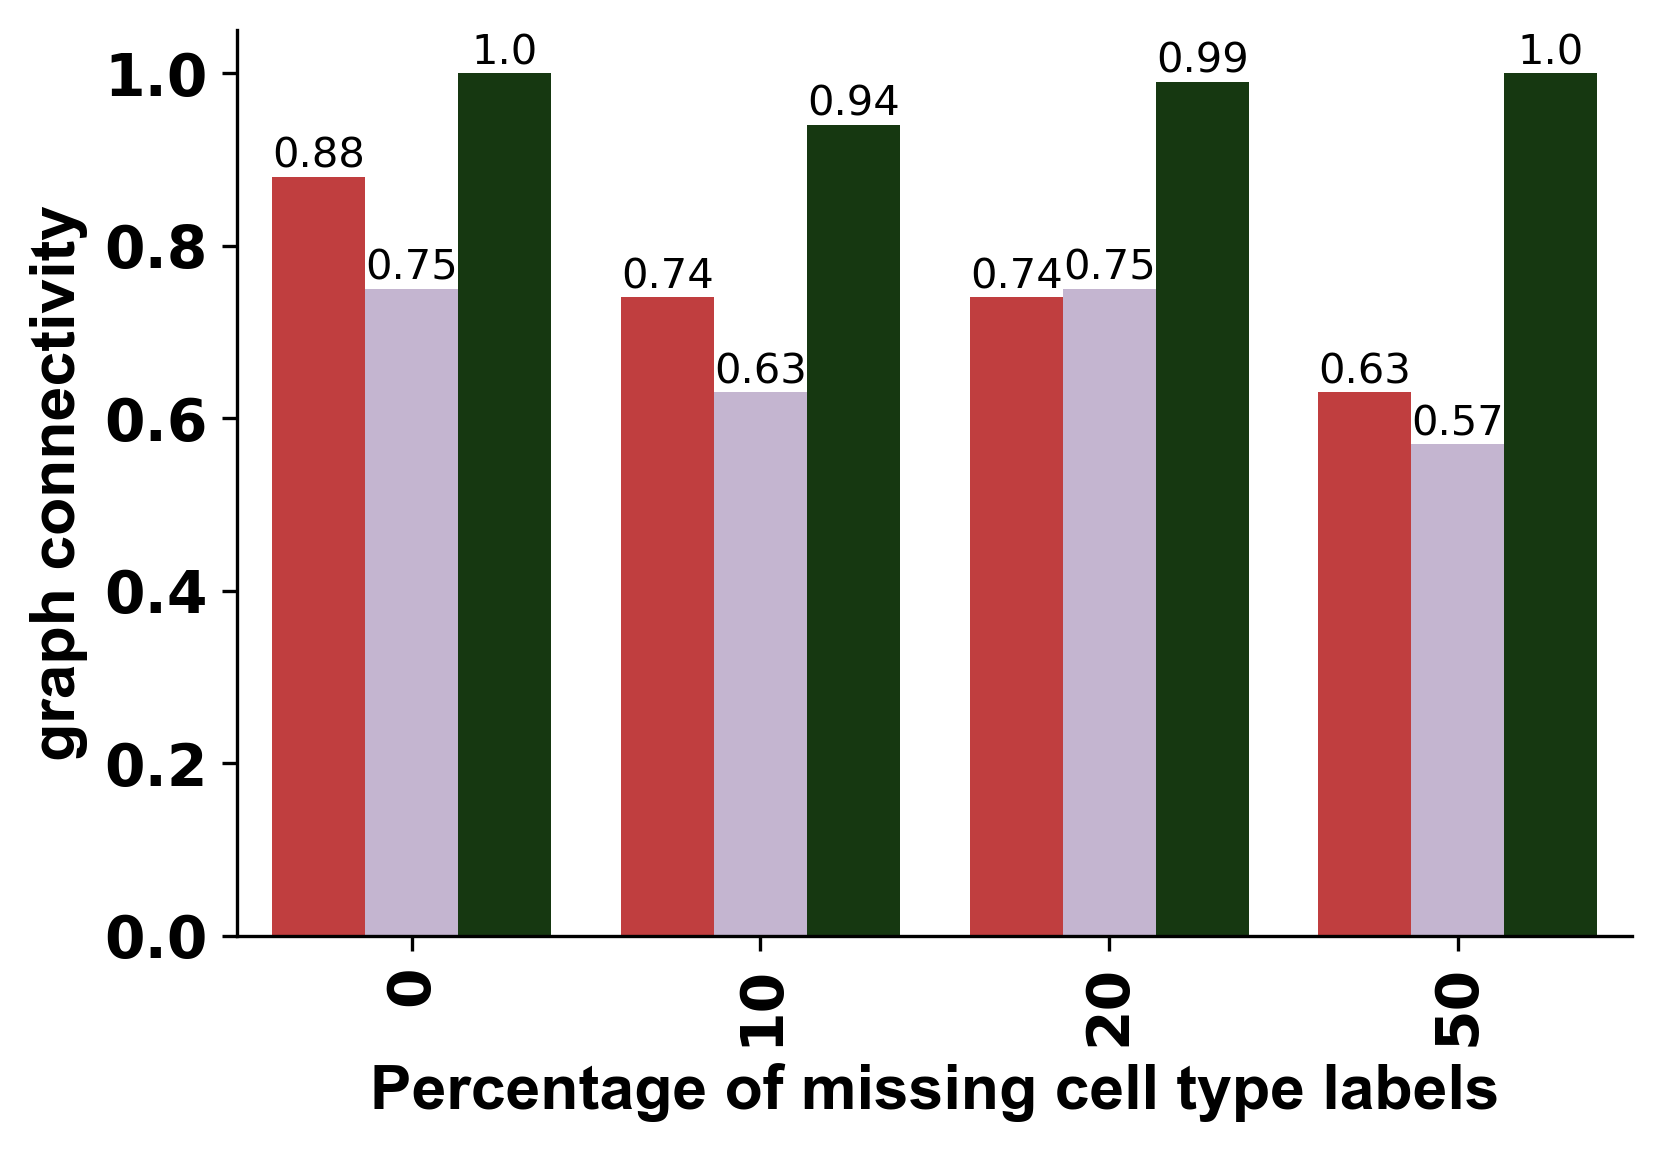

kBET Lung
saving file at: ./Supplimentary/Supervised/Lung_multi/kBET.png


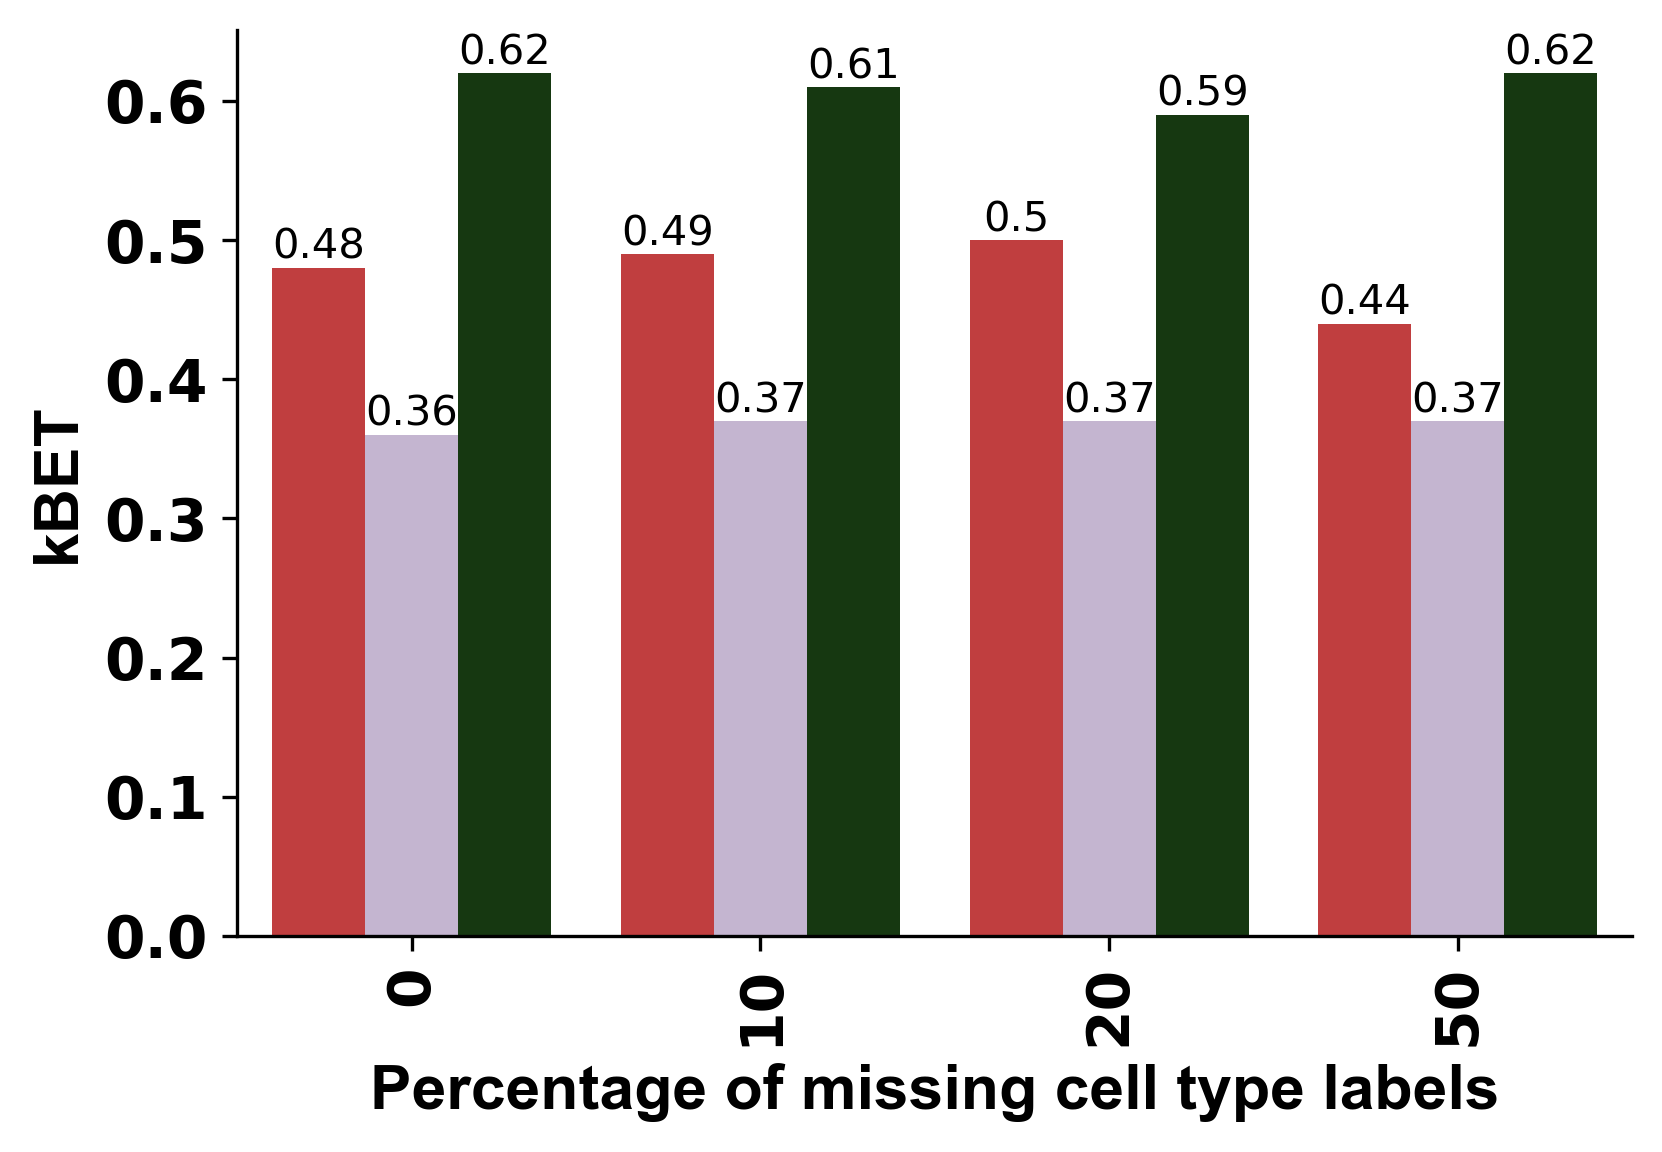

In [8]:
dataset = 'Lung'
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset.drop(['Dataset'], inplace=True, axis=1)
df_dataset = df_dataset.loc[methods_to_plot,:]
df_dataset = df_dataset.apply(lambda x:x.apply(lambda y:round(y,2) if type(y)!=str else y))
df_dataset['Percentage_wrong'] = df_dataset['Percentage_wrong'].astype('int32')
df_dataset['color'] = pd.Series(df_dataset.index,index=df_dataset.index).replace(method_color_dct)
display(df_dataset)
for col in cloumns_to_plot:
    print (col,dataset)
    plot_bar_multi(df_dataset, col,method_color_dct,save_folder = save_folder+dataset+'_multi')

Method  NMI cluster/label  ARI cluster/label  ASW label  \
Method                                                                          
scGEN                  scGEN               0.91               0.93       0.69   
scGEN                  scGEN               0.84               0.87       0.67   
scGEN                  scGEN               0.80               0.79       0.65   
scGEN                  scGEN               0.73               0.61       0.60   
scANVI                scANVI               0.88               0.92       0.62   
scANVI                scANVI               0.88               0.91       0.62   
scANVI                scANVI               0.87               0.89       0.62   
scANVI                scANVI               0.86               0.88       0.61   
scDREAMER-Sup  scDREAMER-Sup               0.98               0.99       0.65   
scDREAMER-Sup  scDREAMER-Sup               0.98               0.99       0.65   
scDREAMER-Sup  scDREAMER-Sup               0.98               0.99       0.65   
scDREAMER-Sup  scDREAMER-Sup               0.95               0.97       0.66   

               ASW label/batch  PCR batch  isolated f1 score  \
Method                                                         
scGEN                     0.90       0.47               0.87   
scGEN                     0.92       0.53               0.80   
scGEN                     0.91       0.59               0.75   
scGEN                     0.89       0.75               0.56   
scANVI                    0.87       0.73               0.87   
scANVI                    0.86       0.74               0.86   
scANVI                    0.86       0.74               0.86   
scANVI                    0.87       0.75               0.81   
scDREAMER-Sup             0.91       0.64               0.99   
scDREAMER-Sup             0.91       0.71               0.99   
scDREAMER-Sup             0.90       0.72               0.99   
scDREAMER-Sup             0.90       0.69               0.88   

               isolated silhouette coefficient  graph connectivity  kBET  \
Method                                                                     
scGEN                                     0.57                0.99  0.46   
scGEN                                     0.57                0.96  0.44   
scGEN                                     0.56                0.86  0.40   
scGEN                                     0.52                0.77  0.35   
scANVI                                    0.60                0.98  0.22   
scANVI                                    0.59                0.97  0.23   
scANVI                                    0.59                0.98  0.24   
scANVI                                    0.59                0.98  0.24   
scDREAMER-Sup                             0.54                1.00  0.58   
scDREAMER-Sup                             0.54                1.00  0.58   
scDREAMER-Sup                             0.56                1.00  0.53   
scDREAMER-Sup                             0.55                1.00  0.55   

               iLISI  cLISI  Percentage_wrong  trajectory  NMI k-means  \
Method                                                                   
scGEN           0.27    1.0                 0        0.90          NaN   
scGEN           0.27    1.0                10         NaN          NaN   
scGEN           0.26    1.0                20         NaN          NaN   
scGEN           0.21    1.0                50         NaN          NaN   
scANVI          0.26    1.0                 0        0.88          NaN   
scANVI          0.26    1.0                10         NaN          NaN   
scANVI          0.27    1.0                20         NaN          NaN   
scANVI          0.27    1.0                50         NaN          NaN   
scDREAMER-Sup   0.30    1.0                 0         NaN          NaN   
scDREAMER-Sup   0.30    1.0                10         NaN          NaN   
scDREAMER-Sup   0.29    1.0          

NMI cluster/label Immune_Human
saving file at: ./Supplimentary/Supervised/Immune_Human_multi/NMI cluster_label.png


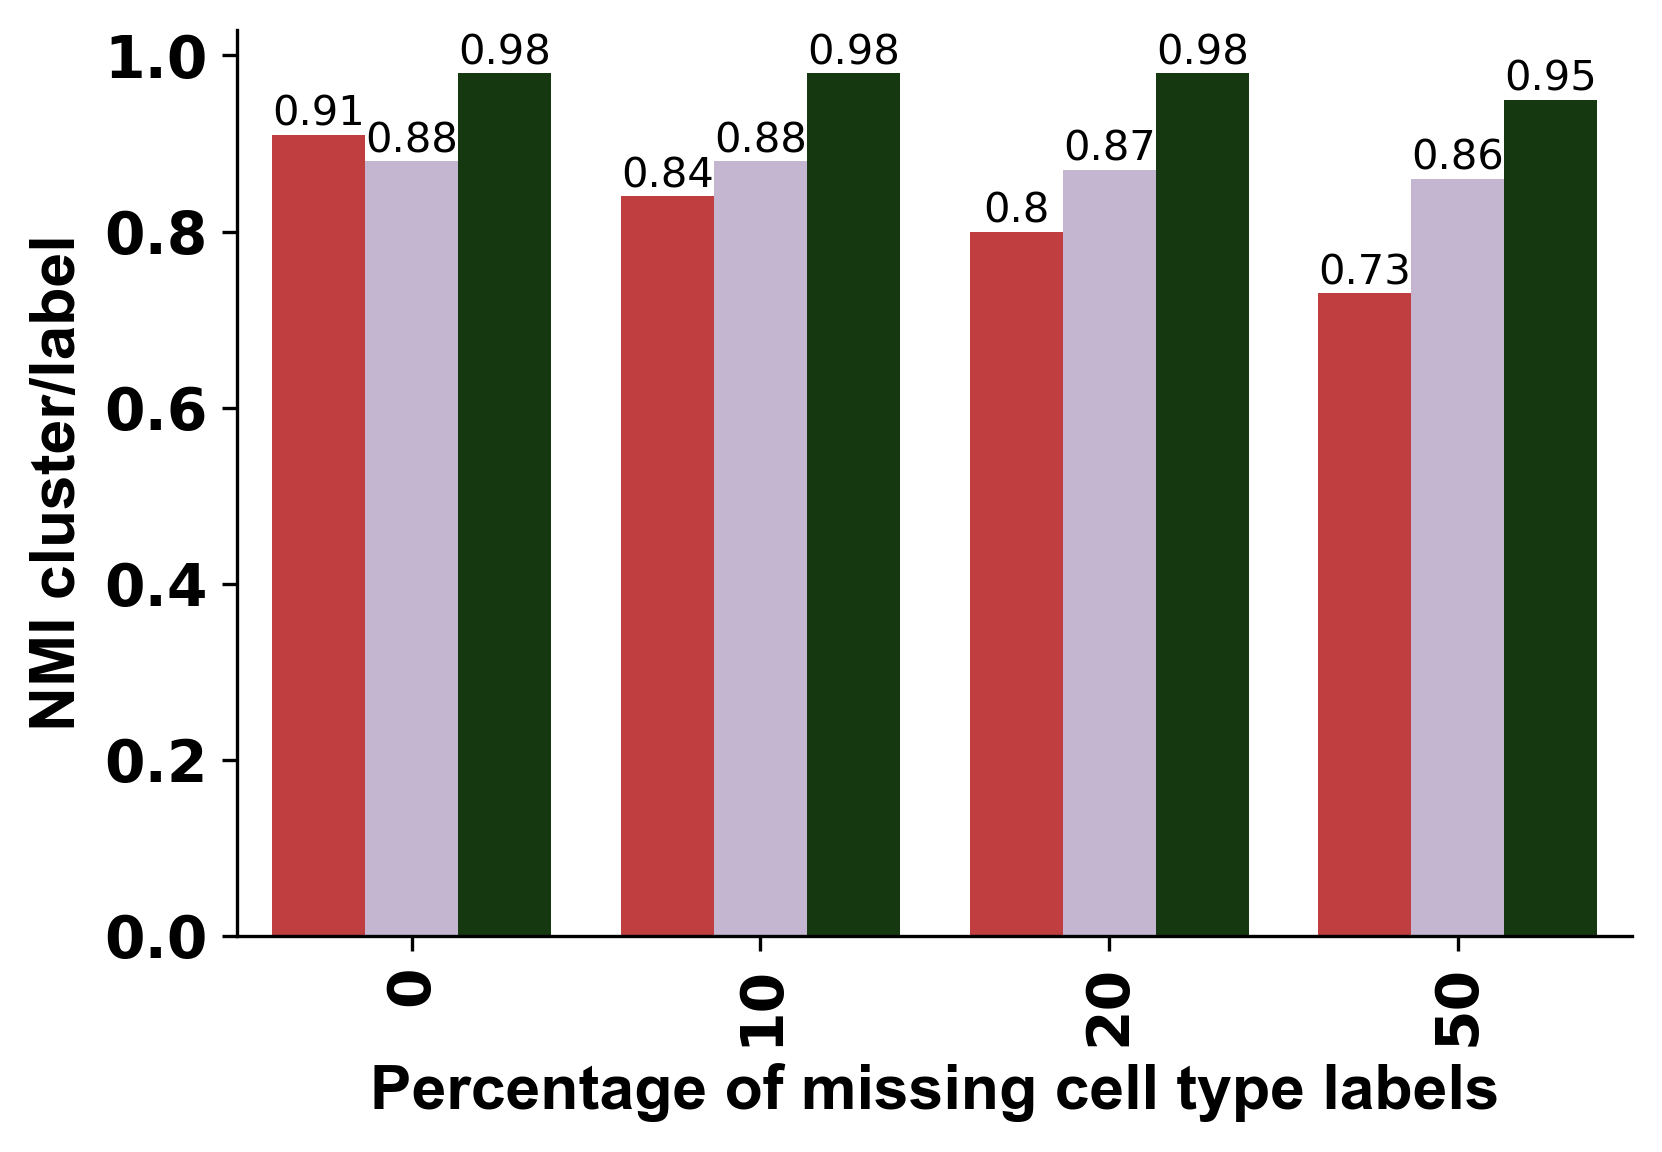

ARI cluster/label Immune_Human
saving file at: ./Supplimentary/Supervised/Immune_Human_multi/ARI cluster_label.png


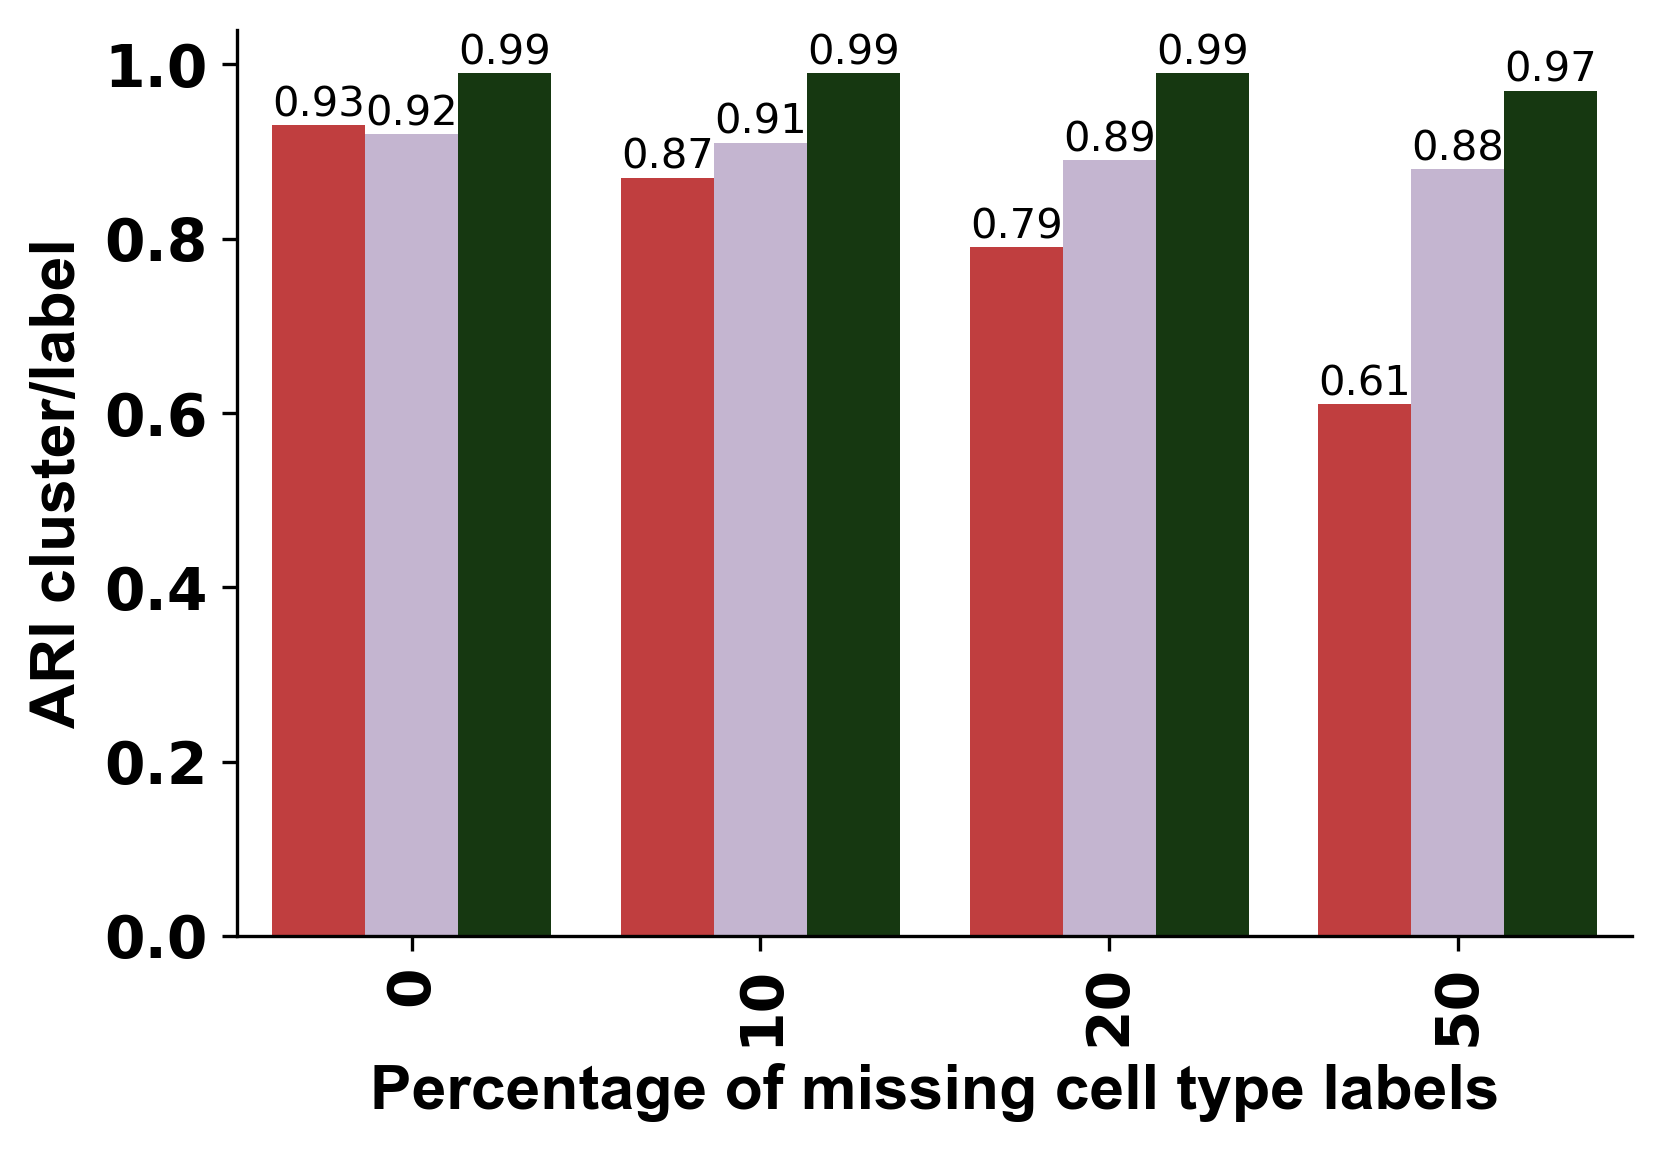

ASW label Immune_Human
saving file at: ./Supplimentary/Supervised/Immune_Human_multi/ASW label.png


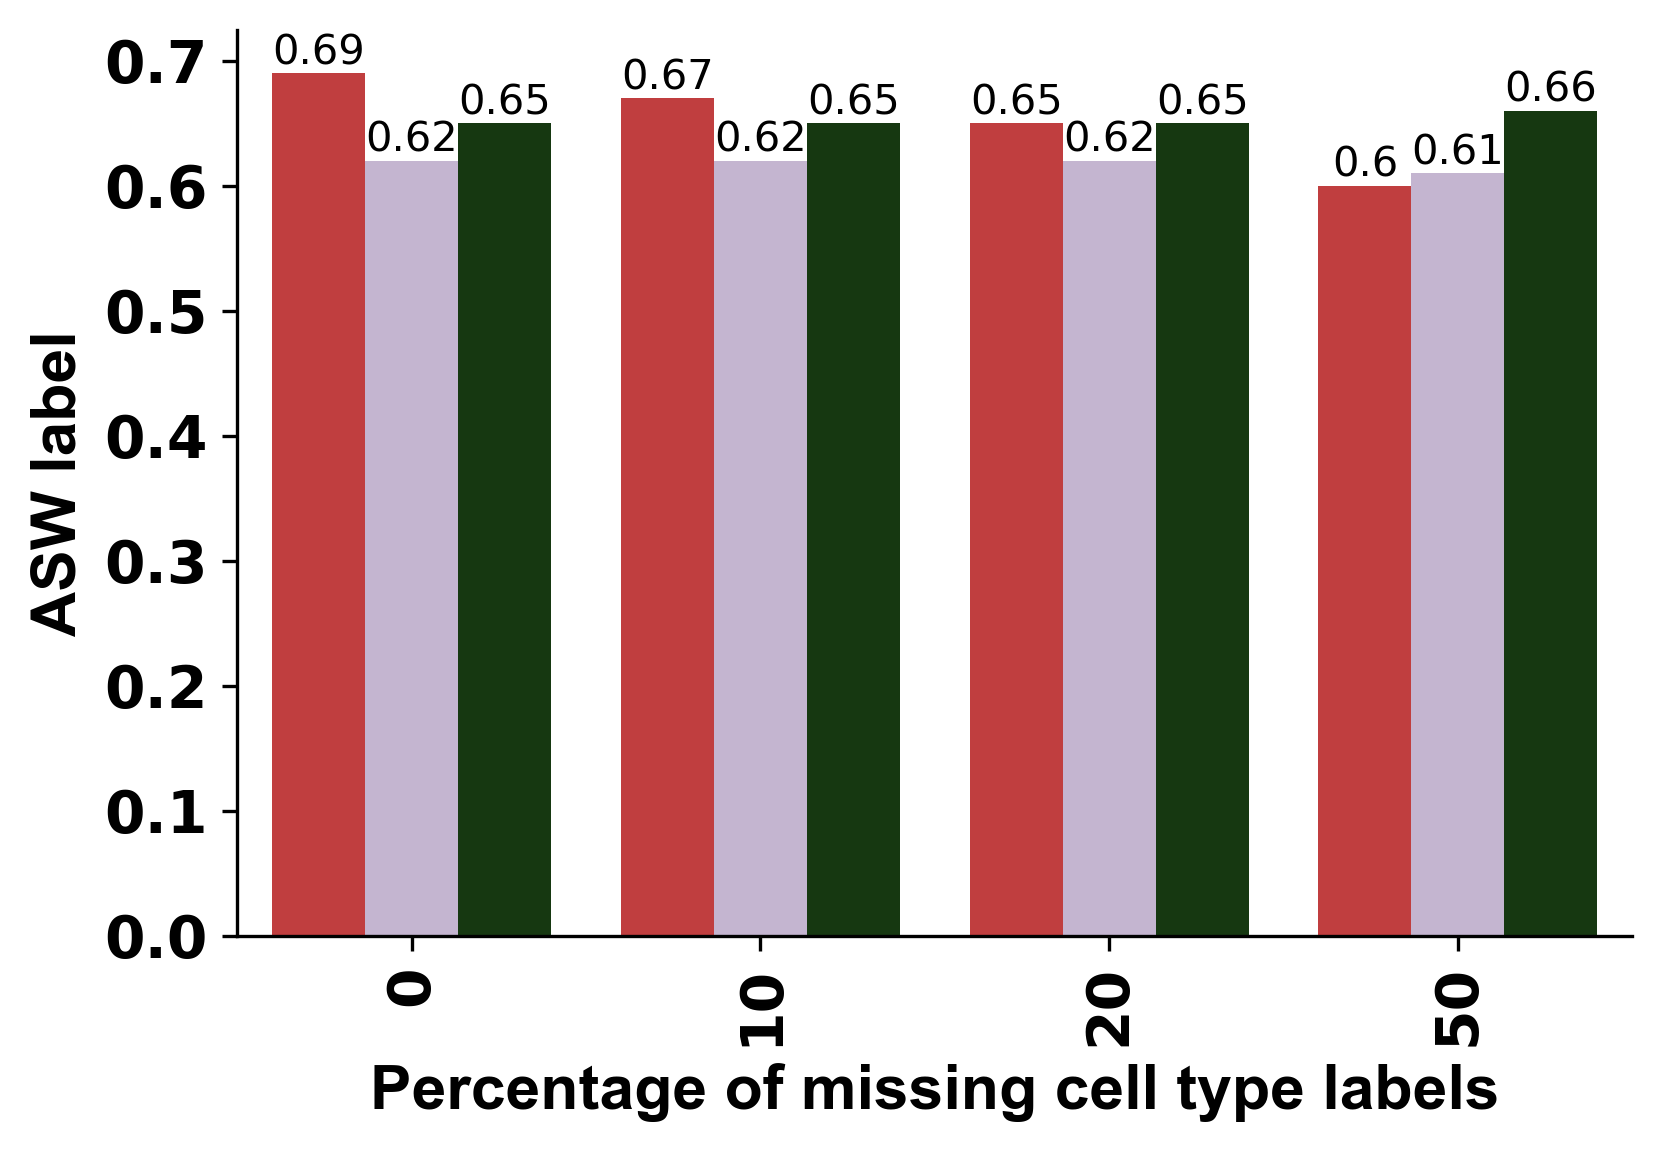

ASW label/batch Immune_Human
saving file at: ./Supplimentary/Supervised/Immune_Human_multi/ASW label_batch.png


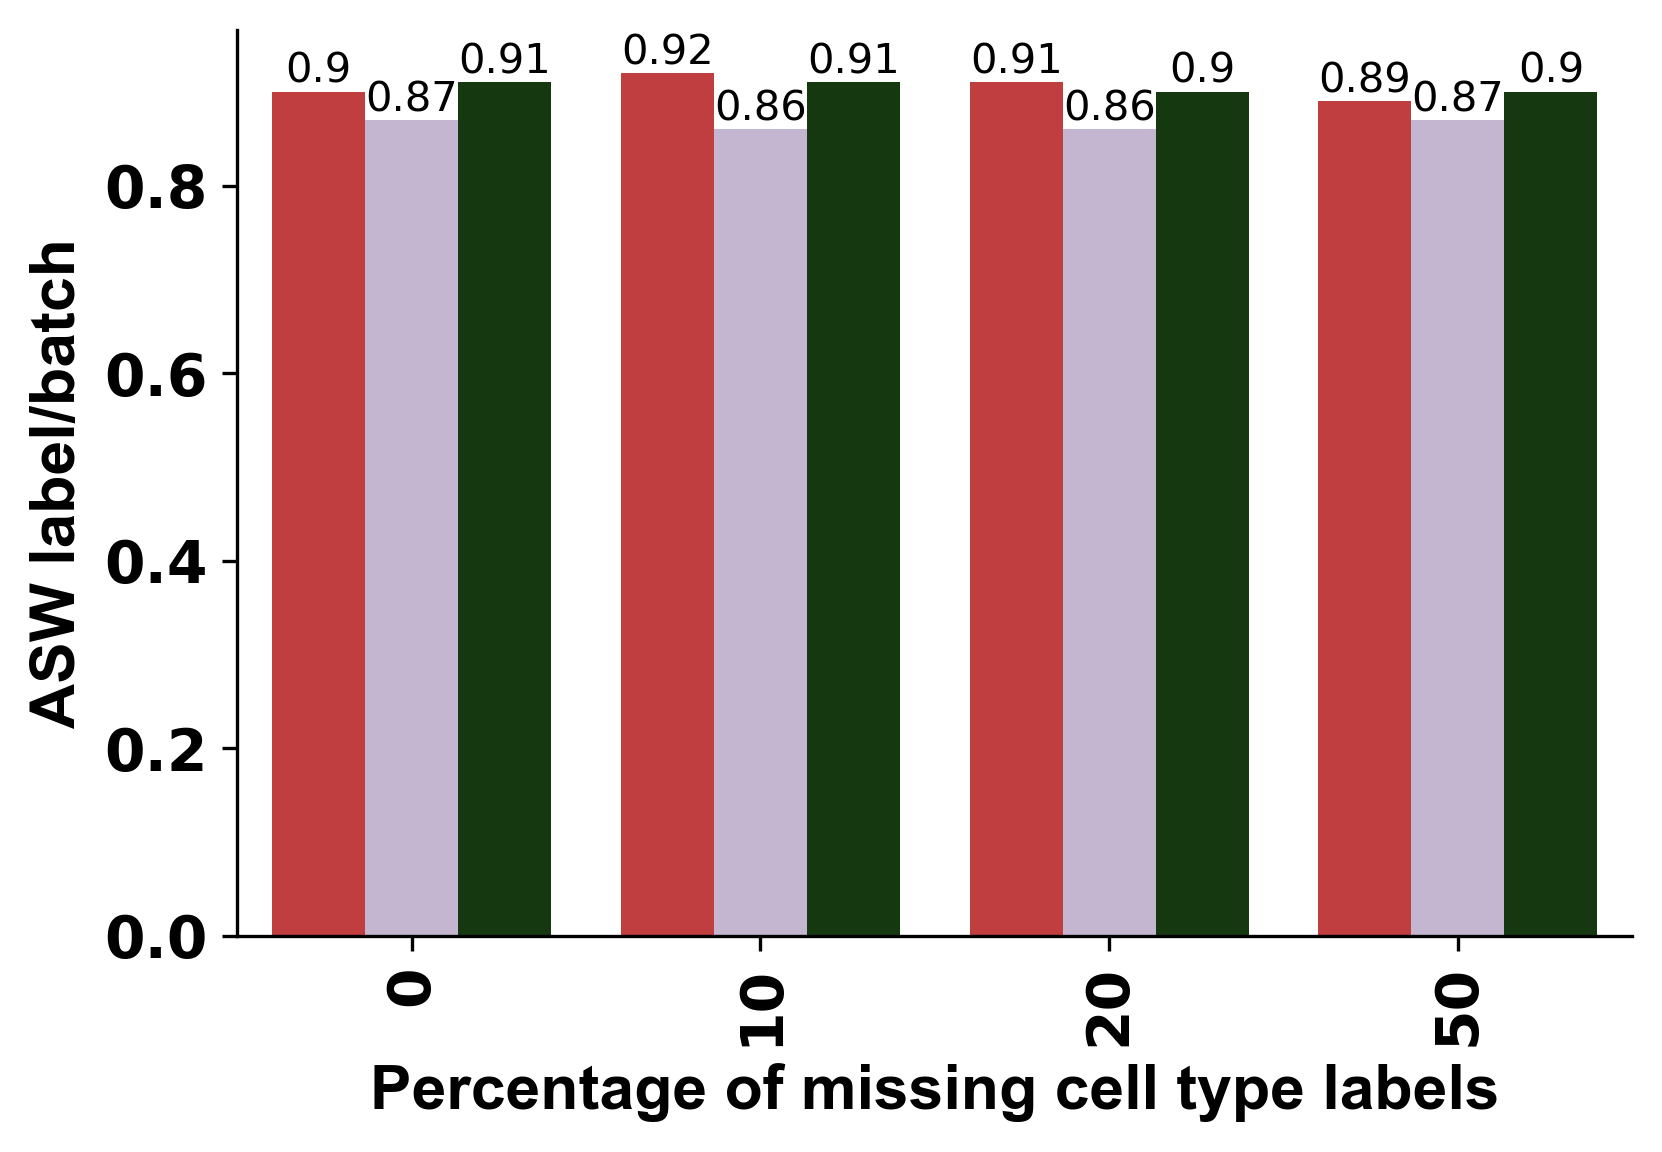

PCR batch Immune_Human
saving file at: ./Supplimentary/Supervised/Immune_Human_multi/PCR batch.png


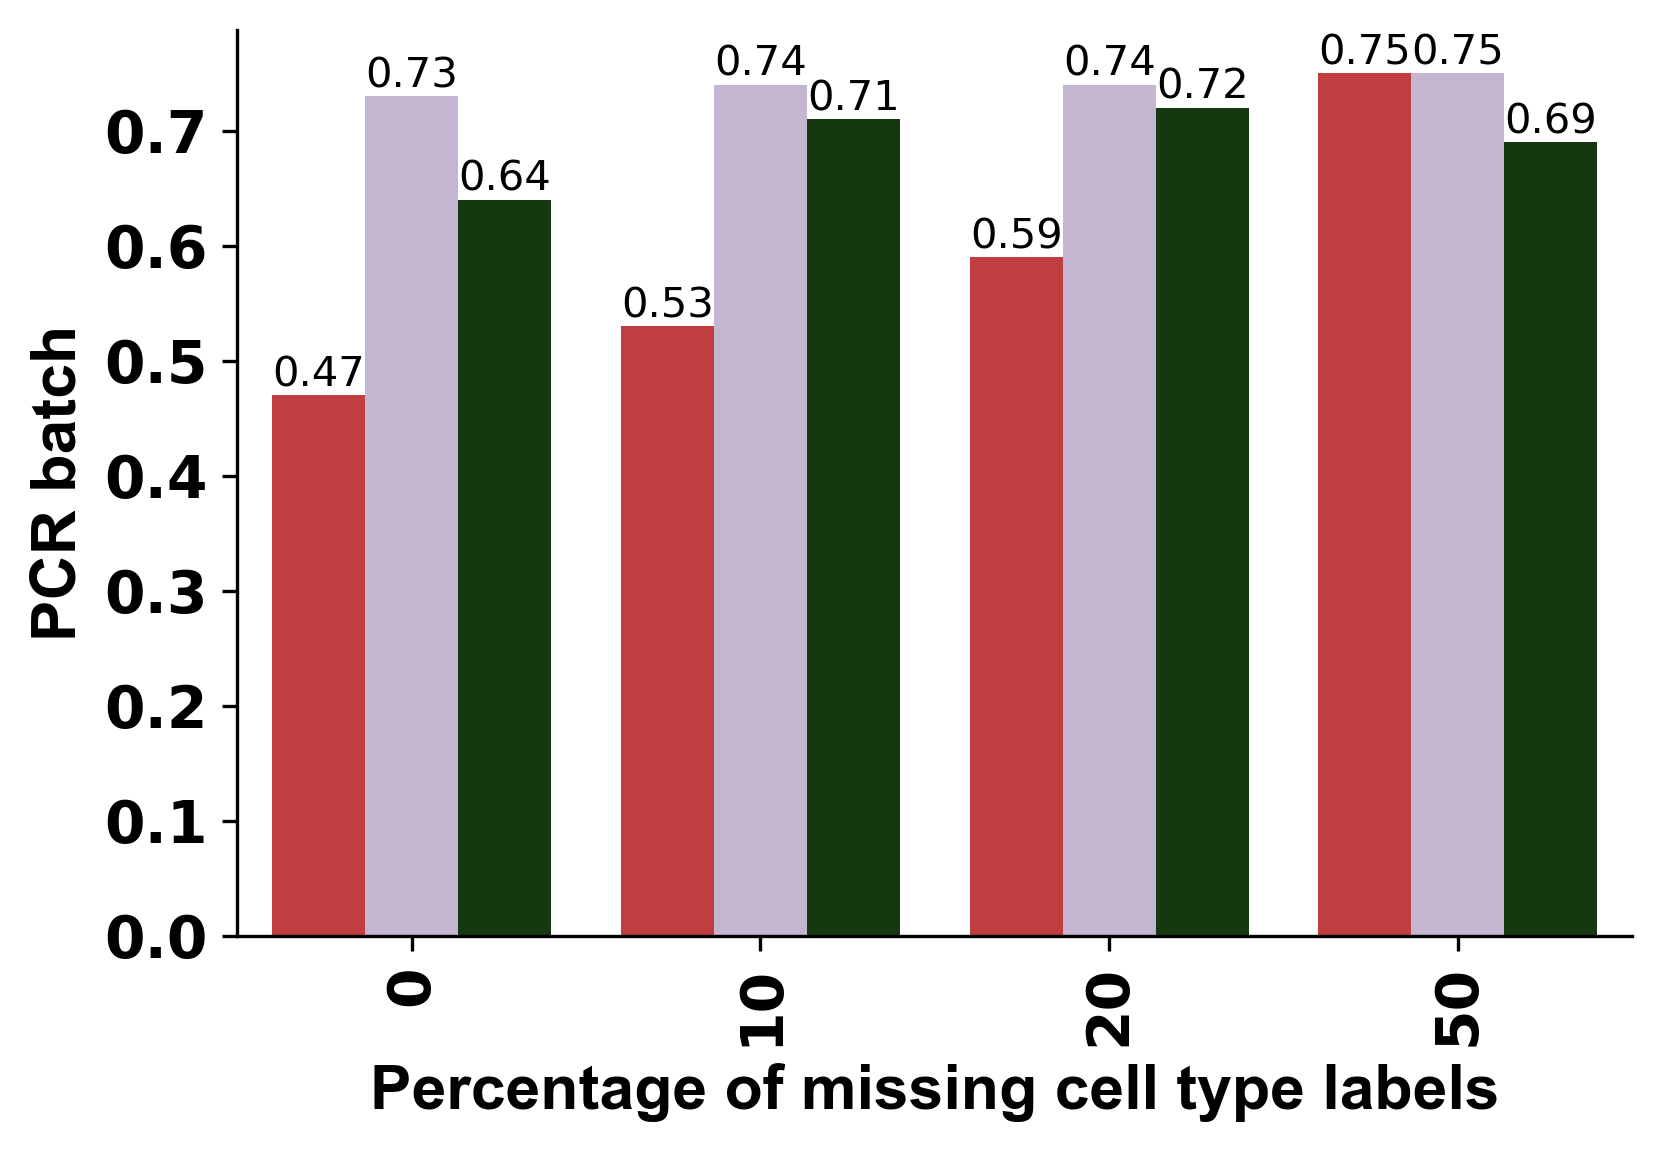

isolated f1 score Immune_Human
saving file at: ./Supplimentary/Supervised/Immune_Human_multi/isolated f1 score.png


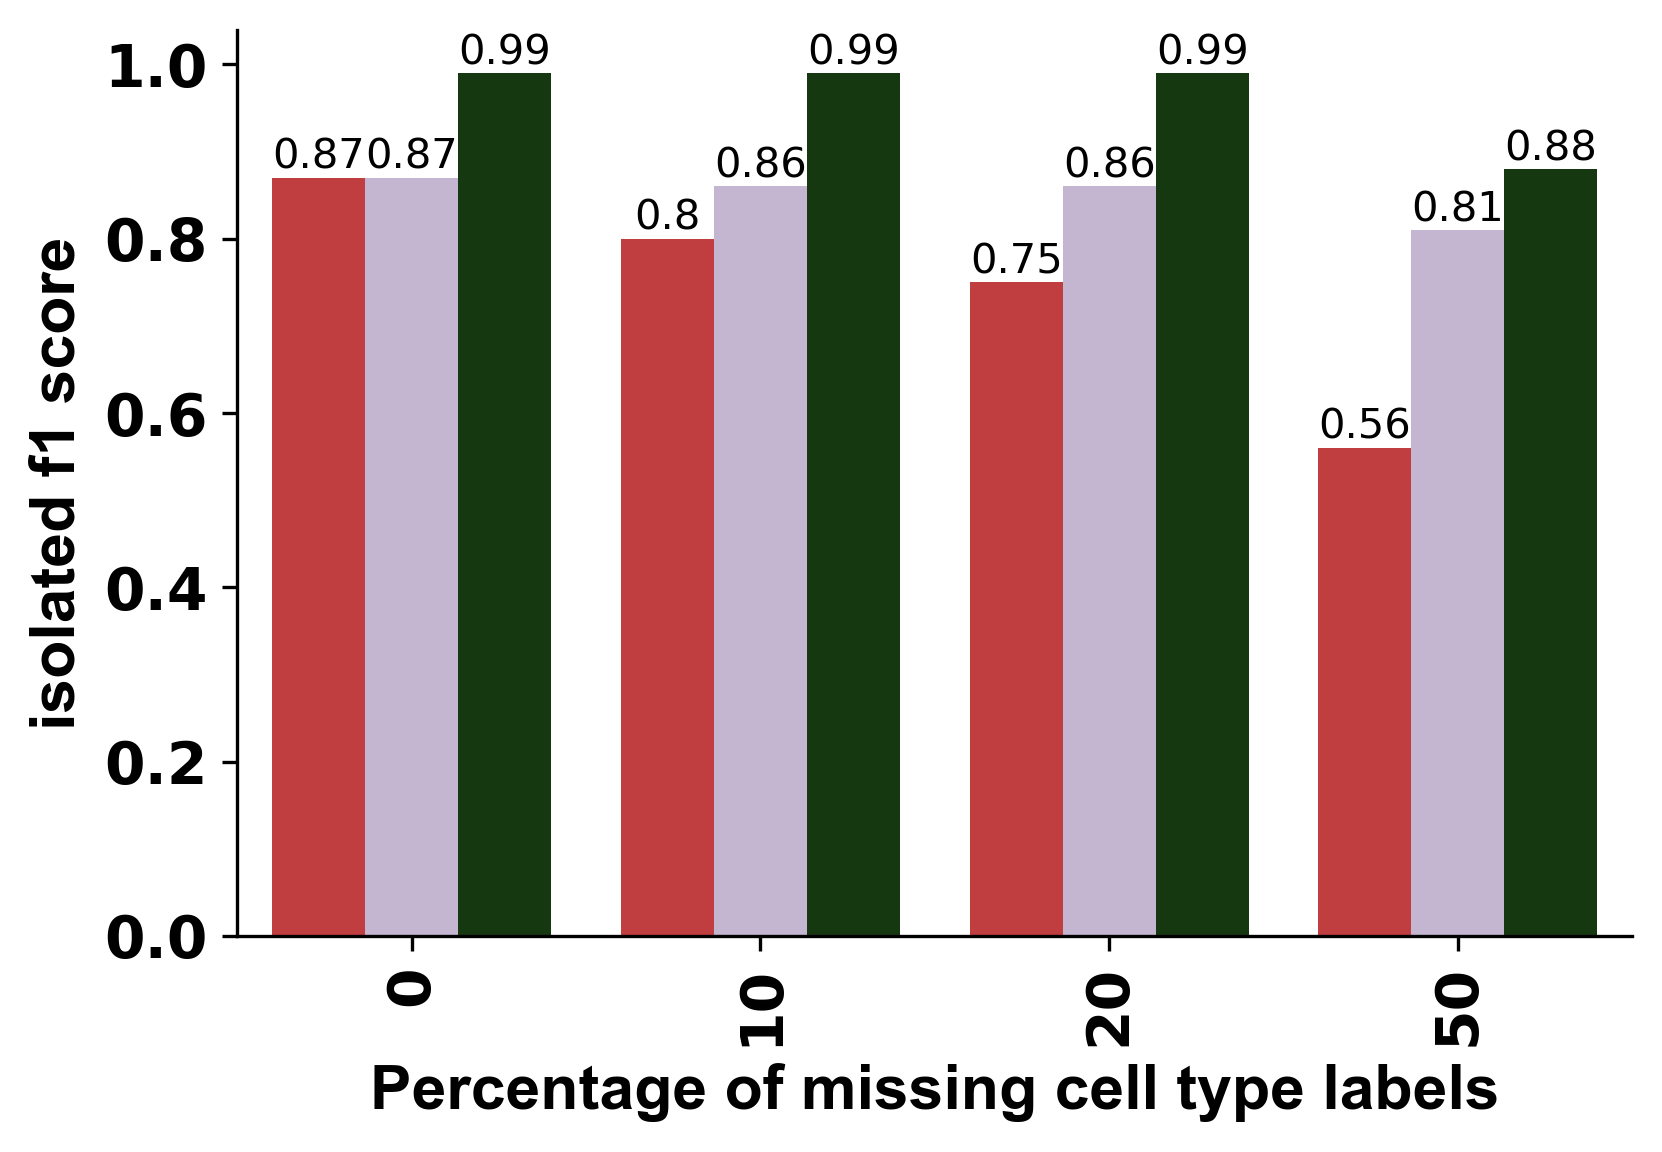

isolated silhouette coefficient Immune_Human
saving file at: ./Supplimentary/Supervised/Immune_Human_multi/isolated silhouette coefficient.png


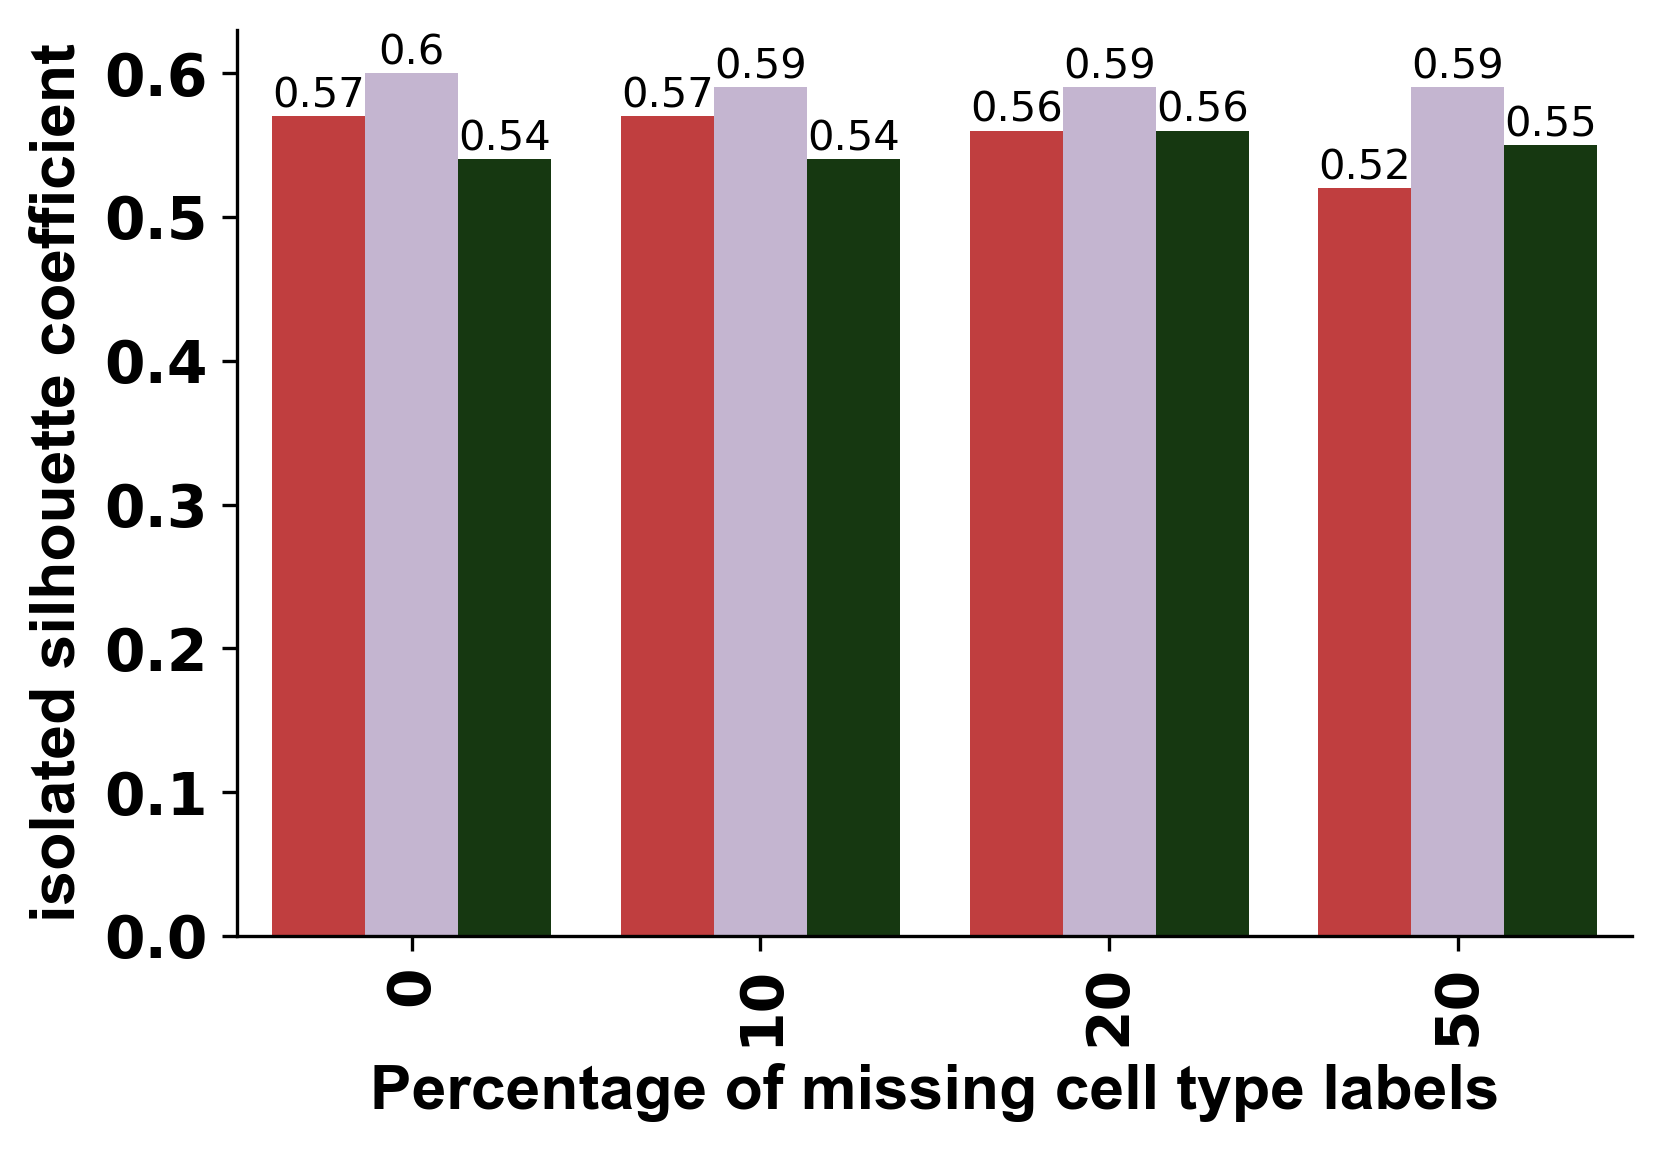

graph connectivity Immune_Human
saving file at: ./Supplimentary/Supervised/Immune_Human_multi/graph connectivity.png


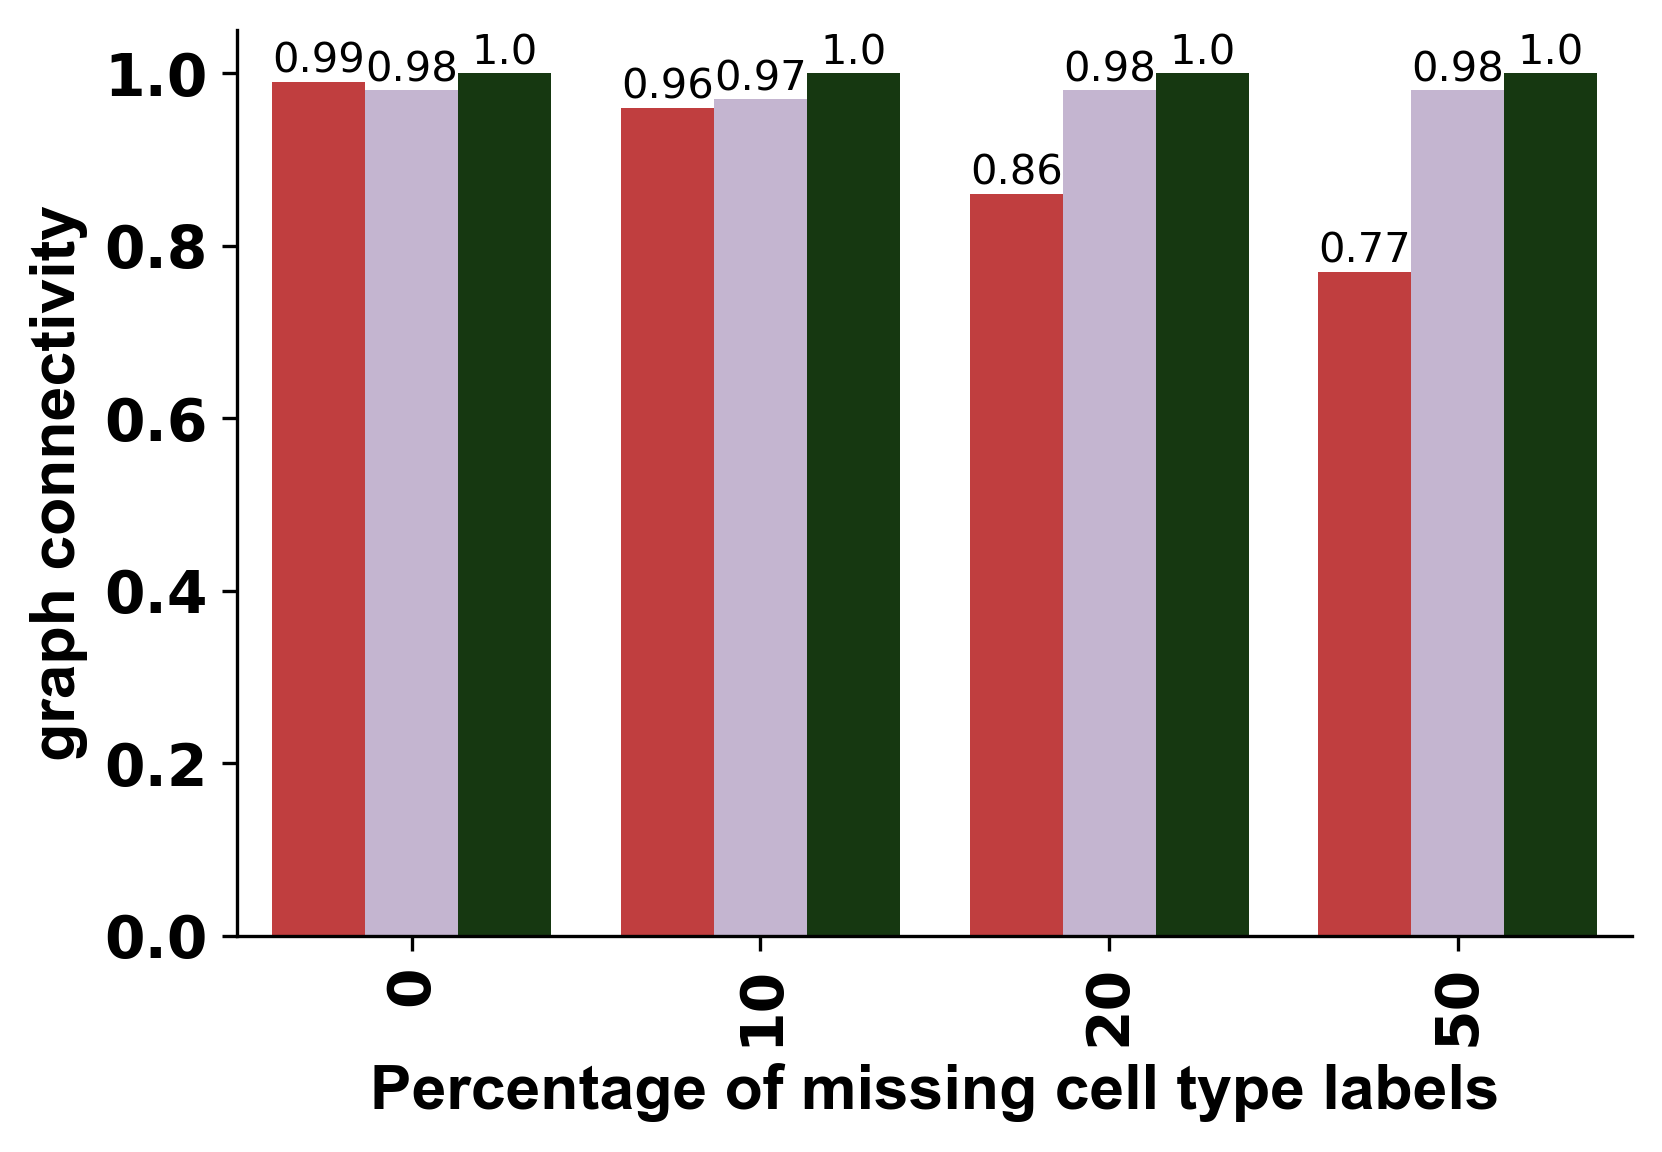

kBET Immune_Human
saving file at: ./Supplimentary/Supervised/Immune_Human_multi/kBET.png


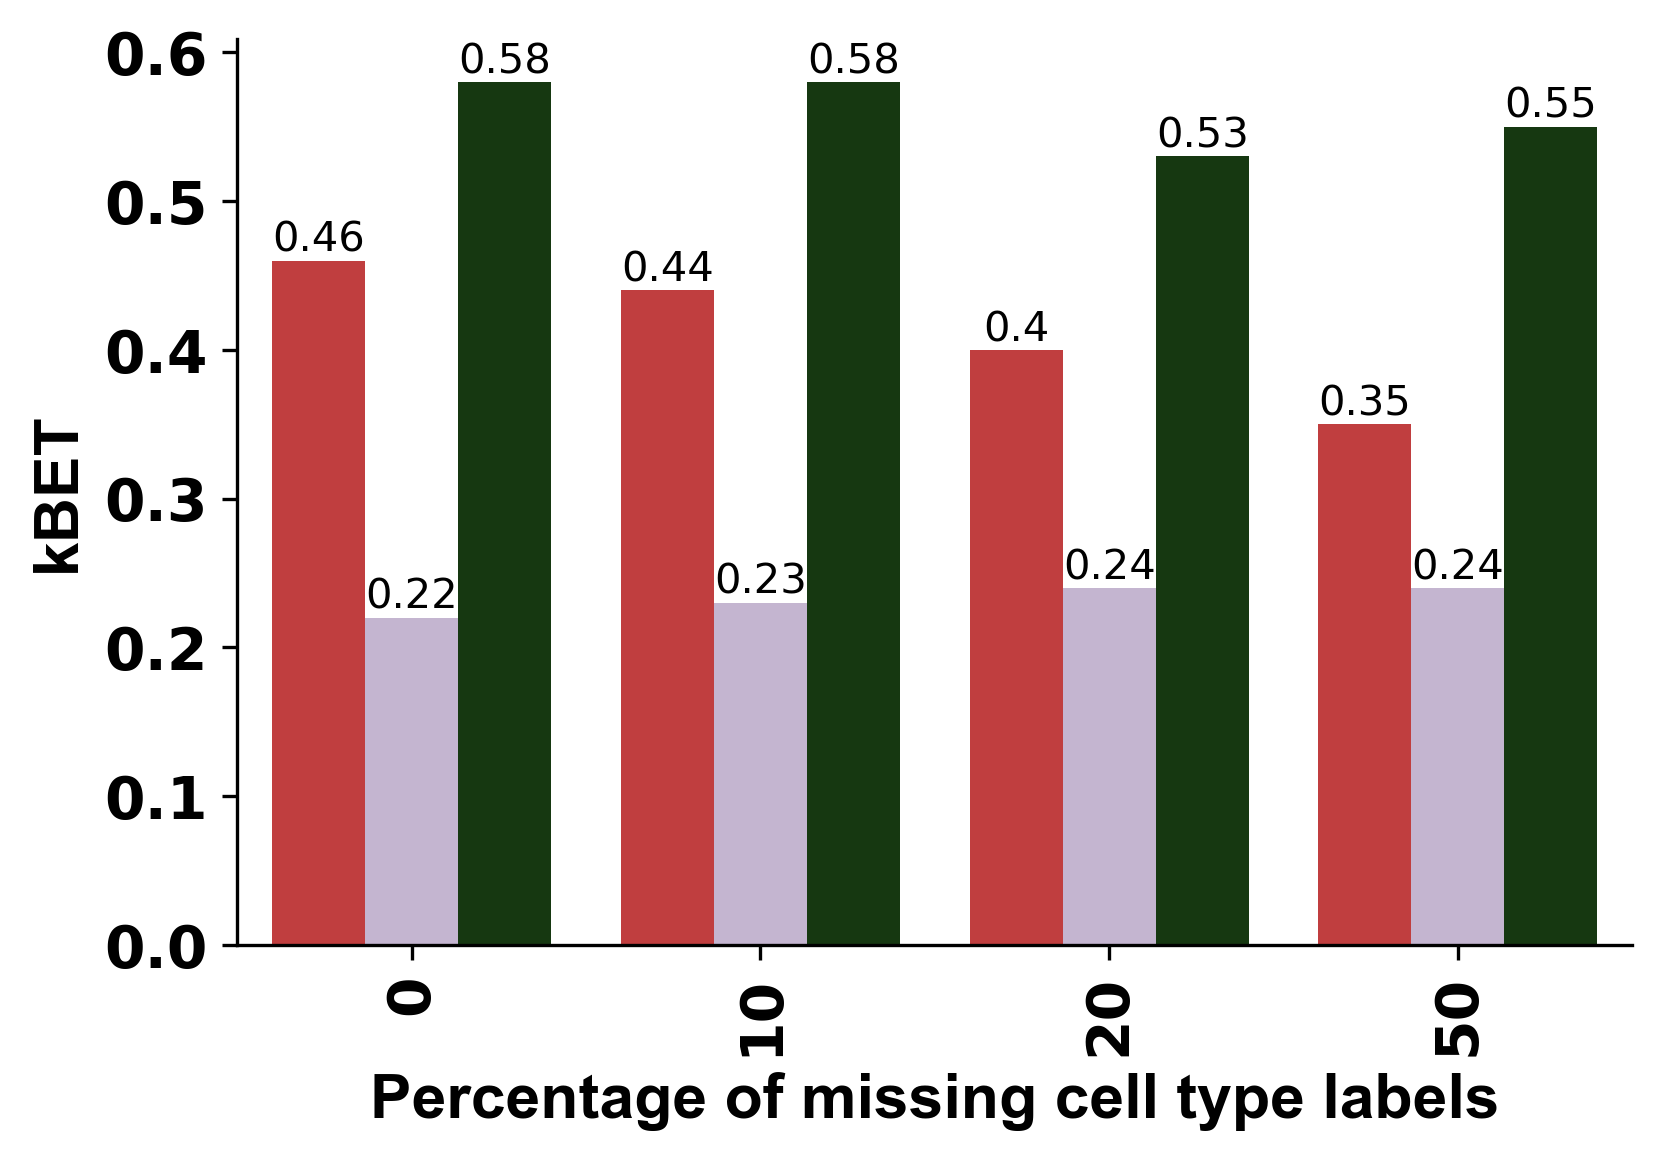

In [9]:
dataset = 'Immune_Human'
df = pd.read_excel(excel_path,sheet_name =sheet_name)
df_dataset = df[df['Dataset'] == dataset].reset_index(drop = True)
df_dataset.index = df_dataset['Method']
df_dataset.drop(['Dataset'], inplace=True, axis=1)
df_dataset = df_dataset.loc[methods_to_plot,:]
df_dataset = df_dataset.apply(lambda x:x.apply(lambda y:round(y,2) if type(y)!=str else y))
df_dataset['Percentage_wrong'] = df_dataset['Percentage_wrong'].astype('int32')
df_dataset['color'] = pd.Series(df_dataset.index,index=df_dataset.index).replace(method_color_dct)
display(df_dataset)
for col in cloumns_to_plot:
    print (col,dataset)
    plot_bar_multi(df_dataset, col,method_color_dct,save_folder = save_folder+dataset+'_multi')

In [ ]:
# scVI - cyan
# Harmony - orange
# Seurat - magenta
# BBKNN - purple
# Scanorama - yellow
# INSCT - blue
# iMAP - brown
# Liger - light green
# fastMNN - light pink
# scANVI - removed from main figure
# scDREAMER - Green
# scDREAMER++ - Red